In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

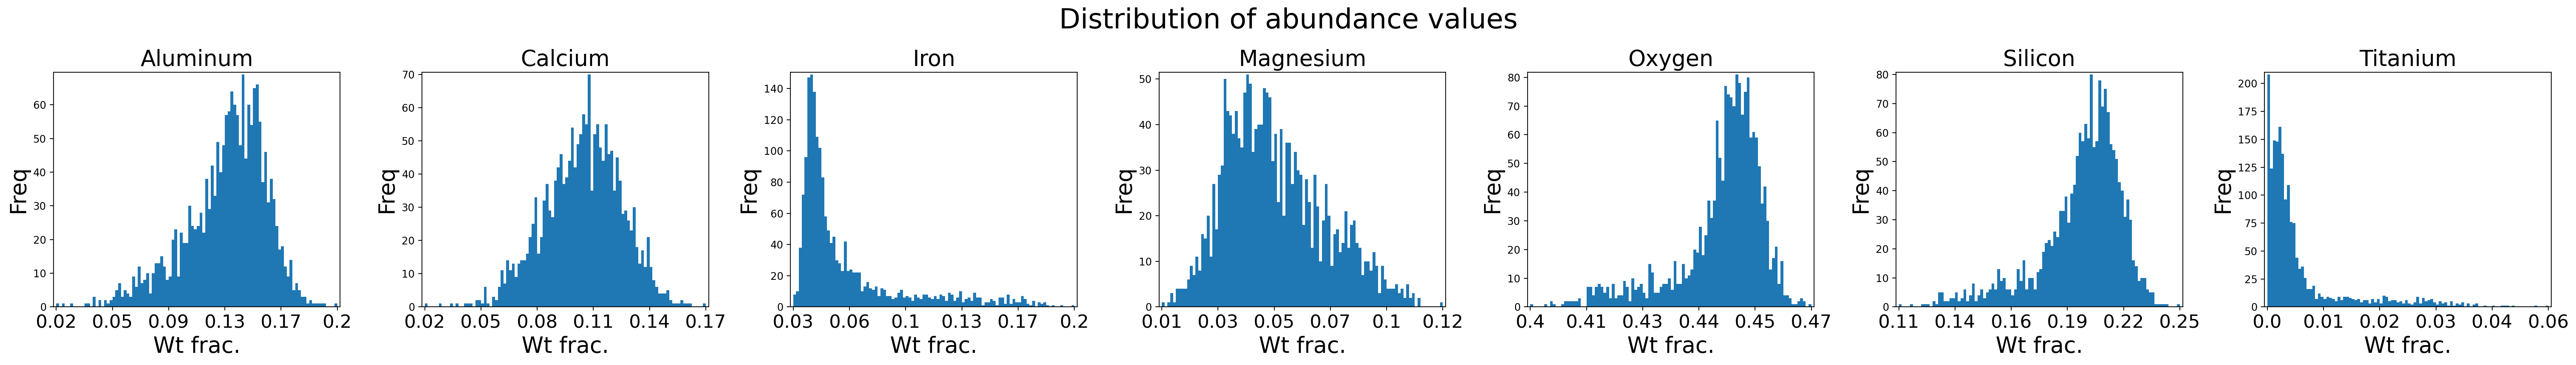

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

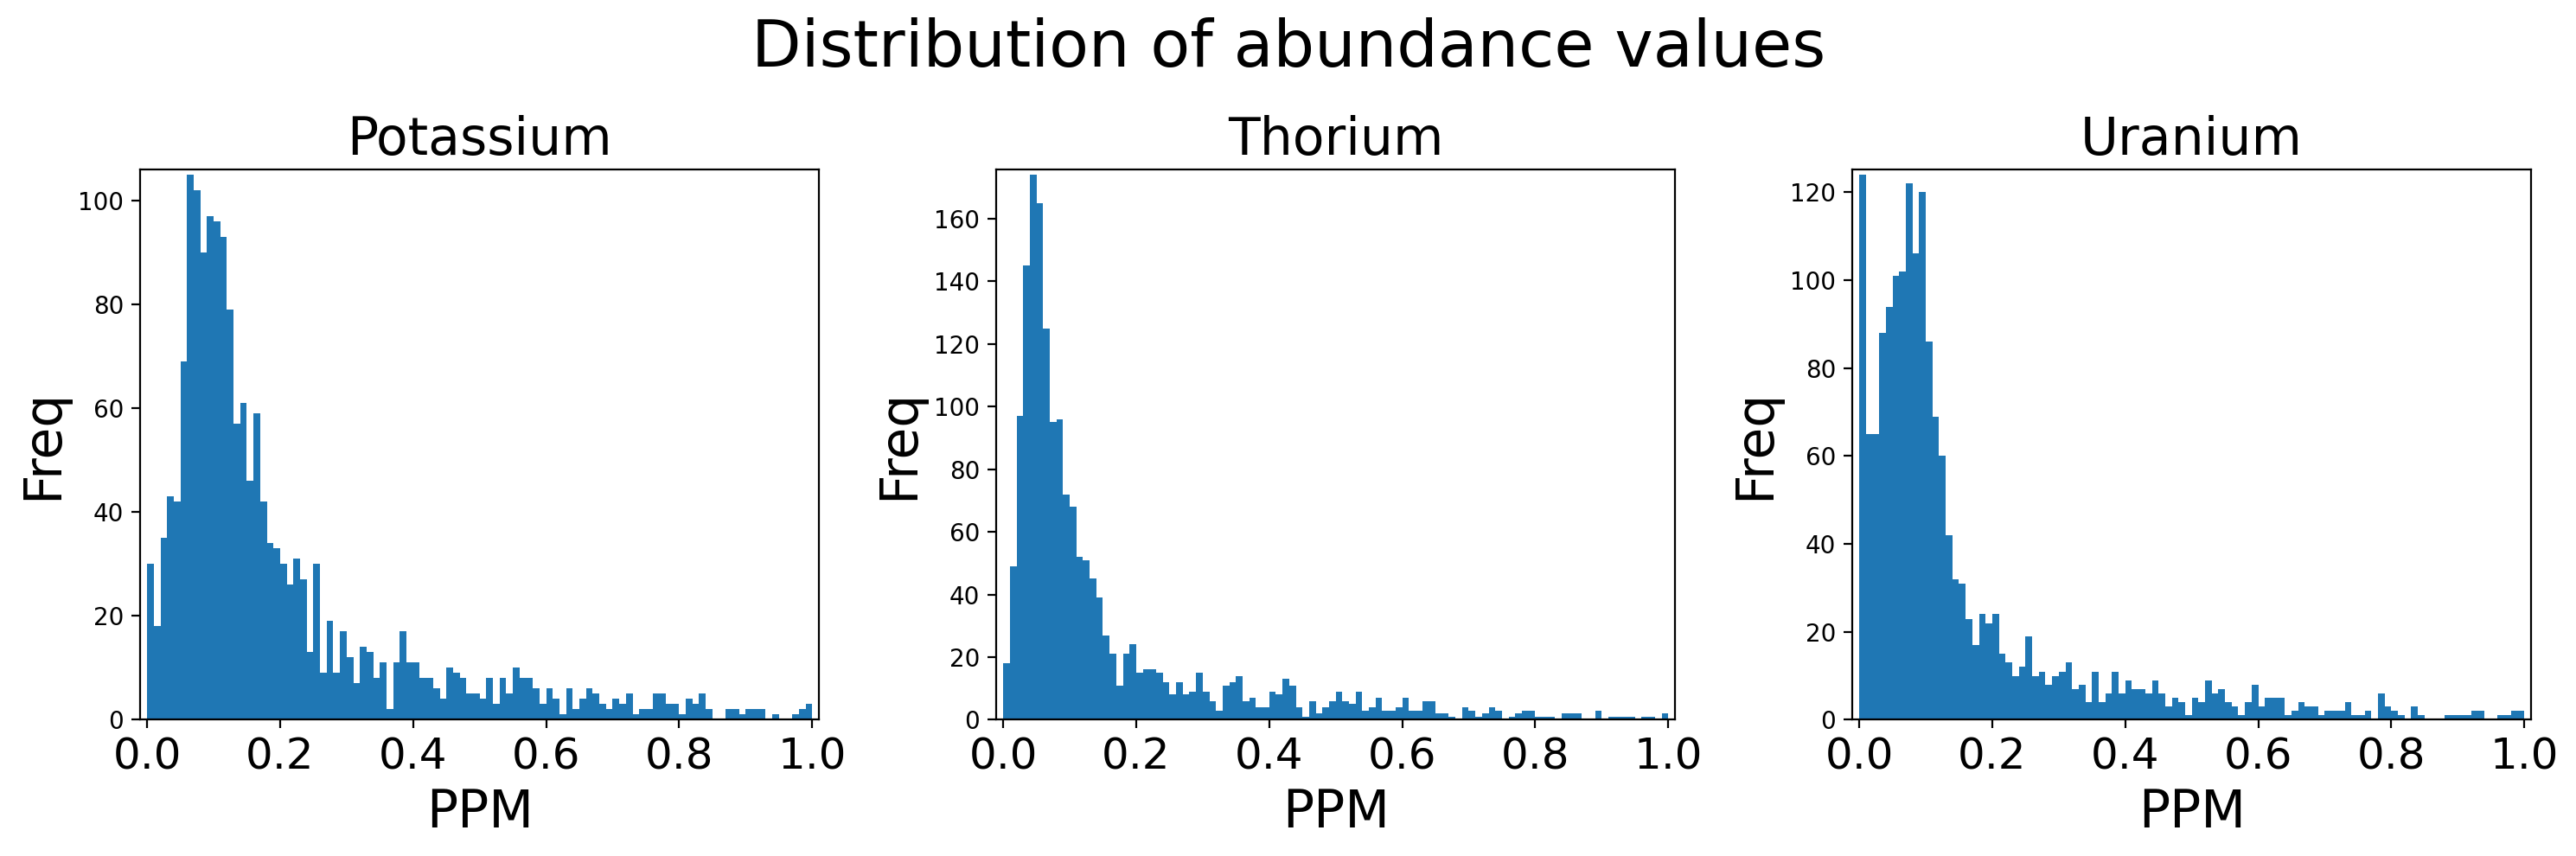

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

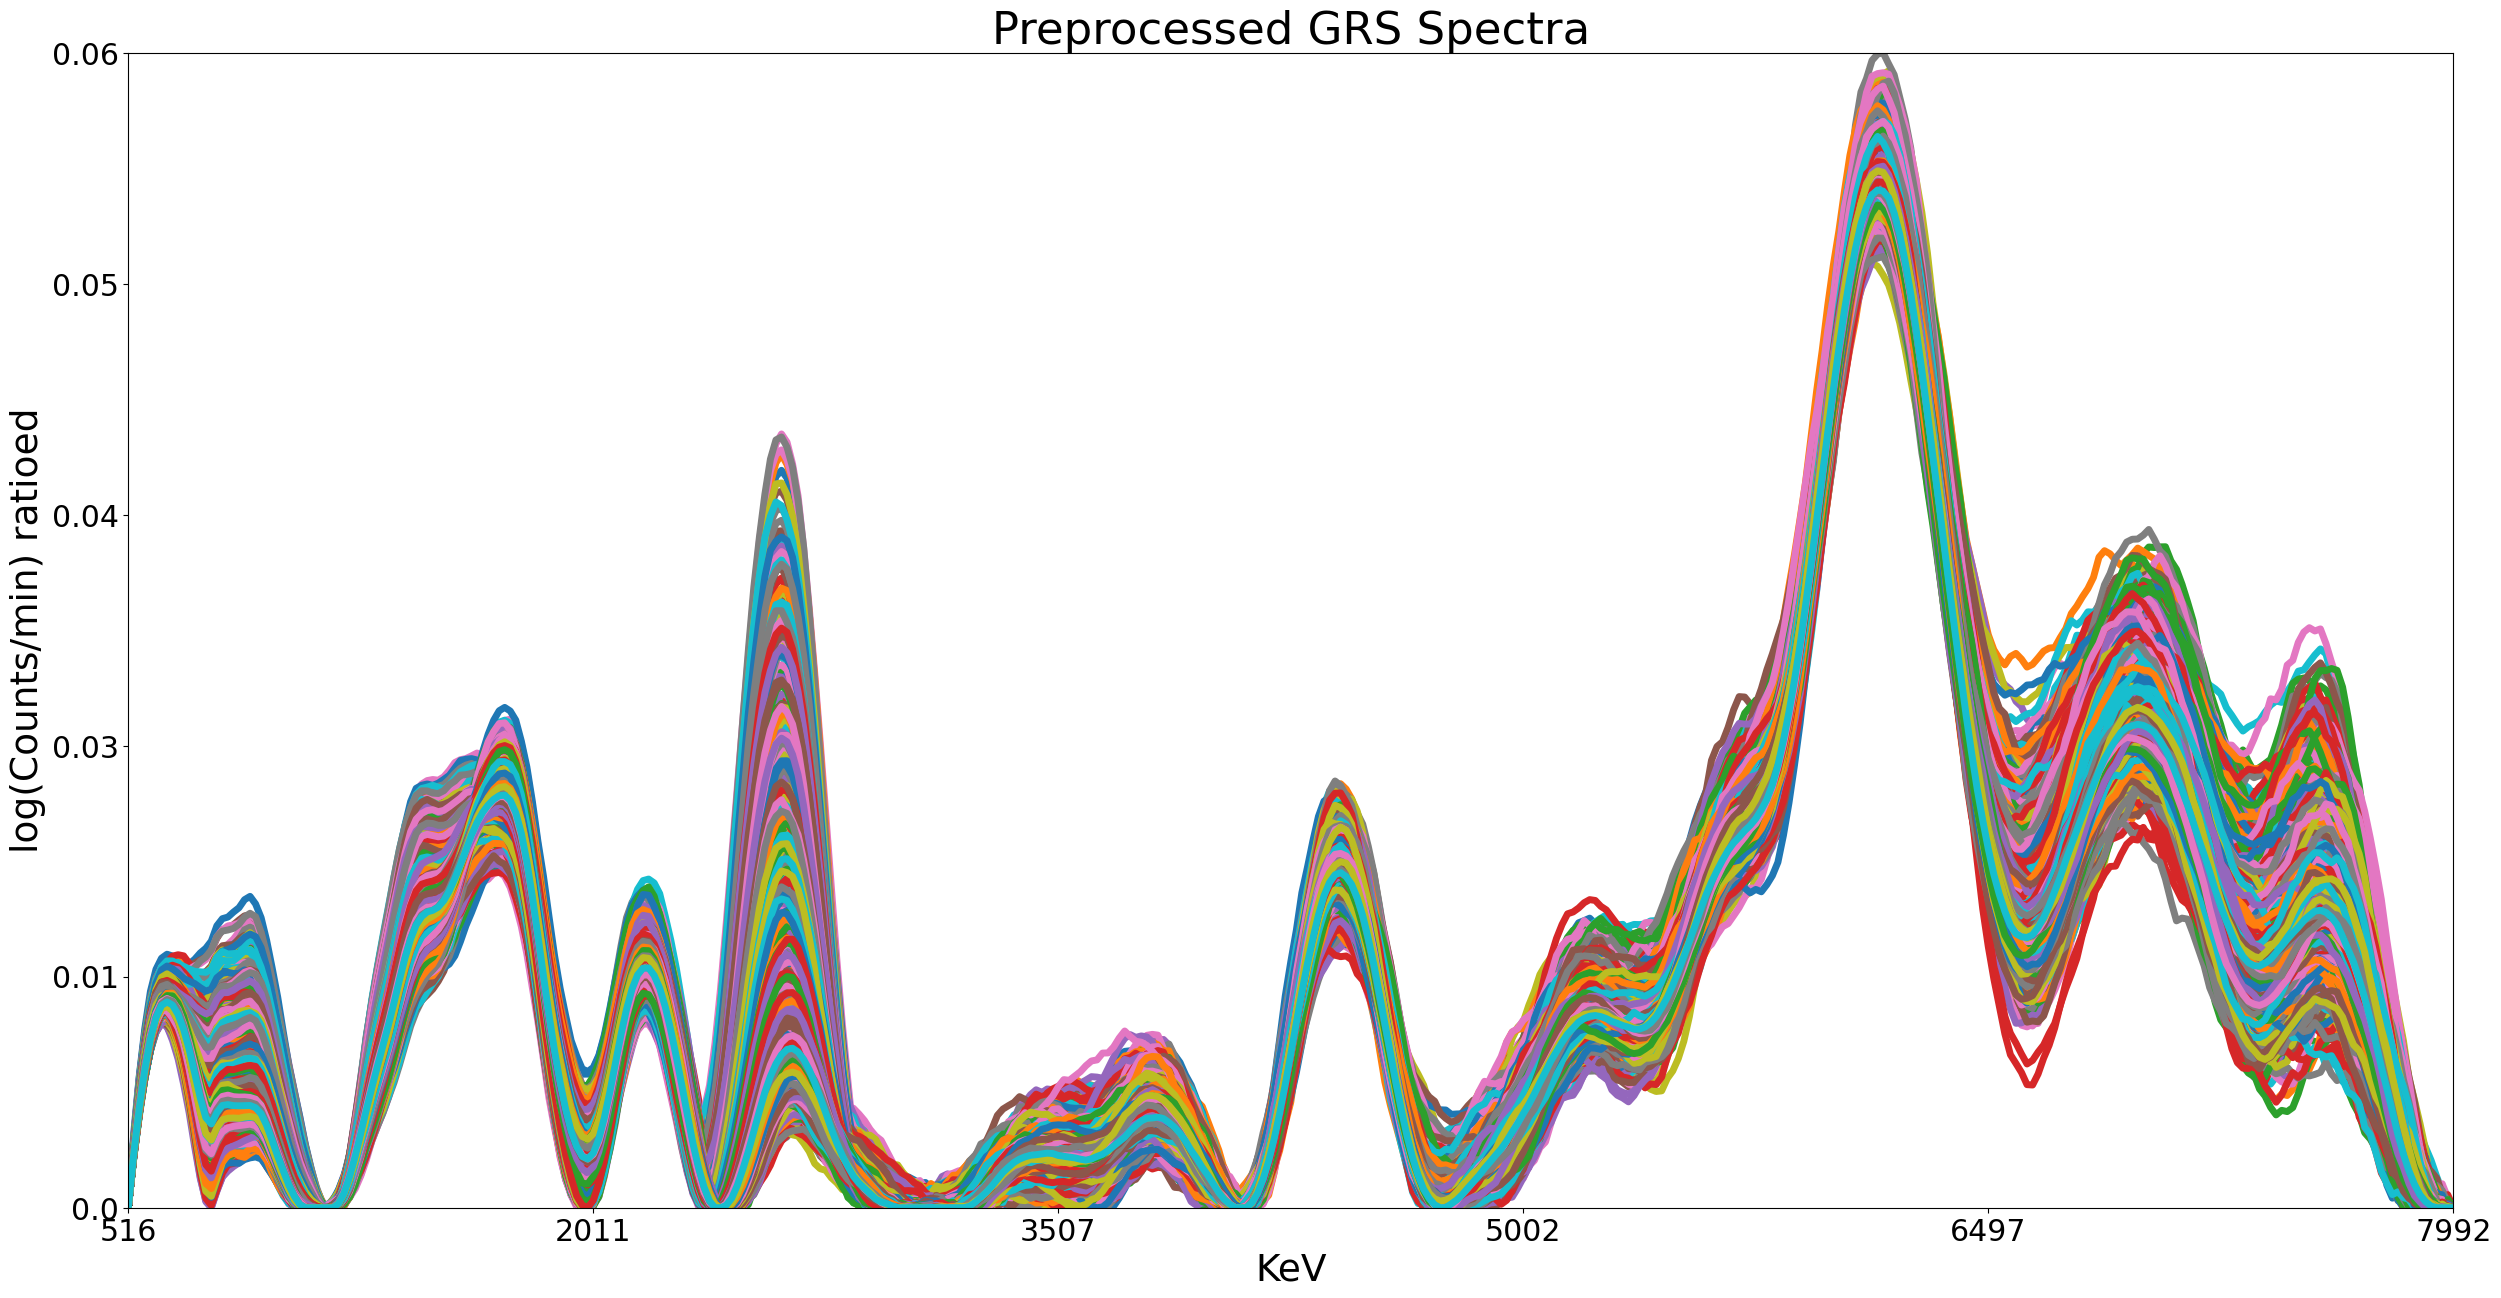

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
preprocessedSpectra=preprocessedSpectra.astype('float64')
regularElementalAbundances=regularElementalAbundances.astype('float64')
nuclearElementalAbundances=nuclearElementalAbundances.astype('float64')

In [25]:
preprocessedSpectraWithExtraDimension=np.expand_dims(preprocessedSpectra,
                                                     axis=-1)
print(f"Shape of preprocessed spectra: {preprocessedSpectra.shape}")

Shape of preprocessed spectra: (1790, 421)


In [26]:
#import tensorflow
import tensorflow as tf

In [27]:
#set default tensor type to float64
tf.keras.backend.set_floatx('float64')

In [28]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [29]:
#set a global seed value
globalSeed=23

In [30]:
#define 3 Component Structural Dissimilarity Index Measure (3C_DSSIM) which is equal to (1-3C_SSIM)/2 loss
#the loss is applied to the spectra reconstructed by the non-linear part of the decoder to capture details in the spectra

class threeComponentSturcturalDissilarityIndexMeasure(tf.keras.losses.Loss):

    #define the constructor
    def __init__(self,k1=0.01,k2=0.03,dynamicRange=1,ssimKernelSize=5,edgeWeight=0.5,textureWeight=0.25,smoothWeight=0.25,name="3C_SDIM"):
        #compute the constants c1 and c2 used to stabalize division when computing SSIM
        self.c1=tf.constant((k1*dynamicRange)**2,
                            dtype=tf.float64)
        self.c2=tf.constant((k2*dynamicRange)**2
                            ,dtype=tf.float64)

        #create the Conv layer which will do the mean filtering
        self.meanFilterLayer=tf.keras.layers.Conv1D(filters=1,
                                                    kernel_size=2,
                                                    strides=1,
                                                    padding='same',
                                                    use_bias=False,
                                                    kernel_initializer=tf.keras.initializers.Constant(1/ssimKernelSize),
                                                    bias_initializer='zeros',
                                                    trainable=False)
        #make sure the layer is initialized by calling it over a sample singnal
        temp=tf.constant(1,
                         dtype=tf.float64,
                         shape=(4,ssimKernelSize*2,1))
        temp=self.meanFilterLayer(temp)

        #set the weights for the edges, as well as textured and smooth parts of the signals
        self.edgeWeight=tf.constant(edgeWeight,
                                    dtype=tf.float64)

        self.textureWeight=tf.constant(textureWeight,
                                       dtype=tf.float64)

        self.smoothWeight=tf.constant(smoothWeight,
                                      dtype=tf.float64)

        #set the size of the kernel to be used when computing SSIM
        self.ssimKernelSize=ssimKernelSize

        #create the Conv. layer which will compute edges in the forward direction
        self.forwardEdgeDetectorFilterLayer=tf.keras.layers.Conv1D(filters=1,
                                                                   kernel_size=2,
                                                                   strides=1,
                                                                   padding='same',
                                                                   use_bias=False,
                                                                   kernel_initializer=tf.keras.initializers.Constant(1/ssimKernelSize),
                                                                   bias_initializer='zeros',
                                                                   trainable=False)
        #make sure the layer is initialized by calling it over a sample singnal
        temp=tf.constant(1,
                         dtype=tf.float64,
                         shape=(4,ssimKernelSize*2,1))
        temp=self.forwardEdgeDetectorFilterLayer(temp)

        #set the weights for the edge detector
        self.forwardEdgeDetectorFilterLayer.set_weights([np.array([[[1]],[[-1]]])])

        #create the Conv. layer which will compute edges in the inverse direction
        self.reverseEdgeDetectorFilterLayer=tf.keras.layers.Conv1D(filters=1,
                                                                   kernel_size=2,
                                                                   strides=1,
                                                                   padding='same',
                                                                   use_bias=False,
                                                                   kernel_initializer=tf.keras.initializers.Constant(1/ssimKernelSize),
                                                                   bias_initializer='zeros',
                                                                   trainable=False)
        #make sure the layer is initialized by calling it over a sample singnal
        temp=tf.constant(1,
                         dtype=tf.float64,
                         shape=(4,ssimKernelSize*2,1))
        temp=self.reverseEdgeDetectorFilterLayer(temp)

        #set the weights for the edge detector
        self.reverseEdgeDetectorFilterLayer.set_weights([np.array([[[-1]],[[1]]])])

        #call the constructor for the loss super-class
        super(threeComponentSturcturalDissilarityIndexMeasure,self).__init__(name=name)


    #define how the loss is computed
    def call(self,inputSpectra,reconstructedSpectra):



        #pass the original specta through the mean filter to get the mean filtered spectrum
        meanFilteredOrignalSpectra=self.meanFilterLayer(inputSpectra)


        #compute variance filtered spectra as the square of the difference between the input spectra and and its mean filtered version
        varianceFilteredOriginalSpectra=tf.math.divide(tf.math.square(tf.math.subtract(inputSpectra,
                                                                                       meanFilteredOrignalSpectra
                                                                                      )
                                                                     ),
                                                       self.ssimKernelSize
                                                      )

        #pass the reconstructed spectra through the mean filter to get the mean filtered spectrum
        meanFilteredReconsturctedSpectra=self.meanFilterLayer(reconstructedSpectra)



        #compute variance filtered spectra as the square of the difference between the input spectra and and its mean filtered version
        varianceFilteredReconstructedSpectra=tf.math.divide(tf.math.square(tf.math.subtract(reconstructedSpectra,
                                                                                            meanFilteredReconsturctedSpectra
                                                                                      )
                                                                     ),
                                                       self.ssimKernelSize
                                                      )


        #compute first term of SSIM (the left multiplier in the numerator)
        ssimNumerator1=tf.math.add(tf.math.multiply(tf.math.multiply(meanFilteredOrignalSpectra,
                                                                     meanFilteredReconsturctedSpectra),
                                                    2),
                                   self.c1)



        #compute second term of SSIM (the right multiplier in the numerator)
        ssimNumerator2=tf.math.add(tf.math.multiply(tf.math.multiply(tf.math.sqrt(tf.maximum(varianceFilteredOriginalSpectra,1e-12)),
                                                                     tf.math.sqrt(tf.maximum(varianceFilteredReconstructedSpectra,1e-12))),
                                                    2),
                                   self.c2)



        #compute third term of SSIM (the left multiplier in the denominator)
        ssimDenominator1=tf.math.add(tf.math.add(tf.math.square(meanFilteredOrignalSpectra),
                                                 tf.math.square(meanFilteredReconsturctedSpectra)
                                                ),
                                     self.c1)




        #compute fourth term of SSIM (the right multiplier in the denominator)
        ssimDenominator2=tf.math.add(tf.math.add(varianceFilteredOriginalSpectra,
                                                 varianceFilteredReconstructedSpectra
                                                ),
                                     self.c2)




        #compute SSIM numerator
        ssimNumerator=tf.math.multiply(ssimNumerator1,
                                       ssimNumerator2)


        #compute SSIM denominator
        ssimDenominator=tf.math.multiply(ssimDenominator1,
                                         ssimDenominator2)

        #add a very small constant to the denominator ensuring stability
        #ssimDenominator=tf.math.add(ssimDenominator,1e-15)

        #compute SSIM
        ssim=tf.math.divide(ssimNumerator,
                            ssimDenominator)


        #compute the gradient on the input spectrum using the sobel filter
        gradientForInputSpectra=tf.math.sqrt(tf.math.add(tf.math.square(self.forwardEdgeDetectorFilterLayer(inputSpectra)),
                                                         tf.math.square(self.reverseEdgeDetectorFilterLayer(inputSpectra))
                                                        )
                                            )
        #stabalize square root by setting a minimum value i.e. clipping it
        gradientForInputSpectra=tf.maximum(gradientForInputSpectra,1e-12)



        #compute the gradient on the reconstructed spectrum using the sobel filter
        gradientForReconstructedSpectra=tf.math.sqrt(tf.math.add(tf.math.square(self.forwardEdgeDetectorFilterLayer(reconstructedSpectra)),
                                                                 tf.math.square(self.reverseEdgeDetectorFilterLayer(reconstructedSpectra))
                                                                )
                                                    )

        #stabalize square root by setting a minimum value i.e. clipping it
        gradientForReconstructedSpectra=tf.maximum(gradientForReconstructedSpectra,1e-12)

        #compute the maximum gradient value in each input spectra
        maxGradientPerSpectra=tf.math.reduce_max(gradientForInputSpectra,axis=-2,keepdims=True)
        maxGradientPerSpectra=tf.repeat(maxGradientPerSpectra,
                                        repeats=inputLayer.shape[-2],
                                        axis=-2)




        #compute the two gradient thresholds used for selecting edges, and textures and smooth areas
        upperThreshold=tf.math.multiply(maxGradientPerSpectra,0.12)
        lowerThreshold=tf.math.multiply(maxGradientPerSpectra,0.06)




        #select bands corresponding to edges
        edgeFlags=tf.where(tf.math.logical_or(gradientForInputSpectra>upperThreshold,
                                              gradientForReconstructedSpectra>upperThreshold),
                           x=tf.constant(1.0,dtype=tf.float64),
                           y=tf.constant(0.0,dtype=tf.float64))
        #select bands corresponing to smooth areas
        smoothFlags=tf.where(tf.math.logical_and(gradientForInputSpectra<lowerThreshold,
                                                 gradientForReconstructedSpectra<=upperThreshold),
                             x=tf.constant(1.0,dtype=tf.float64),
                             y=tf.constant(0.0,dtype=tf.float64))
        #select bands corresponding to textured areas
        textureFlags=tf.where(tf.math.logical_or(edgeFlags==1,
                                                 smoothFlags==1),
                              x=tf.constant(1.0,dtype=tf.float64),
                              y=tf.constant(0.0,dtype=tf.float64))

        #compute the three components
        edgeSSIM=tf.math.multiply(ssim,
                                  edgeFlags)
        textureSSIM=tf.math.multiply(ssim,
                                     textureFlags)
        smoothSSIM=tf.math.multiply(ssim,
                                    smoothFlags)

        #get the number of channels that are classified as edges, and texture and smooth regions
        noOfEdgeBands=tf.math.reduce_sum(edgeFlags,
                                         axis=-2,
                                         keepdims=False)
        noOfTextureBands=tf.math.reduce_sum(textureFlags,
                                         axis=-2,
                                         keepdims=False)
        noOfSmoothBands=tf.math.reduce_sum(smoothFlags,
                                         axis=-2,
                                         keepdims=False)
        #add a very small value (epsilon) to the no of bands to prevent division by zero
        noOfEdgeBands=tf.math.add(noOfEdgeBands,1e-15)
        noOfTextureBands=tf.math.add(noOfTextureBands,1e-15)
        noOfSmoothBands=tf.math.add(noOfSmoothBands,1e-15)

        #average the three components over all channels to get a set of 3 values for each spectrum
        pooledEdgeSSIM=tf.math.divide(tf.math.reduce_sum(edgeSSIM,
                                                         axis=-2,
                                                         keepdims=False),
                                      noOfEdgeBands)

        pooledTextureSSIM=tf.math.divide(tf.math.reduce_sum(textureSSIM,
                                                            axis=-2,
                                                            keepdims=False),
                                         noOfTextureBands)

        pooledSmoothSSIM=tf.math.divide(tf.math.reduce_sum(smoothSSIM,
                                                           axis=-2,
                                                           keepdims=False),
                                        noOfSmoothBands)

        #add the three pooled components to get as single SSIM value for each spectrum
        threeComponentSSIM=tf.math.add(tf.math.multiply(pooledEdgeSSIM,self.edgeWeight),
                                       tf.math.multiply(pooledTextureSSIM,self.textureWeight))
        threeComponentSSIM=tf.math.add(threeComponentSSIM,
                                       tf.math.multiply(pooledSmoothSSIM,self.smoothWeight))


        #compute dissimilarity from 3C_SSIM
        threeComponentDSSIM=tf.math.divide(tf.math.subtract(tf.constant(1.0,dtype=tf.float64),
                                                            threeComponentSSIM),
                                           tf.constant(2.0,dtype=tf.float64))


        #return the three component dissimilarity
        return threeComponentDSSIM

In [31]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [32]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [33]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [34]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [35]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[4,4,4,4]

In [36]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [37]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [38]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [39]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [40]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [41]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [42]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [43]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [44]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [45]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [46]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [47]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(tf.keras.losses.Loss):
    def call(self,_,linearLayerWeights):
        #normalize the weights
        linearLayerWeights=tf.math.l2_normalize(linearLayerWeights,
                                                axis=-2,
                                                epsilon=1e-1)

        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True))
        #compute sum of cosine similarities by subtracting the number of sames from the data and then dividing by half
        unmixingSpectralSimilarity=(unmixingSpectralSimilarity-linearLayerWeights.shape[-1])/2

        #return the similarity estimate which is the regularization value
        return unmixingSpectralSimilarity
    

In [48]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class NonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        
        return w



#create the composite constraint by combining the two constraints
nonNegetivityConstraint=NonNegetivityConstraint()

In [49]:
#create an input layer which consists of the number one, it will be used to get the learnt spectra
unitNodeLayer=tf.keras.Input(shape=(1))

In [50]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
abundanceScaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#iterate through each element
for i in range(fullAbundanceEmbedding.shape[-1]):
    
    
    #create a contrainted hidden layer to learn the current element's spectra
    temp=tf.keras.layers.Dense(noOfChannels,
                               activation=None,
                               use_bias=False,
                               kernel_constraint=nonNegetivityConstraint,
                               name=allElementNames[i]+"_Spectra")
    
    
    #save the layer to a list
    elementWiseHiddenLayers.append(temp)
    
     #directly connect the the non-nuclar elements to the spectra layers
    if i<7:
        #multiply the layer by a the estimated abundance to scale the spectra by the abundance
        temp1=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],
                                  -1))
        
    #else connect it after connecting it to a constant that maybe used for scaling, and then to the spectra layers
    else:
        
        #create a contrainted hidden layer to learn the current element's spectra
        temp2=tf.keras.layers.Dense(1,
                                    activation=None,
                                    use_bias=False,
                                    kernel_constraint=nonNegetivityConstraint)
        temp1=temp(temp2(tf.expand_dims(fullAbundanceEmbedding[:,i],
                                        -1)))
    
    
    #save the learnt spectra scaled by the abundance
    abundanceScaledElementalSpectra.append(temp1)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp2=temp(unitNodeLayer)
    #save the learnt spectra
    unscaledElementalSpectra.append(temp2)
    
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {abundanceScaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [51]:
#stack the abundance scaled elemental spectra together
abundanceScaledElementalSpectraStack=tf.stack(abundanceScaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra scaled by abundance {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra scaled by abundance (None, 421, 10)


In [52]:
#stack the abundance scaled elemental spectra together
unscaledElementalSpectraStack=tf.stack(unscaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra (None, 421, 10)


In [53]:
#add the element wise spectra
linearlyReconstructedSpectra=tf.keras.backend.sum(abundanceScaledElementalSpectraStack,
                                        axis=-1,
                                        keepdims=True)

'''
#make the l2-norm of the reconstructed spectra equal to one by dividing it by its norm
linearlyReconstructedSpectra=tf.math.l2_normalize(linearlyReconstructedSpectra,
                                                  axis=-2,
                                                  epsilon=1e-12)
'''

                                                    
print(f"Shape of the linearly mixed spectra passed forward {linearlyReconstructedSpectra.shape}")

Shape of the linearly mixed spectra passed forward (None, 421, 1)


In [54]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createResidualBlock(inputVolume,noOfFilters,kernelSize,strideSize):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                              kernel_size=kernelSize,
                                              strides=strideSize,
                                              padding='same')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)
    
    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)
    
    
    #add the input and output featurs together
    volume=tf.math.add(volume,
                       inputVolume)

    
    return volume

In [55]:
#create a function which creates the residual decoder
def createResidualDecoder(inputVolume,noOfFilters,kernelSize,strideSize,noOfLayers):
    #create a variable to hold the volumes generated by each layer
    volume=inputVolume
    #iterate through all the layers
    for i in range(noOfLayers):
        #add the ith residual layer
        volume=createResidualBlock(inputVolume,
                                   noOfFilters,
                                   kernelSize,
                                   strideSize)
        #print the shape of the volume
        print(f"Shape of spectra outputted by the {i+1}th residual layer is {volume.shape}")
        
    return volume

In [56]:
#set the number of features to be outputted by each residual layer
noOfChannelsInResidualDecoder=1
#set the the sizes filter for each residual layer
filterSizesForResidualDecoder=3
#set the the strides for each residual layer
strideSizesForResidualDecoder=1
#set the the number of residual layers in 
noOfResidualBlocks=12

In [57]:
#construct the decoder
nonLinearReconstructionSpectra=createResidualDecoder(linearlyReconstructedSpectra,
                                                     noOfChannelsInResidualDecoder,
                                                     filterSizesForResidualDecoder,
                                                     strideSizesForResidualDecoder,
                                                     noOfResidualBlocks)

#print the shape of the non-linearly reconstructed spectra
print(f"Shape of the reconstructed spectra {nonLinearReconstructionSpectra.shape}")

Shape of spectra outputted by the 1th residual layer is (None, 421, 1)
Shape of spectra outputted by the 2th residual layer is (None, 421, 1)
Shape of spectra outputted by the 3th residual layer is (None, 421, 1)
Shape of spectra outputted by the 4th residual layer is (None, 421, 1)
Shape of spectra outputted by the 5th residual layer is (None, 421, 1)
Shape of spectra outputted by the 6th residual layer is (None, 421, 1)
Shape of spectra outputted by the 7th residual layer is (None, 421, 1)
Shape of spectra outputted by the 8th residual layer is (None, 421, 1)
Shape of spectra outputted by the 9th residual layer is (None, 421, 1)
Shape of spectra outputted by the 10th residual layer is (None, 421, 1)
Shape of spectra outputted by the 11th residual layer is (None, 421, 1)
Shape of spectra outputted by the 12th residual layer is (None, 421, 1)
Shape of the reconstructed spectra (None, 421, 1)


In [58]:
'''
#normalize the reconstructed spectra
nonLinearReconstructionSpectra=tf.math.l2_normalize(nonLinearReconstructionSpectra,
                                                    axis=-2,
                                                    epsilon=1e-12)

#print shape of abundances
print(f"Shape of Reconstructed normalized spectra {nonLinearReconstructionSpectra.shape}")
'''

'\n#normalize the reconstructed spectra\nnonLinearReconstructionSpectra=tf.math.l2_normalize(nonLinearReconstructionSpectra,\n                                                    axis=-2,\n                                                    epsilon=1e-12)\n\n#print shape of abundances\nprint(f"Shape of Reconstructed normalized spectra {nonLinearReconstructionSpectra.shape}")\n'

In [59]:
#build the model
unmixingModel=tf.keras.Model(inputs=[inputLayer,
                                     unitNodeLayer],
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      linearlyReconstructedSpectra,
                                      nonLinearReconstructionSpectra,
                                      unscaledElementalSpectraStack
                                     ],
                             name="Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model")

In [60]:
#create loss functions for the embeddings, Mean Squared Error
regularAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
nuclearAbundanceLossFunction=tf.keras.losses.MeanSquaredError()

#create the loss function for the linearly reconstructed spectra, Cosine loss
linearlyRecontructedSpectraLoss=tf.keras.losses.CosineSimilarity()



#create an instance of the 3C_SDIM loss
nonlinearReconstructionLoss=threeComponentSturcturalDissilarityIndexMeasure(k1=0.01,
                                                                            k2=0.03,
                                                                            dynamicRange=np.ptp(preprocessedSpectraWithExtraDimension),
                                                                            ssimKernelSize=5,
                                                                            edgeWeight=0.5,
                                                                            textureWeight=0.25,
                                                                            smoothWeight=0.25,
                                                                            name="3C_SDIM")

#create the regularizer
spectralDisimilarityRegularizer=spectralDisimilarityRegularization()

#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

#set the number of epochs the model is to be trained for
noOfEpochs=2700

#set the batch size
batchSize=16


#steps the number of steps to be processed in one execution
stepsPerExecution=60

In [61]:
#create a loss dictionary
lossDictionary=[regularAbundanceLossFunction,
                nuclearAbundanceLossFunction,
                linearlyRecontructedSpectraLoss,
                nonlinearReconstructionLoss,
                spectralDisimilarityRegularizer
               ]

In [62]:
#creat a list with loss weights (from the previous training instance)
lossWeights=[25e-2, #non-nuclear elemental abundances
             1,     #nuclear elementabl abundances
             1e-3,  #linearly reconstructed spectra
             1e-7,  #non-linearly reconstructed spectra
             1e-15  #spectral dissimilarity regularization
            ]

In [63]:
#creat a list with loss weights (from the previous training instance)
lossWeights=[25e-2, #non-nuclear elemental abundances
             1,     #nuclear elementabl abundances
             1e-3,  #linearly reconstructed spectra
             1e-4,  #non-linearly reconstructed spectra
             1e-8  #spectral dissimilarity regularization
            ]

In [64]:
#creat a list with loss weights (from the previous training instance)
lossWeights=[25e-2, #non-nuclear elemental abundances
             1,     #nuclear elementabl abundances
             1e-5,  #linearly reconstructed spectra
             1e-3,  #non-linearly reconstructed spectra
             1e-12  #spectral dissimilarity regularization
            ]

In [65]:
#creat a list with loss weights
lossWeights=[1e-2, #non-nuclear elemental abundances
             1,     #nuclear elementabl abundances
             1e-3,  #linearly reconstructed spectra
             1e-3,  #non-linearly reconstructed spectra
             1e-7  #spectral dissimilarity regularization
            ]

In [66]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

In [67]:
#summarize the model
unmixingModel.summary()

Model: "Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 421, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 139, 128)     1024        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 139, 128)     17792       ['conv1d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 139, 128)    512         ['p_re_lu[0][0]']                
 alization)          

                                                                                                  
 tf.repeat_2 (TFOpLambda)       (None, 139, 128)     0           ['tf.expand_dims_3[0][0]']       
                                                                                                  
 tf.math.multiply_2 (TFOpLambda  (None, 139, 128)    0           ['tf.repeat_2[0][0]',            
 )                                                                'conv1d_3[0][0]']               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_3 (TFOpLam  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 bda)     

 dropout_3 (Dropout)            (None, 139, 128)     0           ['batch_normalization_3[0][0]']  
                                                                                                  
 conv1d_7 (Conv1D)              (None, 139, 128)     114816      ['dropout_3[0][0]']              
                                                                                                  
 tf.math.reduce_max_6 (TFOpLamb  (None, 128)         0           ['conv1d_7[0][0]']               
 da)                                                                                              
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['tf.math.reduce_max_6[0][0]',   
                                                                  'tf.math.reduce_max_6[0][0]']   
                                                                                                  
 dense_7 (

 )                                                                'conv1d_10[0][0]']              
                                                                                                  
 tf.math.reduce_max_9 (TFOpLamb  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_9 (TFOpLam  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 bda)                                                                                             
                                                                                                  
 tf.expand_dims_13 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_9[0][0]']   
                                                                                                  
 tf.expand

 tf.math.reduce_max_12 (TFOpLam  (None, 256)         0           ['conv1d_14[0][0]']              
 bda)                                                                                             
                                                                                                  
 dense_12 (Dense)               (None, 128)          32896       ['tf.math.reduce_max_12[0][0]',  
                                                                  'tf.math.reduce_max_12[0][0]']  
                                                                                                  
 dense_13 (Dense)               (None, 256)          33024       ['dense_12[0][0]',               
                                                                  'dense_12[1][0]']               
                                                                                                  
 tf.math.add_12 (TFOpLambda)    (None, 256)          0           ['dense_13[0][0]',               
          

                                                                  'tf.expand_dims_23[0][0]']      
                                                                                                  
 conv1d_17 (Conv1D)             (None, 45, 1)        7           ['tf.concat_7[0][0]']            
                                                                                                  
 tf.repeat_15 (TFOpLambda)      (None, 45, 256)      0           ['conv1d_17[0][0]']              
                                                                                                  
 tf.math.multiply_15 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_15[0][0]',           
 a)                                                               'tf.math.multiply_14[0][0]']    
                                                                                                  
 conv1d_36 (Conv1D)             (None, 139, 128)     1024        ['input_1[0][0]']                
          

 tf.expand_dims_49 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_max_33[0][0]']  
                                                                                                  
 tf.expand_dims_50 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_mean_33[0][0]'] 
                                                                                                  
 tf.repeat_16 (TFOpLambda)      (None, 22, 512)      0           ['tf.expand_dims_24[0][0]']      
                                                                                                  
 tf.concat_16 (TFOpLambda)      (None, 139, 2)       0           ['tf.expand_dims_49[0][0]',      
                                                                  'tf.expand_dims_50[0][0]']      
                                                                                                  
 tf.math.multiply_16 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_16[0][0]',           
 a)       

                                                                  'dense_18[1][0]']               
                                                                                                  
 tf.repeat_34 (TFOpLambda)      (None, 139, 128)     0           ['tf.expand_dims_51[0][0]']      
                                                                                                  
 tf.math.add_18 (TFOpLambda)    (None, 512)          0           ['dense_19[0][0]',               
                                                                  'dense_19[1][0]']               
                                                                                                  
 tf.math.multiply_34 (TFOpLambd  (None, 139, 128)    0           ['tf.repeat_34[0][0]',           
 a)                                                               'conv1d_39[0][0]']              
                                                                                                  
 tf.math.s

                                                                                                  
 conv1d_23 (Conv1D)             (None, 22, 512)      786944      ['dropout_12[0][0]']             
                                                                                                  
 conv1d_42 (Conv1D)             (None, 45, 256)      327936      ['dropout_23[0][0]']             
                                                                                                  
 tf.math.reduce_max_20 (TFOpLam  (None, 512)         0           ['conv1d_23[0][0]']              
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_max_36 (TFOpLam  (None, 256)         0           ['conv1d_42[0][0]']              
 bda)                                                                                             
          

 tf.math.multiply_21 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_21[0][0]',           
 a)                                                               'tf.math.multiply_20[0][0]']    
                                                                                                  
 tf.math.multiply_37 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_37[0][0]',           
 a)                                                               'tf.math.multiply_36[0][0]']    
                                                                                                  
 tf.math.add_21 (TFOpLambda)    (None, 22, 512)      0           ['conv1d_23[0][0]',              
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 tf.math.add_37 (TFOpLambda)    (None, 45, 256)      0           ['conv1d_42[0][0]',              
          

                                                                                                  
 tf.expand_dims_35 (TFOpLambda)  (None, 22, 1)       0           ['tf.math.reduce_mean_23[0][0]'] 
                                                                                                  
 tf.expand_dims_58 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_39[0][0]']  
                                                                                                  
 tf.expand_dims_59 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_mean_39[0][0]'] 
                                                                                                  
 tf.concat_11 (TFOpLambda)      (None, 22, 2)        0           ['tf.expand_dims_34[0][0]',      
                                                                  'tf.expand_dims_35[0][0]']      
                                                                                                  
 tf.concat

 tf.math.add_24 (TFOpLambda)    (None, 1024)         0           ['dense_25[0][0]',               
                                                                  'dense_25[1][0]']               
                                                                                                  
 tf.math.add_40 (TFOpLambda)    (None, 512)          0           ['dense_41[0][0]',               
                                                                  'dense_41[1][0]']               
                                                                                                  
 tf.math.sigmoid_12 (TFOpLambda  (None, 1024)        0           ['tf.math.add_24[0][0]']         
 )                                                                                                
                                                                                                  
 tf.math.sigmoid_20 (TFOpLambda  (None, 512)         0           ['tf.math.add_40[0][0]']         
 )        

                                                                                                  
 conv1d_49 (Conv1D)             (None, 22, 512)      786944      ['dropout_27[0][0]']             
                                                                                                  
 tf.math.reduce_max_26 (TFOpLam  (None, 1024)        0           ['conv1d_30[0][0]']              
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_max_42 (TFOpLam  (None, 512)         0           ['conv1d_49[0][0]']              
 bda)                                                                                             
                                                                                                  
 dense_26 (Dense)               (None, 512)          524800      ['tf.math.reduce_max_26[0][0]',  
          

                                                                                                  
 tf.math.multiply_43 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_43[0][0]',           
 a)                                                               'tf.math.multiply_42[0][0]']    
                                                                                                  
 tf.math.add_27 (TFOpLambda)    (None, 10, 1024)     0           ['conv1d_30[0][0]',              
                                                                  'tf.math.multiply_27[0][0]']    
                                                                                                  
 tf.math.add_43 (TFOpLambda)    (None, 22, 512)      0           ['conv1d_49[0][0]',              
                                                                  'tf.math.multiply_43[0][0]']    
                                                                                                  
 batch_nor

                                                                  'tf.expand_dims_44[0][0]']      
                                                                                                  
 tf.repeat_44 (TFOpLambda)      (None, 10, 1024)     0           ['tf.expand_dims_66[0][0]']      
                                                                                                  
 conv1d_33 (Conv1D)             (None, 10, 1)        7           ['tf.concat_14[0][0]']           
                                                                                                  
 tf.math.multiply_44 (TFOpLambd  (None, 10, 1024)    0           ['tf.repeat_44[0][0]',           
 a)                                                               'conv1d_52[0][0]']              
                                                                                                  
 tf.repeat_29 (TFOpLambda)      (None, 10, 1024)     0           ['conv1d_33[0][0]']              
          

 a)                                                               'conv1d_34[0][0]']              
                                                                                                  
 tf.math.add_46 (TFOpLambda)    (None, 1024)         0           ['dense_47[0][0]',               
                                                                  'dense_47[1][0]']               
                                                                                                  
 tf.math.reduce_max_31 (TFOpLam  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_mean_31 (TFOpLa  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 mbda)                                                                                            
          

                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 1)           0           ['tf.repeat_48[0][0]']           
 da)                                                                                              
                                                                                                  
 dense_49 (Dense)               (None, 3)            30723       ['flatten_1[0][0]']              
                                                                                                  
 tf.math.divide (TFOpLambda)    (None, 7)            0           ['tf.math.abs[0][0]',            
                                                                  'tf.__operators__.add[0][0]']   
                                                                                                  
 tf.math.abs_1 (TFOpLambda)     (None, 3)            0           ['dense_49[0][0]']               
          

 Calcium_Spectra (Dense)        (None, 421)          421         ['tf.expand_dims_73[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Iron_Spectra (Dense)           (None, 421)          421         ['tf.expand_dims_74[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Magnesium_Spectra (Dense)      (None, 421)          421         ['tf.expand_dims_75[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Oxygen_Spectra (Dense)         (None, 421)          421         ['tf.expand_dims_76[0][0]',      
          

In [68]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model _With_PReLU_Weights.h5"
#untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [69]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [70]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [71]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [72]:
#set the number of folds across which the model is to be evaluated
noOfFolds=5
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [73]:
#create an array to save the element-wise learnt spectra across folds
foldWiseLearntElementalSpectra=np.zeros((noOfChannels,
                                         fullAbundanceEmbedding.shape[-1],
                                         noOfFolds
                                        ))

In [74]:
#create arrays to hold the predicted abundances
regularPredictedAbundances=np.zeros_like(regularElementalAbundances)
nuclearPredictedAbundances=np.zeros_like(nuclearElementalAbundances)
reconstructedSpectra=np.zeros_like(preprocessedSpectraWithExtraDimension)

In [75]:
#create a list to hold model training history
modelTrainingHistories=[]

In [ ]:
#iterate through the folds
for j,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #print that new fold has started
    print(f"Starting fold {j+1}\n\n\n")
    #load the initial weights of the model (before training)
    unmixingModel.load_weights(untrainedModelWeightsAddress)
    #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=lossDictionary,
                          loss_weights=lossWeights,
                          steps_per_execution=stepsPerExecution)

    #unit note to extract learnt spectra
    unitMatrixTrain=np.ones(preprocessedSpectra[trainingIndices,:].shape[0])
    unitMatrixTrain=unitMatrixTrain.astype('float64')

    #unit note to extract learnt spectra
    unitMatrixTest=np.ones(preprocessedSpectra[testingIndices,:].shape[0])
    unitMatrixTest=unitMatrixTest.astype('float64')

    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=[preprocessedSpectra[trainingIndices,:],
                                                     unitMatrixTrain
                                                    ],
                                                  y=[regularElementalAbundances[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:],
                                                     preprocessedSpectra[trainingIndices,:],
                                                     preprocessedSpectraWithExtraDimension[trainingIndices,:,:],
                                                     nuclearElementalAbundances[trainingIndices,:]
                                                    ],
                                                  batch_size=batchSize,
                                                  epochs=noOfEpochs,
                                                  validation_data=([preprocessedSpectra[testingIndices,:],
                                                                    unitMatrixTest],
                                                                   [regularElementalAbundances[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:],
                                                                    preprocessedSpectra[testingIndices,:],
                                                                    preprocessedSpectraWithExtraDimension[testingIndices,:,:],
                                                                    nuclearElementalAbundances[testingIndices,:]
                                                                   ]
                                                                  )
                                                 )


    #print that model history is being saved
    print(f"Saving model history, weights and learnt spectra")

    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)




    #set the address where the untrained model will be saved
    #trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"
    trainedModelWeightsAddress=f"C:/ML4Sci/Models/untrained_Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model_With_PReLU_Weights_{i+1}th_Fold.h5"

    #save the untrained model
    unmixingModel.save_weights(trainedModelWeightsAddress,
                               overwrite=True)



    #save the predicted abundances and reconstructed spectra for the test set
    regularPredictedAbundances[testingIndices,:],nuclearPredictedAbundances[testingIndices,:],_,reconstructedSpectra[testingIndices,:,:],_=unmixingModel.predict([preprocessedSpectra[testingIndices,:],unitMatrixTest])


    #iterate through all the elements and save their learnt spectra
    for i in range(len(allElementNames)):

        #get the mean spectrum for the current element
        currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

        #save the spectrum
        foldWiseLearntElementalSpectra[:,i,j]=currentElementSpectrum
    


Starting fold 1



Epoch 1/2700
90/90 [==============================] - 158s 2s/step - loss: 9.4249 - tf.math.divide_loss: 0.0022 - tf.math.abs_1_loss: 9.4243 - tf.math.reduce_sum_1_loss: -0.7531 - tf.math.add_59_loss: 0.5004 - tf.stack_1_loss: 8241.8258 - val_loss: 6.6443 - val_tf.math.divide_loss: 0.0356 - val_tf.math.abs_1_loss: 6.6438 - val_tf.math.reduce_sum_1_loss: -0.9121 - val_tf.math.add_59_loss: 0.5002 - val_tf.stack_1_loss: 5158.4171
Epoch 2/2700
90/90 [==============================] - 106s 1s/step - loss: 0.8230 - tf.math.divide_loss: 5.6102e-04 - tf.math.abs_1_loss: 0.8230 - tf.math.reduce_sum_1_loss: -0.9116 - tf.math.add_59_loss: 0.4995 - tf.stack_1_loss: 4254.0708 - val_loss: 0.2625 - val_tf.math.divide_loss: 0.0244 - val_tf.math.abs_1_loss: 0.2623 - val_tf.math.reduce_sum_1_loss: -0.8723 - val_tf.math.add_59_loss: 0.5038 - val_tf.stack_1_loss: 3474.2408
Epoch 3/2700
90/90 [==============================] - 106s 1s/step - loss: 0.7868 - tf.math.divide_loss: 5.3920e-04

Epoch 20/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1283 - tf.math.divide_loss: 4.7647e-04 - tf.math.abs_1_loss: 0.1288 - tf.math.reduce_sum_1_loss: -0.9678 - tf.math.add_59_loss: 0.3259 - tf.stack_1_loss: 1282.2932 - val_loss: 0.0944 - val_tf.math.divide_loss: 5.3438e-04 - val_tf.math.abs_1_loss: 0.0949 - val_tf.math.reduce_sum_1_loss: -0.9665 - val_tf.math.add_59_loss: 0.3290 - val_tf.stack_1_loss: 1265.8747
Epoch 21/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1396 - tf.math.divide_loss: 4.7547e-04 - tf.math.abs_1_loss: 0.1402 - tf.math.reduce_sum_1_loss: -0.9680 - tf.math.add_59_loss: 0.3232 - tf.stack_1_loss: 1274.7816 - val_loss: 0.5719 - val_tf.math.divide_loss: 5.3292e-04 - val_tf.math.abs_1_loss: 0.5724 - val_tf.math.reduce_sum_1_loss: -0.9717 - val_tf.math.add_59_loss: 0.3434 - val_tf.stack_1_loss: 1262.5152
Epoch 22/2700
90/90 [==============================] - 107s 1s/step - loss: 0.1950 - tf.math.divide_loss: 4.7667e-04 - t

Epoch 39/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1676 - tf.math.divide_loss: 4.6932e-04 - tf.math.abs_1_loss: 0.1681 - tf.math.reduce_sum_1_loss: -0.9661 - tf.math.add_59_loss: 0.3174 - tf.stack_1_loss: 1234.5059 - val_loss: 0.3932 - val_tf.math.divide_loss: 5.2980e-04 - val_tf.math.abs_1_loss: 0.3937 - val_tf.math.reduce_sum_1_loss: -0.9691 - val_tf.math.add_59_loss: 0.3185 - val_tf.stack_1_loss: 1221.0397
Epoch 40/2700
90/90 [==============================] - 108s 1s/step - loss: 0.2057 - tf.math.divide_loss: 4.6939e-04 - tf.math.abs_1_loss: 0.2062 - tf.math.reduce_sum_1_loss: -0.9663 - tf.math.add_59_loss: 0.3184 - tf.stack_1_loss: 1231.5640 - val_loss: 0.0745 - val_tf.math.divide_loss: 5.3002e-04 - val_tf.math.abs_1_loss: 0.0750 - val_tf.math.reduce_sum_1_loss: -0.9646 - val_tf.math.add_59_loss: 0.3488 - val_tf.stack_1_loss: 1222.4424
Epoch 41/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1808 - tf.math.divide_loss: 4.6887e-04 - t

Epoch 58/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1027 - tf.math.divide_loss: 4.6753e-04 - tf.math.abs_1_loss: 0.1032 - tf.math.reduce_sum_1_loss: -0.9655 - tf.math.add_59_loss: 0.3020 - tf.stack_1_loss: 1231.4341 - val_loss: 0.2373 - val_tf.math.divide_loss: 5.2940e-04 - val_tf.math.abs_1_loss: 0.2379 - val_tf.math.reduce_sum_1_loss: -0.9656 - val_tf.math.add_59_loss: 0.3008 - val_tf.stack_1_loss: 1220.5395
Epoch 59/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1092 - tf.math.divide_loss: 4.6724e-04 - tf.math.abs_1_loss: 0.1097 - tf.math.reduce_sum_1_loss: -0.9650 - tf.math.add_59_loss: 0.2994 - tf.stack_1_loss: 1230.3484 - val_loss: 0.0220 - val_tf.math.divide_loss: 5.2899e-04 - val_tf.math.abs_1_loss: 0.0225 - val_tf.math.reduce_sum_1_loss: -0.9628 - val_tf.math.add_59_loss: 0.2986 - val_tf.stack_1_loss: 1219.9893
Epoch 60/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0989 - tf.math.divide_loss: 4.6708e-04 - t

Epoch 77/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1286 - tf.math.divide_loss: 4.6729e-04 - tf.math.abs_1_loss: 0.1292 - tf.math.reduce_sum_1_loss: -0.9647 - tf.math.add_59_loss: 0.2996 - tf.stack_1_loss: 1224.7968 - val_loss: 0.0184 - val_tf.math.divide_loss: 5.3076e-04 - val_tf.math.abs_1_loss: 0.0189 - val_tf.math.reduce_sum_1_loss: -0.9629 - val_tf.math.add_59_loss: 0.2998 - val_tf.stack_1_loss: 1213.4714
Epoch 78/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1708 - tf.math.divide_loss: 4.6720e-04 - tf.math.abs_1_loss: 0.1713 - tf.math.reduce_sum_1_loss: -0.9649 - tf.math.add_59_loss: 0.3021 - tf.stack_1_loss: 1225.1553 - val_loss: 0.0866 - val_tf.math.divide_loss: 5.3088e-04 - val_tf.math.abs_1_loss: 0.0871 - val_tf.math.reduce_sum_1_loss: -0.9627 - val_tf.math.add_59_loss: 0.3011 - val_tf.stack_1_loss: 1213.4369
Epoch 79/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0929 - tf.math.divide_loss: 4.6760e-04 - t

Epoch 96/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0814 - tf.math.divide_loss: 4.6908e-04 - tf.math.abs_1_loss: 0.0819 - tf.math.reduce_sum_1_loss: -0.9645 - tf.math.add_59_loss: 0.2998 - tf.stack_1_loss: 1220.7944 - val_loss: 0.7927 - val_tf.math.divide_loss: 5.3184e-04 - val_tf.math.abs_1_loss: 0.7933 - val_tf.math.reduce_sum_1_loss: -0.9690 - val_tf.math.add_59_loss: 0.3208 - val_tf.stack_1_loss: 1213.4838
Epoch 97/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0746 - tf.math.divide_loss: 4.6927e-04 - tf.math.abs_1_loss: 0.0751 - tf.math.reduce_sum_1_loss: -0.9642 - tf.math.add_59_loss: 0.2985 - tf.stack_1_loss: 1219.1485 - val_loss: 0.0411 - val_tf.math.divide_loss: 5.3247e-04 - val_tf.math.abs_1_loss: 0.0416 - val_tf.math.reduce_sum_1_loss: -0.9632 - val_tf.math.add_59_loss: 0.2965 - val_tf.stack_1_loss: 1208.8644
Epoch 98/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0831 - tf.math.divide_loss: 4.6995e-04 - t

Epoch 115/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0776 - tf.math.divide_loss: 4.6760e-04 - tf.math.abs_1_loss: 0.0781 - tf.math.reduce_sum_1_loss: -0.9641 - tf.math.add_59_loss: 0.2988 - tf.stack_1_loss: 1217.5880 - val_loss: 0.0621 - val_tf.math.divide_loss: 5.3119e-04 - val_tf.math.abs_1_loss: 0.0626 - val_tf.math.reduce_sum_1_loss: -0.9644 - val_tf.math.add_59_loss: 0.2957 - val_tf.stack_1_loss: 1205.6404
Epoch 116/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0539 - tf.math.divide_loss: 4.6771e-04 - tf.math.abs_1_loss: 0.0544 - tf.math.reduce_sum_1_loss: -0.9639 - tf.math.add_59_loss: 0.2972 - tf.stack_1_loss: 1216.7180 - val_loss: 0.0091 - val_tf.math.divide_loss: 5.3095e-04 - val_tf.math.abs_1_loss: 0.0097 - val_tf.math.reduce_sum_1_loss: -0.9637 - val_tf.math.add_59_loss: 0.2984 - val_tf.stack_1_loss: 1206.8012
Epoch 117/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0517 - tf.math.divide_loss: 4.6751e-04 

Epoch 134/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0541 - tf.math.divide_loss: 4.6665e-04 - tf.math.abs_1_loss: 0.0546 - tf.math.reduce_sum_1_loss: -0.9641 - tf.math.add_59_loss: 0.3015 - tf.stack_1_loss: 1216.9899 - val_loss: 0.0316 - val_tf.math.divide_loss: 5.3047e-04 - val_tf.math.abs_1_loss: 0.0321 - val_tf.math.reduce_sum_1_loss: -0.9631 - val_tf.math.add_59_loss: 0.2991 - val_tf.stack_1_loss: 1204.5232
Epoch 135/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0422 - tf.math.divide_loss: 4.6655e-04 - tf.math.abs_1_loss: 0.0428 - tf.math.reduce_sum_1_loss: -0.9639 - tf.math.add_59_loss: 0.2973 - tf.stack_1_loss: 1214.3355 - val_loss: 0.0253 - val_tf.math.divide_loss: 5.3022e-04 - val_tf.math.abs_1_loss: 0.0258 - val_tf.math.reduce_sum_1_loss: -0.9628 - val_tf.math.add_59_loss: 0.3002 - val_tf.stack_1_loss: 1208.1715
Epoch 136/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0636 - tf.math.divide_loss: 4.6616e-04 

Epoch 153/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0386 - tf.math.divide_loss: 4.6609e-04 - tf.math.abs_1_loss: 0.0391 - tf.math.reduce_sum_1_loss: -0.9638 - tf.math.add_59_loss: 0.2960 - tf.stack_1_loss: 1216.6936 - val_loss: 0.0543 - val_tf.math.divide_loss: 5.3010e-04 - val_tf.math.abs_1_loss: 0.0549 - val_tf.math.reduce_sum_1_loss: -0.9641 - val_tf.math.add_59_loss: 0.2982 - val_tf.stack_1_loss: 1205.8543
Epoch 154/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0378 - tf.math.divide_loss: 4.6575e-04 - tf.math.abs_1_loss: 0.0383 - tf.math.reduce_sum_1_loss: -0.9637 - tf.math.add_59_loss: 0.2962 - tf.stack_1_loss: 1216.2381 - val_loss: 0.1214 - val_tf.math.divide_loss: 5.3028e-04 - val_tf.math.abs_1_loss: 0.1220 - val_tf.math.reduce_sum_1_loss: -0.9643 - val_tf.math.add_59_loss: 0.2995 - val_tf.stack_1_loss: 1206.4994
Epoch 155/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0409 - tf.math.divide_loss: 4.6585e-04 

Epoch 172/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0288 - tf.math.divide_loss: 4.6529e-04 - tf.math.abs_1_loss: 0.0293 - tf.math.reduce_sum_1_loss: -0.9647 - tf.math.add_59_loss: 0.3019 - tf.stack_1_loss: 1212.1496 - val_loss: 0.0105 - val_tf.math.divide_loss: 5.3032e-04 - val_tf.math.abs_1_loss: 0.0111 - val_tf.math.reduce_sum_1_loss: -0.9647 - val_tf.math.add_59_loss: 0.3027 - val_tf.stack_1_loss: 1201.8495
Epoch 173/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0282 - tf.math.divide_loss: 4.6531e-04 - tf.math.abs_1_loss: 0.0287 - tf.math.reduce_sum_1_loss: -0.9648 - tf.math.add_59_loss: 0.3026 - tf.stack_1_loss: 1212.1774 - val_loss: 0.0270 - val_tf.math.divide_loss: 5.2979e-04 - val_tf.math.abs_1_loss: 0.0276 - val_tf.math.reduce_sum_1_loss: -0.9649 - val_tf.math.add_59_loss: 0.3047 - val_tf.stack_1_loss: 1202.5843
Epoch 174/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0269 - tf.math.divide_loss: 4.6514e-04 

Epoch 191/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0058 - tf.math.divide_loss: 4.6504e-04 - tf.math.abs_1_loss: 0.0064 - tf.math.reduce_sum_1_loss: -0.9652 - tf.math.add_59_loss: 0.2998 - tf.stack_1_loss: 1209.6143 - val_loss: 0.0060 - val_tf.math.divide_loss: 5.2948e-04 - val_tf.math.abs_1_loss: 0.0065 - val_tf.math.reduce_sum_1_loss: -0.9653 - val_tf.math.add_59_loss: 0.3048 - val_tf.stack_1_loss: 1201.3587
Epoch 192/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0074 - tf.math.divide_loss: 4.6546e-04 - tf.math.abs_1_loss: 0.0079 - tf.math.reduce_sum_1_loss: -0.9653 - tf.math.add_59_loss: 0.3034 - tf.stack_1_loss: 1210.6111 - val_loss: 0.0024 - val_tf.math.divide_loss: 5.2968e-04 - val_tf.math.abs_1_loss: 0.0030 - val_tf.math.reduce_sum_1_loss: -0.9650 - val_tf.math.add_59_loss: 0.3014 - val_tf.stack_1_loss: 1201.0037
Epoch 193/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0064 - tf.math.divide_loss: 4.6505e-04 

Epoch 210/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0036 - tf.math.divide_loss: 4.6390e-04 - tf.math.abs_1_loss: 0.0041 - tf.math.reduce_sum_1_loss: -0.9661 - tf.math.add_59_loss: 0.3031 - tf.stack_1_loss: 1211.4394 - val_loss: 0.0020 - val_tf.math.divide_loss: 5.2847e-04 - val_tf.math.abs_1_loss: 0.0025 - val_tf.math.reduce_sum_1_loss: -0.9659 - val_tf.math.add_59_loss: 0.3007 - val_tf.stack_1_loss: 1202.4307
Epoch 211/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0057 - tf.math.divide_loss: 4.6370e-04 - tf.math.abs_1_loss: 0.0062 - tf.math.reduce_sum_1_loss: -0.9661 - tf.math.add_59_loss: 0.3028 - tf.stack_1_loss: 1211.7761 - val_loss: 0.0093 - val_tf.math.divide_loss: 5.2866e-04 - val_tf.math.abs_1_loss: 0.0098 - val_tf.math.reduce_sum_1_loss: -0.9664 - val_tf.math.add_59_loss: 0.3040 - val_tf.stack_1_loss: 1207.0115
Epoch 212/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0045 - tf.math.divide_loss: 4.6389e-04 

Epoch 229/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0023 - tf.math.divide_loss: 4.6254e-04 - tf.math.abs_1_loss: 0.0028 - tf.math.reduce_sum_1_loss: -0.9669 - tf.math.add_59_loss: 0.3030 - tf.stack_1_loss: 1214.3401 - val_loss: 0.0032 - val_tf.math.divide_loss: 5.2690e-04 - val_tf.math.abs_1_loss: 0.0038 - val_tf.math.reduce_sum_1_loss: -0.9670 - val_tf.math.add_59_loss: 0.3002 - val_tf.stack_1_loss: 1203.8138
Epoch 230/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0027 - tf.math.divide_loss: 4.6247e-04 - tf.math.abs_1_loss: 0.0033 - tf.math.reduce_sum_1_loss: -0.9669 - tf.math.add_59_loss: 0.2991 - tf.stack_1_loss: 1213.9313 - val_loss: 0.0025 - val_tf.math.divide_loss: 5.2703e-04 - val_tf.math.abs_1_loss: 0.0031 - val_tf.math.reduce_sum_1_loss: -0.9670 - val_tf.math.add_59_loss: 0.2999 - val_tf.stack_1_loss: 1204.4570
Epoch 231/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0023 - tf.math.divide_loss: 4.6229e-04 

Epoch 248/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0023 - tf.math.divide_loss: 4.5987e-04 - tf.math.abs_1_loss: 0.0028 - tf.math.reduce_sum_1_loss: -0.9676 - tf.math.add_59_loss: 0.3020 - tf.stack_1_loss: 1215.6405 - val_loss: 0.0056 - val_tf.math.divide_loss: 5.2391e-04 - val_tf.math.abs_1_loss: 0.0061 - val_tf.math.reduce_sum_1_loss: -0.9668 - val_tf.math.add_59_loss: 0.3698 - val_tf.stack_1_loss: 1205.5974
Epoch 249/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0027 - tf.math.divide_loss: 4.5987e-04 - tf.math.abs_1_loss: 0.0033 - tf.math.reduce_sum_1_loss: -0.9675 - tf.math.add_59_loss: 0.3008 - tf.stack_1_loss: 1214.2219 - val_loss: 0.0042 - val_tf.math.divide_loss: 5.2342e-04 - val_tf.math.abs_1_loss: 0.0046 - val_tf.math.reduce_sum_1_loss: -0.9682 - val_tf.math.add_59_loss: 0.4187 - val_tf.stack_1_loss: 1208.0889
Epoch 250/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0015 - tf.math.divide_loss: 4.5946e-04 

Epoch 285/2700
90/90 [==============================] - 109s 1s/step - loss: 0.0014 - tf.math.divide_loss: 4.5152e-04 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9688 - tf.math.add_59_loss: 0.3044 - tf.stack_1_loss: 1216.5041 - val_loss: 0.0039 - val_tf.math.divide_loss: 5.1538e-04 - val_tf.math.abs_1_loss: 0.0044 - val_tf.math.reduce_sum_1_loss: -0.9672 - val_tf.math.add_59_loss: 0.3096 - val_tf.stack_1_loss: 1207.3126
Epoch 286/2700
90/90 [==============================] - 109s 1s/step - loss: 0.0012 - tf.math.divide_loss: 4.5187e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9687 - tf.math.add_59_loss: 0.3034 - tf.stack_1_loss: 1214.7248 - val_loss: 0.0013 - val_tf.math.divide_loss: 5.1501e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9698 - val_tf.math.add_59_loss: 0.3041 - val_tf.stack_1_loss: 1206.6679
Epoch 287/2700
90/90 [==============================] - 109s 1s/step - loss: 0.0012 - tf.math.divide_loss: 4.5092e-04 

Epoch 304/2700
90/90 [==============================] - 109s 1s/step - loss: 0.0017 - tf.math.divide_loss: 4.4908e-04 - tf.math.abs_1_loss: 0.0022 - tf.math.reduce_sum_1_loss: -0.9695 - tf.math.add_59_loss: 0.3013 - tf.stack_1_loss: 1213.8889 - val_loss: 0.0024 - val_tf.math.divide_loss: 5.1171e-04 - val_tf.math.abs_1_loss: 0.0030 - val_tf.math.reduce_sum_1_loss: -0.9689 - val_tf.math.add_59_loss: 0.3045 - val_tf.stack_1_loss: 1206.6066
Epoch 305/2700
90/90 [==============================] - 109s 1s/step - loss: 0.0016 - tf.math.divide_loss: 4.4871e-04 - tf.math.abs_1_loss: 0.0022 - tf.math.reduce_sum_1_loss: -0.9694 - tf.math.add_59_loss: 0.3044 - tf.stack_1_loss: 1214.6264 - val_loss: 0.0020 - val_tf.math.divide_loss: 5.1090e-04 - val_tf.math.abs_1_loss: 0.0025 - val_tf.math.reduce_sum_1_loss: -0.9691 - val_tf.math.add_59_loss: 0.3055 - val_tf.stack_1_loss: 1206.8308
Epoch 306/2700
90/90 [==============================] - 109s 1s/step - loss: 0.0014 - tf.math.divide_loss: 4.4785e-04 

90/90 [==============================] - 108s 1s/step - loss: 0.0012 - tf.math.divide_loss: 4.4682e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.3014 - tf.stack_1_loss: 1213.5441 - val_loss: 8.1545e-04 - val_tf.math.divide_loss: 5.1085e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9701 - val_tf.math.add_59_loss: 0.3008 - val_tf.stack_1_loss: 1199.9177
Epoch 341/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0011 - tf.math.divide_loss: 4.4910e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.3016 - tf.stack_1_loss: 1213.5001 - val_loss: 0.0010 - val_tf.math.divide_loss: 5.1201e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9707 - val_tf.math.add_59_loss: 0.3067 - val_tf.stack_1_loss: 1202.6839
Epoch 342/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0011 - tf.math.divide_loss: 4.4787e-04 - tf.math.a

90/90 [==============================] - 108s 1s/step - loss: 0.0013 - tf.math.divide_loss: 4.4709e-04 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9706 - tf.math.add_59_loss: 0.2999 - tf.stack_1_loss: 1215.0483 - val_loss: 6.2011e-04 - val_tf.math.divide_loss: 5.0746e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9703 - val_tf.math.add_59_loss: 0.2988 - val_tf.stack_1_loss: 1202.9034
Epoch 377/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0011 - tf.math.divide_loss: 4.4828e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9705 - tf.math.add_59_loss: 0.2993 - tf.stack_1_loss: 1214.5196 - val_loss: 0.0019 - val_tf.math.divide_loss: 5.0934e-04 - val_tf.math.abs_1_loss: 0.0025 - val_tf.math.reduce_sum_1_loss: -0.9715 - val_tf.math.add_59_loss: 0.2991 - val_tf.stack_1_loss: 1203.3090
Epoch 378/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0013 - tf.math.divide_loss: 4.4780e-04 - tf.math.a

90/90 [==============================] - 108s 1s/step - loss: 0.0012 - tf.math.divide_loss: 4.4548e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2993 - tf.stack_1_loss: 1215.1445 - val_loss: 8.5926e-04 - val_tf.math.divide_loss: 5.0647e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9712 - val_tf.math.add_59_loss: 0.2981 - val_tf.stack_1_loss: 1203.3589
Epoch 413/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0011 - tf.math.divide_loss: 4.4528e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2998 - tf.stack_1_loss: 1214.7564 - val_loss: 6.8681e-04 - val_tf.math.divide_loss: 5.0483e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9716 - val_tf.math.add_59_loss: 0.2972 - val_tf.stack_1_loss: 1205.3169
Epoch 414/2700
90/90 [==============================] - 108s 1s/step - loss: 9.4036e-04 - tf.math.divide_loss: 4.4529e-04 - t

90/90 [==============================] - 107s 1s/step - loss: 0.0012 - tf.math.divide_loss: 4.4513e-04 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.3011 - tf.stack_1_loss: 1218.0618 - val_loss: 0.0013 - val_tf.math.divide_loss: 5.0432e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9706 - val_tf.math.add_59_loss: 0.3083 - val_tf.stack_1_loss: 1208.4559
Epoch 449/2700
90/90 [==============================] - 107s 1s/step - loss: 9.4655e-04 - tf.math.divide_loss: 4.4453e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9712 - tf.math.add_59_loss: 0.2944 - tf.stack_1_loss: 1217.2083 - val_loss: 7.3216e-04 - val_tf.math.divide_loss: 5.0494e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9717 - val_tf.math.add_59_loss: 0.3988 - val_tf.stack_1_loss: 1207.8490
Epoch 450/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0010 - tf.math.divide_loss: 4.4502e-04 - tf.ma

90/90 [==============================] - 109s 1s/step - loss: 9.5187e-04 - tf.math.divide_loss: 4.4471e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.2991 - tf.stack_1_loss: 1214.9129 - val_loss: 6.8505e-04 - val_tf.math.divide_loss: 5.0355e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9719 - val_tf.math.add_59_loss: 0.2983 - val_tf.stack_1_loss: 1206.3858
Epoch 485/2700
90/90 [==============================] - 109s 1s/step - loss: 9.4342e-04 - tf.math.divide_loss: 4.4284e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.2988 - tf.stack_1_loss: 1215.6027 - val_loss: 6.9917e-04 - val_tf.math.divide_loss: 4.9961e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9710 - val_tf.math.add_59_loss: 0.2939 - val_tf.stack_1_loss: 1205.8587
Epoch 486/2700
90/90 [==============================] - 109s 1s/step - loss: 8.6571e-04 - tf.math.divide_loss: 4.4366

90/90 [==============================] - 108s 1s/step - loss: 8.7132e-04 - tf.math.divide_loss: 4.4175e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.3009 - tf.stack_1_loss: 1215.4271 - val_loss: 8.3605e-04 - val_tf.math.divide_loss: 5.0157e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9709 - val_tf.math.add_59_loss: 0.3015 - val_tf.stack_1_loss: 1204.9550
Epoch 521/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0012 - tf.math.divide_loss: 4.4230e-04 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.2979 - tf.stack_1_loss: 1214.8918 - val_loss: 0.0011 - val_tf.math.divide_loss: 5.0393e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9702 - val_tf.math.add_59_loss: 0.3008 - val_tf.stack_1_loss: 1209.0184
Epoch 522/2700
90/90 [==============================] - 108s 1s/step - loss: 9.5885e-04 - tf.math.divide_loss: 4.4356e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 8.8061e-04 - tf.math.divide_loss: 4.4375e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.2967 - tf.stack_1_loss: 1214.6131 - val_loss: 8.3130e-04 - val_tf.math.divide_loss: 5.0395e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9703 - val_tf.math.add_59_loss: 0.2972 - val_tf.stack_1_loss: 1203.9068
Epoch 557/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0010 - tf.math.divide_loss: 4.4443e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9712 - tf.math.add_59_loss: 0.3007 - tf.stack_1_loss: 1216.7449 - val_loss: 5.1102e-04 - val_tf.math.divide_loss: 5.0192e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9717 - val_tf.math.add_59_loss: 0.2978 - val_tf.stack_1_loss: 1206.4875
Epoch 558/2700
90/90 [==============================] - 108s 1s/step - loss: 8.7956e-04 - tf.math.divide_loss: 4.4296e-04

90/90 [==============================] - 108s 1s/step - loss: 7.6649e-04 - tf.math.divide_loss: 4.4432e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2963 - tf.stack_1_loss: 1218.6635 - val_loss: 4.9478e-04 - val_tf.math.divide_loss: 5.0287e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9717 - val_tf.math.add_59_loss: 0.2968 - val_tf.stack_1_loss: 1209.6567
Epoch 593/2700
90/90 [==============================] - 108s 1s/step - loss: 8.3437e-04 - tf.math.divide_loss: 4.4301e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9714 - tf.math.add_59_loss: 0.2990 - tf.stack_1_loss: 1219.9923 - val_loss: 8.7245e-04 - val_tf.math.divide_loss: 4.9919e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9721 - val_tf.math.add_59_loss: 0.2954 - val_tf.stack_1_loss: 1209.0005
Epoch 594/2700
90/90 [==============================] - 108s 1s/step - loss: 9.8361e-04 - tf.math.divide_loss: 4.4222

90/90 [==============================] - 109s 1s/step - loss: 9.0972e-04 - tf.math.divide_loss: 4.4346e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2965 - tf.stack_1_loss: 1218.4946 - val_loss: 5.5576e-04 - val_tf.math.divide_loss: 5.0067e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9715 - val_tf.math.add_59_loss: 0.2960 - val_tf.stack_1_loss: 1207.8958
Epoch 629/2700
90/90 [==============================] - 109s 1s/step - loss: 8.1904e-04 - tf.math.divide_loss: 4.4283e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9712 - tf.math.add_59_loss: 0.2935 - tf.stack_1_loss: 1216.2562 - val_loss: 4.8454e-04 - val_tf.math.divide_loss: 5.0148e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9715 - val_tf.math.add_59_loss: 0.2960 - val_tf.stack_1_loss: 1206.9346
Epoch 630/2700
90/90 [==============================] - 109s 1s/step - loss: 8.3425e-04 - tf.math.divide_loss: 4.4361

90/90 [==============================] - 108s 1s/step - loss: 7.2056e-04 - tf.math.divide_loss: 4.4433e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2939 - tf.stack_1_loss: 1218.7059 - val_loss: 5.4540e-04 - val_tf.math.divide_loss: 5.0216e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9713 - val_tf.math.add_59_loss: 0.2940 - val_tf.stack_1_loss: 1209.8592
Epoch 665/2700
90/90 [==============================] - 108s 1s/step - loss: 8.1604e-04 - tf.math.divide_loss: 4.4244e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2963 - tf.stack_1_loss: 1219.1073 - val_loss: 7.0733e-04 - val_tf.math.divide_loss: 4.9969e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9703 - val_tf.math.add_59_loss: 0.2967 - val_tf.stack_1_loss: 1209.4661
Epoch 666/2700
90/90 [==============================] - 108s 1s/step - loss: 7.5315e-04 - tf.math.divide_loss: 4.4287

90/90 [==============================] - 108s 1s/step - loss: 7.7379e-04 - tf.math.divide_loss: 4.4272e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9715 - tf.math.add_59_loss: 0.2944 - tf.stack_1_loss: 1219.8168 - val_loss: 5.9235e-04 - val_tf.math.divide_loss: 4.9990e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9713 - val_tf.math.add_59_loss: 0.2931 - val_tf.stack_1_loss: 1211.4116
Epoch 701/2700
90/90 [==============================] - 108s 1s/step - loss: 8.5409e-04 - tf.math.divide_loss: 4.4294e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9715 - tf.math.add_59_loss: 0.2937 - tf.stack_1_loss: 1220.1453 - val_loss: 5.5274e-04 - val_tf.math.divide_loss: 5.0287e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9720 - val_tf.math.add_59_loss: 0.2912 - val_tf.stack_1_loss: 1210.9902
Epoch 702/2700
90/90 [==============================] - 108s 1s/step - loss: 9.3194e-04 - tf.math.divide_loss: 4.4343

90/90 [==============================] - 108s 1s/step - loss: 8.2859e-04 - tf.math.divide_loss: 4.4479e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2917 - tf.stack_1_loss: 1218.0774 - val_loss: 6.9352e-04 - val_tf.math.divide_loss: 5.0133e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9720 - val_tf.math.add_59_loss: 0.2986 - val_tf.stack_1_loss: 1210.9930
Epoch 737/2700
90/90 [==============================] - 108s 1s/step - loss: 7.4542e-04 - tf.math.divide_loss: 4.4319e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2943 - tf.stack_1_loss: 1219.4137 - val_loss: 5.1847e-04 - val_tf.math.divide_loss: 5.0145e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9716 - val_tf.math.add_59_loss: 0.2914 - val_tf.stack_1_loss: 1205.7492
Epoch 738/2700
90/90 [==============================] - 108s 1s/step - loss: 7.6579e-04 - tf.math.divide_loss: 4.4415

90/90 [==============================] - 108s 1s/step - loss: 8.3190e-04 - tf.math.divide_loss: 4.4390e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9713 - tf.math.add_59_loss: 0.2927 - tf.stack_1_loss: 1219.6294 - val_loss: 4.6096e-04 - val_tf.math.divide_loss: 5.0036e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9717 - val_tf.math.add_59_loss: 0.2908 - val_tf.stack_1_loss: 1209.4833
Epoch 773/2700
90/90 [==============================] - 108s 1s/step - loss: 7.9894e-04 - tf.math.divide_loss: 4.4364e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9714 - tf.math.add_59_loss: 0.2928 - tf.stack_1_loss: 1220.1224 - val_loss: 5.6974e-04 - val_tf.math.divide_loss: 5.0201e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9718 - val_tf.math.add_59_loss: 0.3002 - val_tf.stack_1_loss: 1214.2996
Epoch 774/2700
90/90 [==============================] - 108s 1s/step - loss: 7.8264e-04 - tf.math.divide_loss: 4.4287

90/90 [==============================] - 108s 1s/step - loss: 7.6093e-04 - tf.math.divide_loss: 4.4345e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9714 - tf.math.add_59_loss: 0.2928 - tf.stack_1_loss: 1219.4241 - val_loss: 5.5436e-04 - val_tf.math.divide_loss: 5.0312e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9714 - val_tf.math.add_59_loss: 0.2974 - val_tf.stack_1_loss: 1207.9167
Epoch 809/2700
90/90 [==============================] - 108s 1s/step - loss: 7.1160e-04 - tf.math.divide_loss: 4.4438e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9712 - tf.math.add_59_loss: 0.2925 - tf.stack_1_loss: 1218.7729 - val_loss: 0.0012 - val_tf.math.divide_loss: 5.0222e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9708 - val_tf.math.add_59_loss: 0.2967 - val_tf.stack_1_loss: 1209.3169
Epoch 810/2700
90/90 [==============================] - 108s 1s/step - loss: 6.8089e-04 - tf.math.divide_loss: 4.4449e-04

90/90 [==============================] - 108s 1s/step - loss: 7.0048e-04 - tf.math.divide_loss: 4.4445e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9711 - tf.math.add_59_loss: 0.2950 - tf.stack_1_loss: 1218.8655 - val_loss: 6.2962e-04 - val_tf.math.divide_loss: 5.0197e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9709 - val_tf.math.add_59_loss: 0.2900 - val_tf.stack_1_loss: 1206.8569
Epoch 845/2700
90/90 [==============================] - 108s 1s/step - loss: 7.9299e-04 - tf.math.divide_loss: 4.4399e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9712 - tf.math.add_59_loss: 0.2939 - tf.stack_1_loss: 1219.1902 - val_loss: 6.9851e-04 - val_tf.math.divide_loss: 5.0187e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9702 - val_tf.math.add_59_loss: 0.2981 - val_tf.stack_1_loss: 1211.6326
Epoch 846/2700
90/90 [==============================] - 108s 1s/step - loss: 7.2638e-04 - tf.math.divide_loss: 4.4421

90/90 [==============================] - 108s 1s/step - loss: 7.0257e-04 - tf.math.divide_loss: 4.4412e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9709 - tf.math.add_59_loss: 0.2932 - tf.stack_1_loss: 1219.1784 - val_loss: 4.9078e-04 - val_tf.math.divide_loss: 5.0354e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9708 - val_tf.math.add_59_loss: 0.2908 - val_tf.stack_1_loss: 1208.1238
Epoch 881/2700
90/90 [==============================] - 108s 1s/step - loss: 6.8165e-04 - tf.math.divide_loss: 4.4435e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9709 - tf.math.add_59_loss: 0.2924 - tf.stack_1_loss: 1219.3112 - val_loss: 7.2889e-04 - val_tf.math.divide_loss: 5.0185e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9716 - val_tf.math.add_59_loss: 0.3001 - val_tf.stack_1_loss: 1208.9367
Epoch 882/2700
90/90 [==============================] - 108s 1s/step - loss: 5.8335e-04 - tf.math.divide_loss: 4.4461

90/90 [==============================] - 108s 1s/step - loss: 7.1821e-04 - tf.math.divide_loss: 4.4593e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2903 - tf.stack_1_loss: 1218.7381 - val_loss: 4.9692e-04 - val_tf.math.divide_loss: 5.0237e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9712 - val_tf.math.add_59_loss: 0.2965 - val_tf.stack_1_loss: 1210.1453
Epoch 917/2700
90/90 [==============================] - 108s 1s/step - loss: 6.8594e-04 - tf.math.divide_loss: 4.4536e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9709 - tf.math.add_59_loss: 0.2932 - tf.stack_1_loss: 1220.1871 - val_loss: 5.5332e-04 - val_tf.math.divide_loss: 5.0412e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9704 - val_tf.math.add_59_loss: 0.2989 - val_tf.stack_1_loss: 1209.4005
Epoch 918/2700
90/90 [==============================] - 108s 1s/step - loss: 6.8821e-04 - tf.math.divide_loss: 4.4523

90/90 [==============================] - 108s 1s/step - loss: 7.8935e-04 - tf.math.divide_loss: 4.4476e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9709 - tf.math.add_59_loss: 0.2931 - tf.stack_1_loss: 1221.3068 - val_loss: 6.6047e-04 - val_tf.math.divide_loss: 5.0287e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2885 - val_tf.stack_1_loss: 1210.1689
Epoch 953/2700
90/90 [==============================] - 108s 1s/step - loss: 6.6447e-04 - tf.math.divide_loss: 4.4543e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2906 - tf.stack_1_loss: 1220.6930 - val_loss: 5.2354e-04 - val_tf.math.divide_loss: 5.0404e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9707 - val_tf.math.add_59_loss: 0.2938 - val_tf.stack_1_loss: 1210.3326
Epoch 954/2700
90/90 [==============================] - 108s 1s/step - loss: 7.7236e-04 - tf.math.divide_loss: 4.4538

90/90 [==============================] - 108s 1s/step - loss: 7.0036e-04 - tf.math.divide_loss: 4.4576e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2908 - tf.stack_1_loss: 1220.8108 - val_loss: 5.3343e-04 - val_tf.math.divide_loss: 5.0608e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9708 - val_tf.math.add_59_loss: 0.2997 - val_tf.stack_1_loss: 1214.3078
Epoch 989/2700
90/90 [==============================] - 108s 1s/step - loss: 7.6514e-04 - tf.math.divide_loss: 4.4594e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9709 - tf.math.add_59_loss: 0.2958 - tf.stack_1_loss: 1223.8709 - val_loss: 0.0010 - val_tf.math.divide_loss: 5.0269e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9704 - val_tf.math.add_59_loss: 0.2886 - val_tf.stack_1_loss: 1211.5750
Epoch 990/2700
90/90 [==============================] - 108s 1s/step - loss: 7.2697e-04 - tf.math.divide_loss: 4.4530e-04

90/90 [==============================] - 108s 1s/step - loss: 7.1152e-04 - tf.math.divide_loss: 4.4552e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2897 - tf.stack_1_loss: 1220.3619 - val_loss: 5.1014e-04 - val_tf.math.divide_loss: 5.0532e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9704 - val_tf.math.add_59_loss: 0.2856 - val_tf.stack_1_loss: 1208.9223
Epoch 1025/2700
90/90 [==============================] - 108s 1s/step - loss: 6.5821e-04 - tf.math.divide_loss: 4.4729e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9707 - tf.math.add_59_loss: 0.2941 - tf.stack_1_loss: 1220.6045 - val_loss: 6.3429e-04 - val_tf.math.divide_loss: 5.0456e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9714 - val_tf.math.add_59_loss: 0.3001 - val_tf.stack_1_loss: 1213.8210
Epoch 1026/2700
90/90 [==============================] - 108s 1s/step - loss: 8.5991e-04 - tf.math.divide_loss: 4.45

90/90 [==============================] - 109s 1s/step - loss: 7.0221e-04 - tf.math.divide_loss: 4.4580e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9706 - tf.math.add_59_loss: 0.2882 - tf.stack_1_loss: 1219.6536 - val_loss: 3.9535e-04 - val_tf.math.divide_loss: 5.0219e-04 - val_tf.math.abs_1_loss: 9.4783e-04 - val_tf.math.reduce_sum_1_loss: -0.9709 - val_tf.math.add_59_loss: 0.2923 - val_tf.stack_1_loss: 1211.2121
Epoch 1061/2700
90/90 [==============================] - 109s 1s/step - loss: 6.6827e-04 - tf.math.divide_loss: 4.4474e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9708 - tf.math.add_59_loss: 0.2908 - tf.stack_1_loss: 1221.4100 - val_loss: 4.0745e-04 - val_tf.math.divide_loss: 5.0483e-04 - val_tf.math.abs_1_loss: 9.6801e-04 - val_tf.math.reduce_sum_1_loss: -0.9707 - val_tf.math.add_59_loss: 0.2841 - val_tf.stack_1_loss: 1209.6451
Epoch 1062/2700
90/90 [==============================] - 110s 1s/step - loss: 6.6432e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 6.3254e-04 - tf.math.divide_loss: 4.4515e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9707 - tf.math.add_59_loss: 0.2891 - tf.stack_1_loss: 1221.7926 - val_loss: 5.8482e-04 - val_tf.math.divide_loss: 5.0301e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9710 - val_tf.math.add_59_loss: 0.2901 - val_tf.stack_1_loss: 1212.2960
Epoch 1097/2700
90/90 [==============================] - 108s 1s/step - loss: 7.3501e-04 - tf.math.divide_loss: 4.4666e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9707 - tf.math.add_59_loss: 0.2902 - tf.stack_1_loss: 1221.2878 - val_loss: 4.9413e-04 - val_tf.math.divide_loss: 5.0339e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9711 - val_tf.math.add_59_loss: 0.2913 - val_tf.stack_1_loss: 1213.6757
Epoch 1098/2700
90/90 [==============================] - 108s 1s/step - loss: 6.7452e-04 - tf.math.divide_loss: 4.46

90/90 [==============================] - 108s 1s/step - loss: 6.4527e-04 - tf.math.divide_loss: 4.4748e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9705 - tf.math.add_59_loss: 0.2897 - tf.stack_1_loss: 1211.8917 - val_loss: 5.8964e-04 - val_tf.math.divide_loss: 5.0405e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9706 - val_tf.math.add_59_loss: 0.2865 - val_tf.stack_1_loss: 1203.2413
Epoch 1133/2700
90/90 [==============================] - 108s 1s/step - loss: 7.2681e-04 - tf.math.divide_loss: 4.4687e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9707 - tf.math.add_59_loss: 0.2910 - tf.stack_1_loss: 1214.0371 - val_loss: 5.5311e-04 - val_tf.math.divide_loss: 5.0618e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9706 - val_tf.math.add_59_loss: 0.2911 - val_tf.stack_1_loss: 1202.6054
Epoch 1134/2700
90/90 [==============================] - 107s 1s/step - loss: 6.7556e-04 - tf.math.divide_loss: 4.47

90/90 [==============================] - 108s 1s/step - loss: 7.0748e-04 - tf.math.divide_loss: 4.4751e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9705 - tf.math.add_59_loss: 0.2939 - tf.stack_1_loss: 1213.6887 - val_loss: 5.4042e-04 - val_tf.math.divide_loss: 5.0333e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9701 - val_tf.math.add_59_loss: 0.2970 - val_tf.stack_1_loss: 1208.5977
Epoch 1169/2700
90/90 [==============================] - 108s 1s/step - loss: 6.1440e-04 - tf.math.divide_loss: 4.4618e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9706 - tf.math.add_59_loss: 0.2910 - tf.stack_1_loss: 1214.3221 - val_loss: 8.0309e-04 - val_tf.math.divide_loss: 5.0495e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9708 - val_tf.math.add_59_loss: 0.4872 - val_tf.stack_1_loss: 1203.0821
Epoch 1170/2700
90/90 [==============================] - 108s 1s/step - loss: 7.0269e-04 - tf.math.divide_loss: 4.45

90/90 [==============================] - 108s 1s/step - loss: 6.6031e-04 - tf.math.divide_loss: 4.4703e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9706 - tf.math.add_59_loss: 0.2895 - tf.stack_1_loss: 1213.4797 - val_loss: 4.7188e-04 - val_tf.math.divide_loss: 5.0458e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9705 - val_tf.math.add_59_loss: 0.2958 - val_tf.stack_1_loss: 1206.9047
Epoch 1205/2700
90/90 [==============================] - 108s 1s/step - loss: 6.4286e-04 - tf.math.divide_loss: 4.4737e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9706 - tf.math.add_59_loss: 0.2911 - tf.stack_1_loss: 1214.1032 - val_loss: 4.2655e-04 - val_tf.math.divide_loss: 5.0449e-04 - val_tf.math.abs_1_loss: 9.7855e-04 - val_tf.math.reduce_sum_1_loss: -0.9706 - val_tf.math.add_59_loss: 0.2930 - val_tf.stack_1_loss: 1205.6759
Epoch 1206/2700
90/90 [==============================] - 107s 1s/step - loss: 6.5215e-04 - tf.math.divide_loss: 

90/90 [==============================] - 109s 1s/step - loss: 6.9980e-04 - tf.math.divide_loss: 4.4701e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9707 - tf.math.add_59_loss: 0.2911 - tf.stack_1_loss: 1217.8944 - val_loss: 7.2067e-04 - val_tf.math.divide_loss: 5.0522e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9711 - val_tf.math.add_59_loss: 0.3638 - val_tf.stack_1_loss: 1207.2440
Epoch 1241/2700
90/90 [==============================] - 109s 1s/step - loss: 7.4553e-04 - tf.math.divide_loss: 4.4707e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9706 - tf.math.add_59_loss: 0.2877 - tf.stack_1_loss: 1215.8415 - val_loss: 4.5219e-04 - val_tf.math.divide_loss: 5.0354e-04 - val_tf.math.abs_1_loss: 9.8576e-04 - val_tf.math.reduce_sum_1_loss: -0.9705 - val_tf.math.add_59_loss: 0.3113 - val_tf.stack_1_loss: 1206.2712
Epoch 1242/2700
90/90 [==============================] - 109s 1s/step - loss: 6.9809e-04 - tf.math.divide_loss: 

90/90 [==============================] - 109s 1s/step - loss: 6.5521e-04 - tf.math.divide_loss: 4.4860e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9704 - tf.math.add_59_loss: 0.2863 - tf.stack_1_loss: 1212.7700 - val_loss: 5.2556e-04 - val_tf.math.divide_loss: 5.0699e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9705 - val_tf.math.add_59_loss: 0.2882 - val_tf.stack_1_loss: 1202.9346
Epoch 1277/2700
90/90 [==============================] - 109s 1s/step - loss: 6.1277e-04 - tf.math.divide_loss: 4.4807e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9704 - tf.math.add_59_loss: 0.2884 - tf.stack_1_loss: 1213.5700 - val_loss: 6.1465e-04 - val_tf.math.divide_loss: 5.0657e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9710 - val_tf.math.add_59_loss: 0.2930 - val_tf.stack_1_loss: 1207.1194
Epoch 1278/2700
90/90 [==============================] - 109s 1s/step - loss: 5.9318e-04 - tf.math.divide_loss: 4.49

90/90 [==============================] - 109s 1s/step - loss: 6.3007e-04 - tf.math.divide_loss: 4.4836e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9705 - tf.math.add_59_loss: 0.2896 - tf.stack_1_loss: 1213.8802 - val_loss: 4.9803e-04 - val_tf.math.divide_loss: 5.0665e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9706 - val_tf.math.add_59_loss: 0.2853 - val_tf.stack_1_loss: 1203.6352
Epoch 1313/2700
90/90 [==============================] - 109s 1s/step - loss: 6.6204e-04 - tf.math.divide_loss: 4.4735e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9704 - tf.math.add_59_loss: 0.2905 - tf.stack_1_loss: 1214.1477 - val_loss: 5.4846e-04 - val_tf.math.divide_loss: 5.0424e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9698 - val_tf.math.add_59_loss: 0.2901 - val_tf.stack_1_loss: 1204.3124
Epoch 1314/2700
90/90 [==============================] - 109s 1s/step - loss: 5.2303e-04 - tf.math.divide_loss: 4.47

90/90 [==============================] - 109s 1s/step - loss: 5.7300e-04 - tf.math.divide_loss: 4.4864e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9703 - tf.math.add_59_loss: 0.2885 - tf.stack_1_loss: 1213.4645 - val_loss: 4.5116e-04 - val_tf.math.divide_loss: 5.0489e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9704 - val_tf.math.add_59_loss: 0.2880 - val_tf.stack_1_loss: 1204.3730
Epoch 1349/2700
90/90 [==============================] - 109s 1s/step - loss: 5.6289e-04 - tf.math.divide_loss: 4.4756e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9704 - tf.math.add_59_loss: 0.2867 - tf.stack_1_loss: 1214.4008 - val_loss: 4.3758e-04 - val_tf.math.divide_loss: 5.0428e-04 - val_tf.math.abs_1_loss: 9.9789e-04 - val_tf.math.reduce_sum_1_loss: -0.9701 - val_tf.math.add_59_loss: 0.2845 - val_tf.stack_1_loss: 1203.4089
Epoch 1350/2700
90/90 [==============================] - 109s 1s/step - loss: 6.1709e-04 - tf.math.divide_loss: 

90/90 [==============================] - 108s 1s/step - loss: 5.4104e-04 - tf.math.divide_loss: 4.4946e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9704 - tf.math.add_59_loss: 0.2870 - tf.stack_1_loss: 1215.5121 - val_loss: 7.8729e-04 - val_tf.math.divide_loss: 5.0665e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9706 - val_tf.math.add_59_loss: 0.2934 - val_tf.stack_1_loss: 1209.5696
Epoch 1385/2700
90/90 [==============================] - 108s 1s/step - loss: 6.0541e-04 - tf.math.divide_loss: 4.4764e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9703 - tf.math.add_59_loss: 0.2890 - tf.stack_1_loss: 1216.0254 - val_loss: 4.4679e-04 - val_tf.math.divide_loss: 5.0630e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2874 - val_tf.stack_1_loss: 1205.5871
Epoch 1386/2700
90/90 [==============================] - 108s 1s/step - loss: 5.8091e-04 - tf.math.divide_loss: 4.49

90/90 [==============================] - 107s 1s/step - loss: 5.6997e-04 - tf.math.divide_loss: 4.4837e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9704 - tf.math.add_59_loss: 0.2863 - tf.stack_1_loss: 1214.9756 - val_loss: 5.0553e-04 - val_tf.math.divide_loss: 5.0611e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9701 - val_tf.math.add_59_loss: 0.2829 - val_tf.stack_1_loss: 1204.4945
Epoch 1421/2700
90/90 [==============================] - 107s 1s/step - loss: 5.5163e-04 - tf.math.divide_loss: 4.4900e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9703 - tf.math.add_59_loss: 0.2873 - tf.stack_1_loss: 1215.3678 - val_loss: 6.1673e-04 - val_tf.math.divide_loss: 5.0684e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9708 - val_tf.math.add_59_loss: 0.2871 - val_tf.stack_1_loss: 1207.1875
Epoch 1422/2700
90/90 [==============================] - 108s 1s/step - loss: 7.6772e-04 - tf.math.divide_loss: 4.48

90/90 [==============================] - 108s 1s/step - loss: 5.7125e-04 - tf.math.divide_loss: 4.4949e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9703 - tf.math.add_59_loss: 0.2895 - tf.stack_1_loss: 1215.4049 - val_loss: 5.4062e-04 - val_tf.math.divide_loss: 5.0578e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9703 - val_tf.math.add_59_loss: 0.2902 - val_tf.stack_1_loss: 1204.2736
Epoch 1457/2700
90/90 [==============================] - 108s 1s/step - loss: 5.4679e-04 - tf.math.divide_loss: 4.4904e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9702 - tf.math.add_59_loss: 0.2862 - tf.stack_1_loss: 1214.2354 - val_loss: 5.1895e-04 - val_tf.math.divide_loss: 5.0734e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2839 - val_tf.stack_1_loss: 1203.1396
Epoch 1458/2700
90/90 [==============================] - 108s 1s/step - loss: 5.8778e-04 - tf.math.divide_loss: 4.48

90/90 [==============================] - 108s 1s/step - loss: 6.0136e-04 - tf.math.divide_loss: 4.4794e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9702 - tf.math.add_59_loss: 0.2878 - tf.stack_1_loss: 1215.0695 - val_loss: 4.4092e-04 - val_tf.math.divide_loss: 5.0704e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9702 - val_tf.math.add_59_loss: 0.2857 - val_tf.stack_1_loss: 1203.2863
Epoch 1493/2700
90/90 [==============================] - 108s 1s/step - loss: 6.2873e-04 - tf.math.divide_loss: 4.4909e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2869 - tf.stack_1_loss: 1214.0717 - val_loss: 4.9124e-04 - val_tf.math.divide_loss: 5.0667e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9701 - val_tf.math.add_59_loss: 0.2895 - val_tf.stack_1_loss: 1205.5151
Epoch 1494/2700
90/90 [==============================] - 108s 1s/step - loss: 5.2944e-04 - tf.math.divide_loss: 4.49

90/90 [==============================] - 108s 1s/step - loss: 5.4235e-04 - tf.math.divide_loss: 4.4951e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9702 - tf.math.add_59_loss: 0.2890 - tf.stack_1_loss: 1216.2184 - val_loss: 6.6626e-04 - val_tf.math.divide_loss: 5.0917e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2859 - val_tf.stack_1_loss: 1205.8790
Epoch 1529/2700
90/90 [==============================] - 108s 1s/step - loss: 5.7345e-04 - tf.math.divide_loss: 4.4965e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2864 - tf.stack_1_loss: 1214.6058 - val_loss: 6.0787e-04 - val_tf.math.divide_loss: 5.0804e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9703 - val_tf.math.add_59_loss: 0.2842 - val_tf.stack_1_loss: 1202.8826
Epoch 1530/2700
90/90 [==============================] - 108s 1s/step - loss: 5.6143e-04 - tf.math.divide_loss: 4.49

90/90 [==============================] - 108s 1s/step - loss: 5.6715e-04 - tf.math.divide_loss: 4.4969e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2847 - tf.stack_1_loss: 1214.1794 - val_loss: 5.9808e-04 - val_tf.math.divide_loss: 5.0767e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9708 - val_tf.math.add_59_loss: 0.2954 - val_tf.stack_1_loss: 1207.1333
Epoch 1565/2700
90/90 [==============================] - 108s 1s/step - loss: 5.4485e-04 - tf.math.divide_loss: 4.4887e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9702 - tf.math.add_59_loss: 0.2892 - tf.stack_1_loss: 1216.5358 - val_loss: 5.7532e-04 - val_tf.math.divide_loss: 5.0695e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9697 - val_tf.math.add_59_loss: 0.2878 - val_tf.stack_1_loss: 1206.4499
Epoch 1566/2700
90/90 [==============================] - 108s 1s/step - loss: 6.0251e-04 - tf.math.divide_loss: 4.49

90/90 [==============================] - 108s 1s/step - loss: 5.1534e-04 - tf.math.divide_loss: 4.5108e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2860 - tf.stack_1_loss: 1214.0680 - val_loss: 4.6803e-04 - val_tf.math.divide_loss: 5.0760e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2896 - val_tf.stack_1_loss: 1205.4957
Epoch 1601/2700
90/90 [==============================] - 108s 1s/step - loss: 6.0658e-04 - tf.math.divide_loss: 4.4974e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2878 - tf.stack_1_loss: 1215.0722 - val_loss: 0.0012 - val_tf.math.divide_loss: 5.0877e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9696 - val_tf.math.add_59_loss: 0.2895 - val_tf.stack_1_loss: 1208.6934
Epoch 1602/2700
90/90 [==============================] - 108s 1s/step - loss: 5.3804e-04 - tf.math.divide_loss: 4.5015e-

90/90 [==============================] - 108s 1s/step - loss: 5.5971e-04 - tf.math.divide_loss: 4.4919e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2871 - tf.stack_1_loss: 1215.4050 - val_loss: 5.4180e-04 - val_tf.math.divide_loss: 5.0778e-04 - val_tf.math.abs_1_loss: 9.1485e-04 - val_tf.math.reduce_sum_1_loss: -0.9702 - val_tf.math.add_59_loss: 0.4712 - val_tf.stack_1_loss: 1209.3124
Epoch 1637/2700
90/90 [==============================] - 108s 1s/step - loss: 5.6579e-04 - tf.math.divide_loss: 4.4992e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2903 - tf.stack_1_loss: 1216.7447 - val_loss: 0.0011 - val_tf.math.divide_loss: 5.0723e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9692 - val_tf.math.add_59_loss: 0.3589 - val_tf.stack_1_loss: 1207.6708
Epoch 1638/2700
90/90 [==============================] - 108s 1s/step - loss: 5.5077e-04 - tf.math.divide_loss: 4.49

90/90 [==============================] - 108s 1s/step - loss: 6.5685e-04 - tf.math.divide_loss: 4.4917e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9701 - tf.math.add_59_loss: 0.2891 - tf.stack_1_loss: 1216.9117 - val_loss: 4.5064e-04 - val_tf.math.divide_loss: 5.0927e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2844 - val_tf.stack_1_loss: 1204.6360
Epoch 1673/2700
90/90 [==============================] - 108s 1s/step - loss: 5.1217e-04 - tf.math.divide_loss: 4.4973e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2844 - tf.stack_1_loss: 1213.5087 - val_loss: 3.4760e-04 - val_tf.math.divide_loss: 5.0790e-04 - val_tf.math.abs_1_loss: 9.0445e-04 - val_tf.math.reduce_sum_1_loss: -0.9702 - val_tf.math.add_59_loss: 0.2878 - val_tf.stack_1_loss: 1204.9726
Epoch 1674/2700
90/90 [==============================] - 108s 1s/step - loss: 5.3425e-04 - tf.math.divide_loss: 

90/90 [==============================] - 108s 1s/step - loss: 4.8423e-04 - tf.math.divide_loss: 4.4998e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2872 - tf.stack_1_loss: 1214.4181 - val_loss: 5.0216e-04 - val_tf.math.divide_loss: 5.0857e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9698 - val_tf.math.add_59_loss: 0.2894 - val_tf.stack_1_loss: 1206.0086
Epoch 1709/2700
90/90 [==============================] - 108s 1s/step - loss: 5.2577e-04 - tf.math.divide_loss: 4.4969e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2881 - tf.stack_1_loss: 1215.1229 - val_loss: 3.9314e-04 - val_tf.math.divide_loss: 5.0831e-04 - val_tf.math.abs_1_loss: 9.4806e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2896 - val_tf.stack_1_loss: 1203.7580
Epoch 1710/2700
90/90 [==============================] - 108s 1s/step - loss: 5.5660e-04 - tf.math.divide_loss: 

90/90 [==============================] - 108s 1s/step - loss: 4.9571e-04 - tf.math.divide_loss: 4.5061e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2876 - tf.stack_1_loss: 1215.2352 - val_loss: 6.5206e-04 - val_tf.math.divide_loss: 5.0922e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9703 - val_tf.math.add_59_loss: 0.3464 - val_tf.stack_1_loss: 1202.9335
Epoch 1745/2700
90/90 [==============================] - 107s 1s/step - loss: 5.5709e-04 - tf.math.divide_loss: 4.5204e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2847 - tf.stack_1_loss: 1213.4531 - val_loss: 6.4372e-04 - val_tf.math.divide_loss: 5.1051e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9704 - val_tf.math.add_59_loss: 0.3191 - val_tf.stack_1_loss: 1206.2156
Epoch 1746/2700
90/90 [==============================] - 108s 1s/step - loss: 7.5815e-04 - tf.math.divide_loss: 4.50

90/90 [==============================] - 108s 1s/step - loss: 4.8732e-04 - tf.math.divide_loss: 4.5179e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2879 - tf.stack_1_loss: 1214.8090 - val_loss: 5.8611e-04 - val_tf.math.divide_loss: 5.0981e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2872 - val_tf.stack_1_loss: 1204.1952
Epoch 1781/2700
90/90 [==============================] - 108s 1s/step - loss: 5.3588e-04 - tf.math.divide_loss: 4.5022e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2880 - tf.stack_1_loss: 1215.2855 - val_loss: 4.5900e-04 - val_tf.math.divide_loss: 5.0935e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2846 - val_tf.stack_1_loss: 1204.2172
Epoch 1782/2700
90/90 [==============================] - 108s 1s/step - loss: 4.9635e-04 - tf.math.divide_loss: 4.50

90/90 [==============================] - 109s 1s/step - loss: 4.7747e-04 - tf.math.divide_loss: 4.5190e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2852 - tf.stack_1_loss: 1215.8838 - val_loss: 3.4695e-04 - val_tf.math.divide_loss: 5.0846e-04 - val_tf.math.abs_1_loss: 9.0038e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2905 - val_tf.stack_1_loss: 1209.8046
Epoch 1817/2700
90/90 [==============================] - 109s 1s/step - loss: 4.9854e-04 - tf.math.divide_loss: 4.4977e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2851 - tf.stack_1_loss: 1216.5172 - val_loss: 3.6622e-04 - val_tf.math.divide_loss: 5.0822e-04 - val_tf.math.abs_1_loss: 9.3172e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2789 - val_tf.stack_1_loss: 1206.0030
Epoch 1818/2700
90/90 [==============================] - 108s 1s/step - loss: 4.4890e-04 - tf.math.divide_lo

90/90 [==============================] - 106s 1s/step - loss: 6.1491e-04 - tf.math.divide_loss: 4.5107e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2903 - tf.stack_1_loss: 1216.7965 - val_loss: 6.1059e-04 - val_tf.math.divide_loss: 5.1050e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9702 - val_tf.math.add_59_loss: 0.2926 - val_tf.stack_1_loss: 1205.4784
Epoch 1853/2700
90/90 [==============================] - 107s 1s/step - loss: 5.2907e-04 - tf.math.divide_loss: 4.5121e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2873 - tf.stack_1_loss: 1214.6608 - val_loss: 7.9655e-04 - val_tf.math.divide_loss: 5.0759e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2892 - val_tf.stack_1_loss: 1207.3720
Epoch 1854/2700
90/90 [==============================] - 107s 1s/step - loss: 5.4169e-04 - tf.math.divide_loss: 4.51

90/90 [==============================] - 106s 1s/step - loss: 4.6721e-04 - tf.math.divide_loss: 4.5085e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2849 - tf.stack_1_loss: 1215.3759 - val_loss: 6.0562e-04 - val_tf.math.divide_loss: 5.0924e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9693 - val_tf.math.add_59_loss: 0.2856 - val_tf.stack_1_loss: 1208.5183
Epoch 1889/2700
90/90 [==============================] - 106s 1s/step - loss: 4.5743e-04 - tf.math.divide_loss: 4.5057e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2838 - tf.stack_1_loss: 1215.6730 - val_loss: 4.4242e-04 - val_tf.math.divide_loss: 5.0924e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9699 - val_tf.math.add_59_loss: 0.2839 - val_tf.stack_1_loss: 1205.1889
Epoch 1890/2700
90/90 [==============================] - 106s 1s/step - loss: 4.8002e-04 - tf.math.divide_loss: 4.51

90/90 [==============================] - 106s 1s/step - loss: 5.0271e-04 - tf.math.divide_loss: 4.5172e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2871 - tf.stack_1_loss: 1216.3203 - val_loss: 4.3899e-04 - val_tf.math.divide_loss: 5.1004e-04 - val_tf.math.abs_1_loss: 9.9497e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2885 - val_tf.stack_1_loss: 1204.7479
Epoch 1925/2700
90/90 [==============================] - 106s 1s/step - loss: 5.1648e-04 - tf.math.divide_loss: 4.5060e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2844 - tf.stack_1_loss: 1213.6381 - val_loss: 0.0011 - val_tf.math.divide_loss: 5.0926e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9705 - val_tf.math.add_59_loss: 0.2911 - val_tf.stack_1_loss: 1205.7068
Epoch 1926/2700
90/90 [==============================] - 106s 1s/step - loss: 5.1916e-04 - tf.math.divide_loss: 4.51

90/90 [==============================] - 106s 1s/step - loss: 5.2842e-04 - tf.math.divide_loss: 4.5126e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2848 - tf.stack_1_loss: 1214.2652 - val_loss: 6.8496e-04 - val_tf.math.divide_loss: 5.0885e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2816 - val_tf.stack_1_loss: 1204.4189
Epoch 1961/2700
90/90 [==============================] - 106s 1s/step - loss: 3.5904e-04 - tf.math.divide_loss: 4.5118e-04 - tf.math.abs_1_loss: 9.1991e-04 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2831 - tf.stack_1_loss: 1213.1743 - val_loss: 4.1200e-04 - val_tf.math.divide_loss: 5.1141e-04 - val_tf.math.abs_1_loss: 9.7067e-04 - val_tf.math.reduce_sum_1_loss: -0.9698 - val_tf.math.add_59_loss: 0.2856 - val_tf.stack_1_loss: 1203.2681
Epoch 1962/2700
90/90 [==============================] - 106s 1s/step - loss: 4.9039e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 5.0907e-04 - tf.math.divide_loss: 4.5087e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9700 - tf.math.add_59_loss: 0.2863 - tf.stack_1_loss: 1215.9084 - val_loss: 6.4738e-04 - val_tf.math.divide_loss: 5.1052e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9696 - val_tf.math.add_59_loss: 0.2828 - val_tf.stack_1_loss: 1203.7791
Epoch 1997/2700
90/90 [==============================] - 107s 1s/step - loss: 4.3070e-04 - tf.math.divide_loss: 4.5152e-04 - tf.math.abs_1_loss: 9.8806e-04 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2866 - tf.stack_1_loss: 1214.6881 - val_loss: 5.4590e-04 - val_tf.math.divide_loss: 5.1099e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9692 - val_tf.math.add_59_loss: 0.2787 - val_tf.stack_1_loss: 1201.8194
Epoch 1998/2700
90/90 [==============================] - 106s 1s/step - loss: 4.6652e-04 - tf.math.divide_loss: 

90/90 [==============================] - 106s 1s/step - loss: 5.1508e-04 - tf.math.divide_loss: 4.5114e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2876 - tf.stack_1_loss: 1215.4512 - val_loss: 4.7505e-04 - val_tf.math.divide_loss: 5.0986e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2897 - val_tf.stack_1_loss: 1205.1394
Epoch 2033/2700
90/90 [==============================] - 108s 1s/step - loss: 4.7444e-04 - tf.math.divide_loss: 4.5153e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2891 - tf.stack_1_loss: 1215.1505 - val_loss: 3.9144e-04 - val_tf.math.divide_loss: 5.0798e-04 - val_tf.math.abs_1_loss: 9.5159e-04 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2836 - val_tf.stack_1_loss: 1205.1496
Epoch 2034/2700
90/90 [==============================] - 108s 1s/step - loss: 5.9641e-04 - tf.math.divide_loss: 

90/90 [==============================] - 108s 1s/step - loss: 5.0287e-04 - tf.math.divide_loss: 4.5094e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2860 - tf.stack_1_loss: 1215.6214 - val_loss: 4.2303e-04 - val_tf.math.divide_loss: 5.1037e-04 - val_tf.math.abs_1_loss: 9.8123e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2862 - val_tf.stack_1_loss: 1204.9290
Epoch 2069/2700
90/90 [==============================] - 108s 1s/step - loss: 4.4660e-04 - tf.math.divide_loss: 4.5172e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9699 - tf.math.add_59_loss: 0.2842 - tf.stack_1_loss: 1215.2612 - val_loss: 4.7419e-04 - val_tf.math.divide_loss: 5.1118e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9693 - val_tf.math.add_59_loss: 0.2851 - val_tf.stack_1_loss: 1206.0095
Epoch 2070/2700
90/90 [==============================] - 108s 1s/step - loss: 4.2281e-04 - tf.math.divide_loss: 

90/90 [==============================] - 109s 1s/step - loss: 4.9236e-04 - tf.math.divide_loss: 4.5155e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2825 - tf.stack_1_loss: 1213.8759 - val_loss: 3.6152e-04 - val_tf.math.divide_loss: 5.0986e-04 - val_tf.math.abs_1_loss: 9.2047e-04 - val_tf.math.reduce_sum_1_loss: -0.9697 - val_tf.math.add_59_loss: 0.2854 - val_tf.stack_1_loss: 1203.1613
Epoch 2105/2700
90/90 [==============================] - 110s 1s/step - loss: 5.4488e-04 - tf.math.divide_loss: 4.5156e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2836 - tf.stack_1_loss: 1214.1795 - val_loss: 4.4115e-04 - val_tf.math.divide_loss: 5.1014e-04 - val_tf.math.abs_1_loss: 9.9961e-04 - val_tf.math.reduce_sum_1_loss: -0.9692 - val_tf.math.add_59_loss: 0.2852 - val_tf.stack_1_loss: 1204.7814
Epoch 2106/2700
90/90 [==============================] - 110s 1s/step - loss: 4.1582e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 5.3886e-04 - tf.math.divide_loss: 4.5234e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2866 - tf.stack_1_loss: 1215.7987 - val_loss: 6.2104e-04 - val_tf.math.divide_loss: 5.1040e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2828 - val_tf.stack_1_loss: 1202.9058
Epoch 2141/2700
90/90 [==============================] - 108s 1s/step - loss: 5.1687e-04 - tf.math.divide_loss: 4.5181e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2824 - tf.stack_1_loss: 1212.9477 - val_loss: 6.6580e-04 - val_tf.math.divide_loss: 5.1066e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9692 - val_tf.math.add_59_loss: 0.2822 - val_tf.stack_1_loss: 1205.7152
Epoch 2142/2700
90/90 [==============================] - 108s 1s/step - loss: 5.7541e-04 - tf.math.divide_loss: 4.51

90/90 [==============================] - 108s 1s/step - loss: 4.3944e-04 - tf.math.divide_loss: 4.5249e-04 - tf.math.abs_1_loss: 9.9845e-04 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2847 - tf.stack_1_loss: 1215.2650 - val_loss: 9.4175e-04 - val_tf.math.divide_loss: 5.1101e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9690 - val_tf.math.add_59_loss: 0.2874 - val_tf.stack_1_loss: 1206.1274
Epoch 2177/2700
90/90 [==============================] - 108s 1s/step - loss: 5.0562e-04 - tf.math.divide_loss: 4.5249e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2850 - tf.stack_1_loss: 1214.8429 - val_loss: 6.0293e-04 - val_tf.math.divide_loss: 5.1120e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9698 - val_tf.math.add_59_loss: 0.2884 - val_tf.stack_1_loss: 1206.6432
Epoch 2178/2700
90/90 [==============================] - 108s 1s/step - loss: 4.2065e-04 - tf.math.divide_loss: 

90/90 [==============================] - 109s 1s/step - loss: 4.2764e-04 - tf.math.divide_loss: 4.5098e-04 - tf.math.abs_1_loss: 9.8722e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2842 - tf.stack_1_loss: 1214.2212 - val_loss: 5.9870e-04 - val_tf.math.divide_loss: 5.1149e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9699 - val_tf.math.add_59_loss: 0.2863 - val_tf.stack_1_loss: 1202.3837
Epoch 2213/2700
90/90 [==============================] - 109s 1s/step - loss: 4.6564e-04 - tf.math.divide_loss: 4.5249e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2830 - tf.stack_1_loss: 1213.2564 - val_loss: 4.9453e-04 - val_tf.math.divide_loss: 5.1167e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9698 - val_tf.math.add_59_loss: 0.2829 - val_tf.stack_1_loss: 1205.8331
Epoch 2214/2700
90/90 [==============================] - 108s 1s/step - loss: 5.2536e-04 - tf.math.divide_loss: 

90/90 [==============================] - 108s 1s/step - loss: 3.5569e-04 - tf.math.divide_loss: 4.5237e-04 - tf.math.abs_1_loss: 9.1435e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2851 - tf.stack_1_loss: 1213.9192 - val_loss: 4.4328e-04 - val_tf.math.divide_loss: 5.1295e-04 - val_tf.math.abs_1_loss: 9.9511e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2925 - val_tf.stack_1_loss: 1204.9349
Epoch 2249/2700
90/90 [==============================] - 108s 1s/step - loss: 3.8104e-04 - tf.math.divide_loss: 4.5282e-04 - tf.math.abs_1_loss: 9.3930e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2854 - tf.stack_1_loss: 1214.4917 - val_loss: 6.3388e-04 - val_tf.math.divide_loss: 5.1189e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9693 - val_tf.math.add_59_loss: 0.2845 - val_tf.stack_1_loss: 1204.3183
Epoch 2250/2700
90/90 [==============================] - 108s 1s/step - loss: 4.4722e-04 - tf.math.divid

90/90 [==============================] - 108s 1s/step - loss: 4.1446e-04 - tf.math.divide_loss: 4.5206e-04 - tf.math.abs_1_loss: 9.7437e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2839 - tf.stack_1_loss: 1213.8903 - val_loss: 3.5451e-04 - val_tf.math.divide_loss: 5.1078e-04 - val_tf.math.abs_1_loss: 9.1386e-04 - val_tf.math.reduce_sum_1_loss: -0.9697 - val_tf.math.add_59_loss: 0.2849 - val_tf.stack_1_loss: 1203.5590
Epoch 2285/2700
90/90 [==============================] - 108s 1s/step - loss: 4.1620e-04 - tf.math.divide_loss: 4.5300e-04 - tf.math.abs_1_loss: 9.7517e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2848 - tf.stack_1_loss: 1214.3283 - val_loss: 4.1071e-04 - val_tf.math.divide_loss: 5.1123e-04 - val_tf.math.abs_1_loss: 9.6806e-04 - val_tf.math.reduce_sum_1_loss: -0.9697 - val_tf.math.add_59_loss: 0.2870 - val_tf.stack_1_loss: 1201.6251
Epoch 2286/2700
90/90 [==============================] - 108s 1s/step - loss: 4.4682e-04 - tf.math.d

90/90 [==============================] - 108s 1s/step - loss: 4.3744e-04 - tf.math.divide_loss: 4.5238e-04 - tf.math.abs_1_loss: 9.9504e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2861 - tf.stack_1_loss: 1213.8134 - val_loss: 5.2603e-04 - val_tf.math.divide_loss: 5.1070e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9693 - val_tf.math.add_59_loss: 0.2857 - val_tf.stack_1_loss: 1204.4238
Epoch 2321/2700
90/90 [==============================] - 107s 1s/step - loss: 4.2110e-04 - tf.math.divide_loss: 4.5168e-04 - tf.math.abs_1_loss: 9.8105e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2838 - tf.stack_1_loss: 1213.1137 - val_loss: 7.7398e-04 - val_tf.math.divide_loss: 5.1060e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9690 - val_tf.math.add_59_loss: 0.2885 - val_tf.stack_1_loss: 1208.4671
Epoch 2322/2700
90/90 [==============================] - 107s 1s/step - loss: 4.2220e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 4.4377e-04 - tf.math.divide_loss: 4.5331e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2848 - tf.stack_1_loss: 1212.9029 - val_loss: 4.9898e-04 - val_tf.math.divide_loss: 5.1387e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2902 - val_tf.stack_1_loss: 1207.6268
Epoch 2357/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0234e-04 - tf.math.divide_loss: 4.5318e-04 - tf.math.abs_1_loss: 9.6098e-04 - tf.math.reduce_sum_1_loss: -0.9698 - tf.math.add_59_loss: 0.2852 - tf.stack_1_loss: 1214.2476 - val_loss: 8.2075e-04 - val_tf.math.divide_loss: 5.1231e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2869 - val_tf.stack_1_loss: 1204.3089
Epoch 2358/2700
90/90 [==============================] - 108s 1s/step - loss: 4.5350e-04 - tf.math.divide_loss: 

90/90 [==============================] - 108s 1s/step - loss: 4.1510e-04 - tf.math.divide_loss: 4.5380e-04 - tf.math.abs_1_loss: 9.7267e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2862 - tf.stack_1_loss: 1214.6781 - val_loss: 0.0012 - val_tf.math.divide_loss: 5.1179e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9688 - val_tf.math.add_59_loss: 0.2925 - val_tf.stack_1_loss: 1206.3179
Epoch 2393/2700
90/90 [==============================] - 108s 1s/step - loss: 4.1588e-04 - tf.math.divide_loss: 4.5197e-04 - tf.math.abs_1_loss: 9.7142e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2882 - tf.stack_1_loss: 1214.8891 - val_loss: 4.2280e-04 - val_tf.math.divide_loss: 5.1283e-04 - val_tf.math.abs_1_loss: 9.7994e-04 - val_tf.math.reduce_sum_1_loss: -0.9697 - val_tf.math.add_59_loss: 0.2869 - val_tf.stack_1_loss: 1205.1714
Epoch 2394/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0181e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 4.0302e-04 - tf.math.divide_loss: 4.5374e-04 - tf.math.abs_1_loss: 9.6104e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2856 - tf.stack_1_loss: 1213.9410 - val_loss: 3.5614e-04 - val_tf.math.divide_loss: 5.1241e-04 - val_tf.math.abs_1_loss: 9.1197e-04 - val_tf.math.reduce_sum_1_loss: -0.9700 - val_tf.math.add_59_loss: 0.2881 - val_tf.stack_1_loss: 1208.9412
Epoch 2429/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0781e-04 - tf.math.divide_loss: 4.5256e-04 - tf.math.abs_1_loss: 9.6400e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2874 - tf.stack_1_loss: 1215.2225 - val_loss: 4.0156e-04 - val_tf.math.divide_loss: 5.1261e-04 - val_tf.math.abs_1_loss: 9.5615e-04 - val_tf.math.reduce_sum_1_loss: -0.9695 - val_tf.math.add_59_loss: 0.2892 - val_tf.stack_1_loss: 1205.3410
Epoch 2430/2700
90/90 [==============================] - 108s 1s/step - loss: 3.6629e-04 - tf.math.d

90/90 [==============================] - 108s 1s/step - loss: 3.3177e-04 - tf.math.divide_loss: 4.5381e-04 - tf.math.abs_1_loss: 8.9273e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2827 - tf.stack_1_loss: 1214.0247 - val_loss: 5.8847e-04 - val_tf.math.divide_loss: 5.1293e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9690 - val_tf.math.add_59_loss: 0.2898 - val_tf.stack_1_loss: 1204.4270
Epoch 2465/2700
90/90 [==============================] - 108s 1s/step - loss: 4.1121e-04 - tf.math.divide_loss: 4.5410e-04 - tf.math.abs_1_loss: 9.6535e-04 - tf.math.reduce_sum_1_loss: -0.9697 - tf.math.add_59_loss: 0.2894 - tf.stack_1_loss: 1216.6126 - val_loss: 4.6182e-04 - val_tf.math.divide_loss: 5.1358e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2957 - val_tf.stack_1_loss: 1207.4494
Epoch 2466/2700
90/90 [==============================] - 108s 1s/step - loss: 3.6423e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 4.7259e-04 - tf.math.divide_loss: 4.5304e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2868 - tf.stack_1_loss: 1215.2559 - val_loss: 6.3125e-04 - val_tf.math.divide_loss: 5.1259e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9696 - val_tf.math.add_59_loss: 0.2863 - val_tf.stack_1_loss: 1203.8477
Epoch 2501/2700
90/90 [==============================] - 108s 1s/step - loss: 4.2582e-04 - tf.math.divide_loss: 4.5315e-04 - tf.math.abs_1_loss: 9.8493e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2845 - tf.stack_1_loss: 1214.1036 - val_loss: 3.7586e-04 - val_tf.math.divide_loss: 5.1251e-04 - val_tf.math.abs_1_loss: 9.3485e-04 - val_tf.math.reduce_sum_1_loss: -0.9696 - val_tf.math.add_59_loss: 0.2849 - val_tf.stack_1_loss: 1206.3098
Epoch 2502/2700
90/90 [==============================] - 108s 1s/step - loss: 3.4972e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 3.8648e-04 - tf.math.divide_loss: 4.5315e-04 - tf.math.abs_1_loss: 9.4680e-04 - tf.math.reduce_sum_1_loss: -0.9695 - tf.math.add_59_loss: 0.2834 - tf.stack_1_loss: 1213.0192 - val_loss: 6.5534e-04 - val_tf.math.divide_loss: 5.1419e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9699 - val_tf.math.add_59_loss: 0.2913 - val_tf.stack_1_loss: 1206.0403
Epoch 2537/2700
90/90 [==============================] - 108s 1s/step - loss: 3.3409e-04 - tf.math.divide_loss: 4.5320e-04 - tf.math.abs_1_loss: 8.9078e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2869 - tf.stack_1_loss: 1214.9949 - val_loss: 5.9918e-04 - val_tf.math.divide_loss: 5.1376e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2856 - val_tf.stack_1_loss: 1205.8784
Epoch 2538/2700
90/90 [==============================] - 108s 1s/step - loss: 3.5435e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 3.4499e-04 - tf.math.divide_loss: 4.5445e-04 - tf.math.abs_1_loss: 8.9973e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2888 - tf.stack_1_loss: 1214.6667 - val_loss: 5.9393e-04 - val_tf.math.divide_loss: 5.1423e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2886 - val_tf.stack_1_loss: 1204.7853
Epoch 2573/2700
90/90 [==============================] - 108s 1s/step - loss: 3.3019e-04 - tf.math.divide_loss: 4.5314e-04 - tf.math.abs_1_loss: 8.9241e-04 - tf.math.reduce_sum_1_loss: -0.9695 - tf.math.add_59_loss: 0.2815 - tf.stack_1_loss: 1211.9484 - val_loss: 7.0707e-04 - val_tf.math.divide_loss: 5.1214e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9692 - val_tf.math.add_59_loss: 0.2829 - val_tf.stack_1_loss: 1203.8092
Epoch 2574/2700
90/90 [==============================] - 108s 1s/step - loss: 3.6353e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 3.1919e-04 - tf.math.divide_loss: 4.5310e-04 - tf.math.abs_1_loss: 8.7774e-04 - tf.math.reduce_sum_1_loss: -0.9695 - tf.math.add_59_loss: 0.2851 - tf.stack_1_loss: 1213.5048 - val_loss: 4.5053e-04 - val_tf.math.divide_loss: 5.1295e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9693 - val_tf.math.add_59_loss: 0.2824 - val_tf.stack_1_loss: 1203.4073
Epoch 2609/2700
90/90 [==============================] - 108s 1s/step - loss: 3.7300e-04 - tf.math.divide_loss: 4.5330e-04 - tf.math.abs_1_loss: 9.3456e-04 - tf.math.reduce_sum_1_loss: -0.9695 - tf.math.add_59_loss: 0.2821 - tf.stack_1_loss: 1212.6706 - val_loss: 5.0990e-04 - val_tf.math.divide_loss: 5.1154e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9699 - val_tf.math.add_59_loss: 0.2817 - val_tf.stack_1_loss: 1202.7479
Epoch 2610/2700
90/90 [==============================] - 108s 1s/step - loss: 4.5033e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 3.3937e-04 - tf.math.divide_loss: 4.5269e-04 - tf.math.abs_1_loss: 8.9851e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2845 - tf.stack_1_loss: 1214.7259 - val_loss: 8.6775e-04 - val_tf.math.divide_loss: 5.1274e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9690 - val_tf.math.add_59_loss: 0.2884 - val_tf.stack_1_loss: 1204.6686
Epoch 2645/2700
90/90 [==============================] - 108s 1s/step - loss: 3.4110e-04 - tf.math.divide_loss: 4.5319e-04 - tf.math.abs_1_loss: 8.9929e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2854 - tf.stack_1_loss: 1214.6607 - val_loss: 3.4614e-04 - val_tf.math.divide_loss: 5.1109e-04 - val_tf.math.abs_1_loss: 9.0691e-04 - val_tf.math.reduce_sum_1_loss: -0.9694 - val_tf.math.add_59_loss: 0.2830 - val_tf.stack_1_loss: 1204.4824
Epoch 2646/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0230e-04 - tf.math.divid

Epoch 2680/2700
90/90 [==============================] - 108s 1s/step - loss: 3.7538e-04 - tf.math.divide_loss: 4.5302e-04 - tf.math.abs_1_loss: 9.3300e-04 - tf.math.reduce_sum_1_loss: -0.9696 - tf.math.add_59_loss: 0.2860 - tf.stack_1_loss: 1215.0607 - val_loss: 6.6225e-04 - val_tf.math.divide_loss: 5.1254e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9692 - val_tf.math.add_59_loss: 0.2824 - val_tf.stack_1_loss: 1203.1468
Epoch 2681/2700
90/90 [==============================] - 108s 1s/step - loss: 3.7981e-04 - tf.math.divide_loss: 4.5454e-04 - tf.math.abs_1_loss: 9.3916e-04 - tf.math.reduce_sum_1_loss: -0.9695 - tf.math.add_59_loss: 0.2843 - tf.stack_1_loss: 1213.8676 - val_loss: 5.7168e-04 - val_tf.math.divide_loss: 5.1389e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9690 - val_tf.math.add_59_loss: 0.2858 - val_tf.stack_1_loss: 1204.6686
Epoch 2682/2700
90/90 [==============================] - 108s 1s/step - loss: 3.5196e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 0.2863 - tf.math.divide_loss: 2.1708e-04 - tf.math.abs_1_loss: 0.2866 - tf.math.reduce_sum_1_loss: -0.9373 - tf.math.add_59_loss: 0.4993 - tf.stack_1_loss: 1318.9671 - val_loss: 0.0684 - val_tf.math.divide_loss: 1.6310e-04 - val_tf.math.abs_1_loss: 0.0685 - val_tf.math.reduce_sum_1_loss: -0.7650 - val_tf.math.add_59_loss: 0.5033 - val_tf.stack_1_loss: 1297.3096
Epoch 17/2700
90/90 [==============================] - 108s 1s/step - loss: 0.2846 - tf.math.divide_loss: 2.0554e-04 - tf.math.abs_1_loss: 0.2849 - tf.math.reduce_sum_1_loss: -0.9398 - tf.math.add_59_loss: 0.4990 - tf.stack_1_loss: 1301.4605 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.6933e-04 - val_tf.math.abs_1_loss: 0.0259 - val_tf.math.reduce_sum_1_loss: -0.7173 - val_tf.math.add_59_loss: 0.5035 - val_tf.stack_1_loss: 1283.9546
Epoch 18/2700
90/90 [==============================] - 108s 1s/step - loss: 0.2522 - tf.math.divide_loss: 2.0379e-04 - tf.math.abs_1_l

Epoch 35/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1144 - tf.math.divide_loss: 1.7825e-04 - tf.math.abs_1_loss: 0.1147 - tf.math.reduce_sum_1_loss: -0.9651 - tf.math.add_59_loss: 0.4993 - tf.stack_1_loss: 1105.6563 - val_loss: 0.0377 - val_tf.math.divide_loss: 2.0194e-04 - val_tf.math.abs_1_loss: 0.0380 - val_tf.math.reduce_sum_1_loss: -0.9662 - val_tf.math.add_59_loss: 0.4952 - val_tf.stack_1_loss: 1106.1959
Epoch 36/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0987 - tf.math.divide_loss: 1.7034e-04 - tf.math.abs_1_loss: 0.0991 - tf.math.reduce_sum_1_loss: -0.9653 - tf.math.add_59_loss: 0.4995 - tf.stack_1_loss: 1110.3551 - val_loss: 0.0314 - val_tf.math.divide_loss: 1.4571e-04 - val_tf.math.abs_1_loss: 0.0317 - val_tf.math.reduce_sum_1_loss: -0.9449 - val_tf.math.add_59_loss: 0.5048 - val_tf.stack_1_loss: 1102.4332
Epoch 37/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1011 - tf.math.divide_loss: 1.7435e-04 - t

Epoch 54/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0746 - tf.math.divide_loss: 1.5841e-04 - tf.math.abs_1_loss: 0.0750 - tf.math.reduce_sum_1_loss: -0.9646 - tf.math.add_59_loss: 0.4986 - tf.stack_1_loss: 1102.9532 - val_loss: 0.0288 - val_tf.math.divide_loss: 1.5435e-04 - val_tf.math.abs_1_loss: 0.0292 - val_tf.math.reduce_sum_1_loss: -0.9671 - val_tf.math.add_59_loss: 0.4976 - val_tf.stack_1_loss: 1095.6760
Epoch 55/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0923 - tf.math.divide_loss: 1.5312e-04 - tf.math.abs_1_loss: 0.0927 - tf.math.reduce_sum_1_loss: -0.9615 - tf.math.add_59_loss: 0.4901 - tf.stack_1_loss: 1187.3866 - val_loss: 0.0502 - val_tf.math.divide_loss: 1.3870e-04 - val_tf.math.abs_1_loss: 0.0505 - val_tf.math.reduce_sum_1_loss: -0.9643 - val_tf.math.add_59_loss: 0.4975 - val_tf.stack_1_loss: 1189.5220
Epoch 56/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0969 - tf.math.divide_loss: 1.5331e-04 - t

Epoch 73/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0623 - tf.math.divide_loss: 1.7069e-04 - tf.math.abs_1_loss: 0.0630 - tf.math.reduce_sum_1_loss: -0.9543 - tf.math.add_59_loss: 0.1487 - tf.stack_1_loss: 1136.6203 - val_loss: 0.0392 - val_tf.math.divide_loss: 1.5318e-04 - val_tf.math.abs_1_loss: 0.0398 - val_tf.math.reduce_sum_1_loss: -0.9526 - val_tf.math.add_59_loss: 0.1903 - val_tf.stack_1_loss: 1058.9346
Epoch 74/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0687 - tf.math.divide_loss: 1.7303e-04 - tf.math.abs_1_loss: 0.0694 - tf.math.reduce_sum_1_loss: -0.9530 - tf.math.add_59_loss: 0.1334 - tf.stack_1_loss: 1085.2559 - val_loss: 0.0215 - val_tf.math.divide_loss: 1.9130e-04 - val_tf.math.abs_1_loss: 0.0222 - val_tf.math.reduce_sum_1_loss: -0.9587 - val_tf.math.add_59_loss: 0.1091 - val_tf.stack_1_loss: 1079.5891
Epoch 75/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0732 - tf.math.divide_loss: 1.9720e-04 - t

Epoch 92/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0405 - tf.math.divide_loss: 2.8368e-04 - tf.math.abs_1_loss: 0.0414 - tf.math.reduce_sum_1_loss: -0.9955 - tf.math.add_59_loss: 0.0199 - tf.stack_1_loss: 703.6886 - val_loss: 0.0175 - val_tf.math.divide_loss: 2.7487e-04 - val_tf.math.abs_1_loss: 0.0183 - val_tf.math.reduce_sum_1_loss: -0.9954 - val_tf.math.add_59_loss: 0.1003 - val_tf.stack_1_loss: 679.3101
Epoch 93/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0337 - tf.math.divide_loss: 2.7833e-04 - tf.math.abs_1_loss: 0.0347 - tf.math.reduce_sum_1_loss: -0.9954 - tf.math.add_59_loss: 0.0217 - tf.stack_1_loss: 649.6876 - val_loss: 0.0464 - val_tf.math.divide_loss: 2.7087e-04 - val_tf.math.abs_1_loss: 0.0473 - val_tf.math.reduce_sum_1_loss: -0.9951 - val_tf.math.add_59_loss: 0.0421 - val_tf.stack_1_loss: 620.7746
Epoch 94/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0455 - tf.math.divide_loss: 2.7629e-04 - tf.ma

Epoch 111/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0296 - tf.math.divide_loss: 2.9099e-04 - tf.math.abs_1_loss: 0.0306 - tf.math.reduce_sum_1_loss: -0.9961 - tf.math.add_59_loss: 0.0214 - tf.stack_1_loss: 278.9807 - val_loss: 0.0086 - val_tf.math.divide_loss: 2.7943e-04 - val_tf.math.abs_1_loss: 0.0094 - val_tf.math.reduce_sum_1_loss: -0.9963 - val_tf.math.add_59_loss: 0.1691 - val_tf.stack_1_loss: 274.3744
Epoch 112/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0193 - tf.math.divide_loss: 2.8998e-04 - tf.math.abs_1_loss: 0.0202 - tf.math.reduce_sum_1_loss: -0.9960 - tf.math.add_59_loss: 0.0246 - tf.stack_1_loss: 271.7670 - val_loss: 0.0378 - val_tf.math.divide_loss: 2.8655e-04 - val_tf.math.abs_1_loss: 0.0388 - val_tf.math.reduce_sum_1_loss: -0.9965 - val_tf.math.add_59_loss: 0.0526 - val_tf.stack_1_loss: 270.1133
Epoch 113/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0240 - tf.math.divide_loss: 2.8580e-04 - tf

Epoch 130/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0155 - tf.math.divide_loss: 2.8999e-04 - tf.math.abs_1_loss: 0.0165 - tf.math.reduce_sum_1_loss: -0.9970 - tf.math.add_59_loss: 0.0195 - tf.stack_1_loss: 169.8657 - val_loss: 0.0098 - val_tf.math.divide_loss: 2.7175e-04 - val_tf.math.abs_1_loss: 0.0106 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.math.add_59_loss: 0.0927 - val_tf.stack_1_loss: 163.2355
Epoch 131/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0164 - tf.math.divide_loss: 2.9300e-04 - tf.math.abs_1_loss: 0.0173 - tf.math.reduce_sum_1_loss: -0.9969 - tf.math.add_59_loss: 0.0217 - tf.stack_1_loss: 166.0281 - val_loss: 0.0297 - val_tf.math.divide_loss: 4.2520e-04 - val_tf.math.abs_1_loss: 0.0306 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.math.add_59_loss: 0.0298 - val_tf.stack_1_loss: 163.4181
Epoch 132/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0253 - tf.math.divide_loss: 2.8462e-04 - tf

Epoch 149/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0098 - tf.math.divide_loss: 2.9541e-04 - tf.math.abs_1_loss: 0.0108 - tf.math.reduce_sum_1_loss: -0.9971 - tf.math.add_59_loss: 0.0190 - tf.stack_1_loss: 111.9513 - val_loss: 0.0162 - val_tf.math.divide_loss: 2.8076e-04 - val_tf.math.abs_1_loss: 0.0171 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.math.add_59_loss: 0.0153 - val_tf.stack_1_loss: 111.7737
Epoch 150/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0118 - tf.math.divide_loss: 2.8855e-04 - tf.math.abs_1_loss: 0.0128 - tf.math.reduce_sum_1_loss: -0.9970 - tf.math.add_59_loss: 0.0218 - tf.stack_1_loss: 111.2550 - val_loss: 0.0048 - val_tf.math.divide_loss: 3.0810e-04 - val_tf.math.abs_1_loss: 0.0058 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.math.add_59_loss: 0.0154 - val_tf.stack_1_loss: 111.3414
Epoch 151/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0128 - tf.math.divide_loss: 3.0202e-04 - tf

Epoch 168/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0246 - tf.math.divide_loss: 2.9444e-04 - tf.math.abs_1_loss: 0.0255 - tf.math.reduce_sum_1_loss: -0.9972 - tf.math.add_59_loss: 0.0195 - tf.stack_1_loss: 96.7326 - val_loss: 0.0281 - val_tf.math.divide_loss: 3.0098e-04 - val_tf.math.abs_1_loss: 0.0290 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.math.add_59_loss: 0.0170 - val_tf.stack_1_loss: 99.8912
Epoch 169/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0161 - tf.math.divide_loss: 3.0150e-04 - tf.math.abs_1_loss: 0.0171 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0186 - tf.stack_1_loss: 97.2573 - val_loss: 0.0102 - val_tf.math.divide_loss: 2.9954e-04 - val_tf.math.abs_1_loss: 0.0112 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.math.add_59_loss: 0.0146 - val_tf.stack_1_loss: 96.6172
Epoch 170/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0089 - tf.math.divide_loss: 2.9758e-04 - tf.mat

Epoch 187/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0057 - tf.math.divide_loss: 2.9183e-04 - tf.math.abs_1_loss: 0.0067 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0179 - tf.stack_1_loss: 94.4800 - val_loss: 0.0033 - val_tf.math.divide_loss: 2.7217e-04 - val_tf.math.abs_1_loss: 0.0043 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.math.add_59_loss: 0.0166 - val_tf.stack_1_loss: 94.9734
Epoch 188/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0054 - tf.math.divide_loss: 2.9475e-04 - tf.math.abs_1_loss: 0.0063 - tf.math.reduce_sum_1_loss: -0.9972 - tf.math.add_59_loss: 0.0191 - tf.stack_1_loss: 94.2145 - val_loss: 0.0154 - val_tf.math.divide_loss: 2.6654e-04 - val_tf.math.abs_1_loss: 0.0163 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.math.add_59_loss: 0.0172 - val_tf.stack_1_loss: 95.4705
Epoch 189/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0118 - tf.math.divide_loss: 2.9503e-04 - tf.mat

Epoch 206/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0044 - tf.math.divide_loss: 2.9127e-04 - tf.math.abs_1_loss: 0.0054 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0180 - tf.stack_1_loss: 89.9612 - val_loss: 0.0055 - val_tf.math.divide_loss: 3.0405e-04 - val_tf.math.abs_1_loss: 0.0065 - val_tf.math.reduce_sum_1_loss: -0.9973 - val_tf.math.add_59_loss: 0.0145 - val_tf.stack_1_loss: 92.5032
Epoch 207/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0050 - tf.math.divide_loss: 2.9224e-04 - tf.math.abs_1_loss: 0.0059 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0186 - tf.stack_1_loss: 89.4625 - val_loss: 0.0138 - val_tf.math.divide_loss: 2.7320e-04 - val_tf.math.abs_1_loss: 0.0147 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.math.add_59_loss: 0.0176 - val_tf.stack_1_loss: 88.8303
Epoch 208/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0058 - tf.math.divide_loss: 2.9392e-04 - tf.mat

Epoch 225/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0038 - tf.math.divide_loss: 2.9284e-04 - tf.math.abs_1_loss: 0.0048 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0189 - tf.stack_1_loss: 88.2576 - val_loss: 0.0057 - val_tf.math.divide_loss: 4.0400e-04 - val_tf.math.abs_1_loss: 0.0067 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0152 - val_tf.stack_1_loss: 90.6315
Epoch 226/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0034 - tf.math.divide_loss: 2.9649e-04 - tf.math.abs_1_loss: 0.0044 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0183 - tf.stack_1_loss: 88.3709 - val_loss: 0.0018 - val_tf.math.divide_loss: 3.1145e-04 - val_tf.math.abs_1_loss: 0.0028 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0150 - val_tf.stack_1_loss: 88.6009
Epoch 227/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0032 - tf.math.divide_loss: 2.9835e-04 - tf.mat

Epoch 244/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0019 - tf.math.divide_loss: 2.9922e-04 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0186 - tf.stack_1_loss: 88.4335 - val_loss: 0.0019 - val_tf.math.divide_loss: 3.1946e-04 - val_tf.math.abs_1_loss: 0.0029 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0145 - val_tf.stack_1_loss: 86.8858
Epoch 245/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0021 - tf.math.divide_loss: 2.9888e-04 - tf.math.abs_1_loss: 0.0030 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0166 - tf.stack_1_loss: 88.4455 - val_loss: 9.2610e-04 - val_tf.math.divide_loss: 2.8429e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0131 - val_tf.stack_1_loss: 86.4498
Epoch 246/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0018 - tf.math.divide_loss: 2.9098e-04 - tf

Epoch 263/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0011 - tf.math.divide_loss: 2.9846e-04 - tf.math.abs_1_loss: 0.0021 - tf.math.reduce_sum_1_loss: -0.9972 - tf.math.add_59_loss: 0.0217 - tf.stack_1_loss: 88.9818 - val_loss: 8.5015e-04 - val_tf.math.divide_loss: 3.0324e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.math.add_59_loss: 0.0181 - val_tf.stack_1_loss: 88.5434
Epoch 264/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0016 - tf.math.divide_loss: 2.9305e-04 - tf.math.abs_1_loss: 0.0025 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0175 - tf.stack_1_loss: 88.7416 - val_loss: 0.0019 - val_tf.math.divide_loss: 3.0047e-04 - val_tf.math.abs_1_loss: 0.0028 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0130 - val_tf.stack_1_loss: 89.5424
Epoch 265/2700
90/90 [==============================] - 107s 1s/step - loss: 9.2474e-04 - tf.math.divide_loss: 2.9541e-04 

90/90 [==============================] - 106s 1s/step - loss: 7.7840e-04 - tf.math.divide_loss: 2.9953e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0182 - tf.stack_1_loss: 86.4759 - val_loss: 3.6105e-04 - val_tf.math.divide_loss: 2.9137e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0147 - val_tf.stack_1_loss: 86.1445
Epoch 300/2700
90/90 [==============================] - 107s 1s/step - loss: 7.6325e-04 - tf.math.divide_loss: 2.9785e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0192 - tf.stack_1_loss: 86.5994 - val_loss: 1.7315e-04 - val_tf.math.divide_loss: 2.8812e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0142 - val_tf.stack_1_loss: 85.8622
Epoch 301/2700
90/90 [==============================] - 108s 1s/step - loss: 7.5532e-04 - tf.math.divide_loss: 2.9519e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 7.0839e-04 - tf.math.divide_loss: 2.9568e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9975 - tf.math.add_59_loss: 0.0185 - tf.stack_1_loss: 84.1065 - val_loss: 2.9360e-04 - val_tf.math.divide_loss: 2.9866e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9973 - val_tf.math.add_59_loss: 0.0183 - val_tf.stack_1_loss: 84.0625
Epoch 336/2700
90/90 [==============================] - 108s 1s/step - loss: 6.5127e-04 - tf.math.divide_loss: 2.9359e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0186 - tf.stack_1_loss: 79.2960 - val_loss: 3.5087e-04 - val_tf.math.divide_loss: 2.8818e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0132 - val_tf.stack_1_loss: 79.2519
Epoch 337/2700
90/90 [==============================] - 108s 1s/step - loss: 5.7212e-04 - tf.math.divide_loss: 2.9899e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 4.4452e-04 - tf.math.divide_loss: 2.4703e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9975 - tf.math.add_59_loss: 0.0192 - tf.stack_1_loss: 79.8599 - val_loss: 3.2388e-04 - val_tf.math.divide_loss: 2.4873e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0131 - val_tf.stack_1_loss: 77.2005
Epoch 372/2700
90/90 [==============================] - 108s 1s/step - loss: 6.9639e-04 - tf.math.divide_loss: 2.4829e-04 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 79.6487 - val_loss: 3.1049e-04 - val_tf.math.divide_loss: 2.5600e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0137 - val_tf.stack_1_loss: 81.7100
Epoch 373/2700
90/90 [==============================] - 108s 1s/step - loss: 4.9965e-04 - tf.math.divide_loss: 2.5216e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 5.0328e-04 - tf.math.divide_loss: 2.4067e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9975 - tf.math.add_59_loss: 0.0207 - tf.stack_1_loss: 81.7382 - val_loss: 2.2857e-04 - val_tf.math.divide_loss: 2.4821e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0181 - val_tf.stack_1_loss: 81.5564
Epoch 408/2700
90/90 [==============================] - 108s 1s/step - loss: 8.0994e-04 - tf.math.divide_loss: 2.4011e-04 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0187 - tf.stack_1_loss: 82.2384 - val_loss: 2.9753e-05 - val_tf.math.divide_loss: 2.5127e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0156 - val_tf.stack_1_loss: 83.9368
Epoch 409/2700
90/90 [==============================] - 108s 1s/step - loss: 5.7661e-04 - tf.math.divide_loss: 2.4223e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 6.3346e-04 - tf.math.divide_loss: 2.3922e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0171 - tf.stack_1_loss: 80.6364 - val_loss: 2.2698e-04 - val_tf.math.divide_loss: 2.3589e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0224 - val_tf.stack_1_loss: 75.7323
Epoch 444/2700
90/90 [==============================] - 108s 1s/step - loss: 6.0260e-04 - tf.math.divide_loss: 2.3910e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0168 - tf.stack_1_loss: 80.4465 - val_loss: 4.9048e-05 - val_tf.math.divide_loss: 2.3992e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.math.add_59_loss: 0.0115 - val_tf.stack_1_loss: 77.7971
Epoch 445/2700
90/90 [==============================] - 108s 1s/step - loss: 4.8834e-04 - tf.math.divide_loss: 2.4141e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 4.4450e-04 - tf.math.divide_loss: 2.4561e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0179 - tf.stack_1_loss: 82.4205 - val_loss: 3.1342e-04 - val_tf.math.divide_loss: 2.5017e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0149 - val_tf.stack_1_loss: 83.0291
Epoch 480/2700
90/90 [==============================] - 108s 1s/step - loss: 4.1778e-04 - tf.math.divide_loss: 2.4166e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0169 - tf.stack_1_loss: 80.9310 - val_loss: -1.5426e-05 - val_tf.math.divide_loss: 2.4440e-04 - val_tf.math.abs_1_loss: 9.5270e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0188 - val_tf.stack_1_loss: 83.4090
Epoch 481/2700
90/90 [==============================] - 108s 1s/step - loss: 4.3221e-04 - tf.math.divide_loss: 2.4070e-0

90/90 [==============================] - 108s 1s/step - loss: 4.8319e-04 - tf.math.divide_loss: 2.3503e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0184 - tf.stack_1_loss: 80.7765 - val_loss: -9.8773e-06 - val_tf.math.divide_loss: 2.4991e-04 - val_tf.math.abs_1_loss: 9.5869e-04 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0180 - val_tf.stack_1_loss: 83.9593
Epoch 516/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0855e-04 - tf.math.divide_loss: 2.3713e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0161 - tf.stack_1_loss: 80.5603 - val_loss: 2.2971e-04 - val_tf.math.divide_loss: 2.4503e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0138 - val_tf.stack_1_loss: 82.1281
Epoch 517/2700
90/90 [==============================] - 108s 1s/step - loss: 4.1764e-04 - tf.math.divide_loss: 2.3586e-0

90/90 [==============================] - 108s 1s/step - loss: 4.8264e-04 - tf.math.divide_loss: 2.3813e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0180 - tf.stack_1_loss: 80.6417 - val_loss: 1.9238e-04 - val_tf.math.divide_loss: 2.5764e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.math.add_59_loss: 0.0326 - val_tf.stack_1_loss: 76.5915
Epoch 552/2700
90/90 [==============================] - 108s 1s/step - loss: 3.9211e-04 - tf.math.divide_loss: 2.3739e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0189 - tf.stack_1_loss: 81.5666 - val_loss: 2.7172e-04 - val_tf.math.divide_loss: 2.4743e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0144 - val_tf.stack_1_loss: 83.5155
Epoch 553/2700
90/90 [==============================] - 108s 1s/step - loss: 4.1645e-04 - tf.math.divide_loss: 2.3832e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 5.1262e-04 - tf.math.divide_loss: 2.3771e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0176 - tf.stack_1_loss: 81.4616 - val_loss: -3.4869e-05 - val_tf.math.divide_loss: 2.5012e-04 - val_tf.math.abs_1_loss: 9.3621e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0160 - val_tf.stack_1_loss: 81.3567
Epoch 588/2700
90/90 [==============================] - 108s 1s/step - loss: 3.6456e-04 - tf.math.divide_loss: 2.3584e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0160 - tf.stack_1_loss: 80.8446 - val_loss: 2.0645e-04 - val_tf.math.divide_loss: 2.5112e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0144 - val_tf.stack_1_loss: 84.0494
Epoch 589/2700
90/90 [==============================] - 108s 1s/step - loss: 4.5706e-04 - tf.math.divide_loss: 2.3865e-0

90/90 [==============================] - 108s 1s/step - loss: 4.0199e-04 - tf.math.divide_loss: 2.3804e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 82.0010 - val_loss: 1.5949e-04 - val_tf.math.divide_loss: 2.3888e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0149 - val_tf.stack_1_loss: 78.7825
Epoch 624/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0836e-04 - tf.math.divide_loss: 2.3329e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0155 - tf.stack_1_loss: 80.0855 - val_loss: 1.2722e-04 - val_tf.math.divide_loss: 2.3322e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0150 - val_tf.stack_1_loss: 77.3287
Epoch 625/2700
90/90 [==============================] - 108s 1s/step - loss: 3.5009e-04 - tf.math.divide_loss: 2.3271e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 3.7112e-04 - tf.math.divide_loss: 2.3529e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0190 - tf.stack_1_loss: 80.9780 - val_loss: 4.3296e-04 - val_tf.math.divide_loss: 2.4305e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0166 - val_tf.stack_1_loss: 84.1631
Epoch 660/2700
90/90 [==============================] - 108s 1s/step - loss: 3.9211e-04 - tf.math.divide_loss: 2.3799e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0171 - tf.stack_1_loss: 80.9964 - val_loss: -2.6986e-06 - val_tf.math.divide_loss: 2.3753e-04 - val_tf.math.abs_1_loss: 9.6779e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0174 - val_tf.stack_1_loss: 76.2187
Epoch 661/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0061e-04 - tf.math.divide_loss: 2.3371e-0

90/90 [==============================] - 108s 1s/step - loss: 3.4362e-04 - tf.math.divide_loss: 2.3464e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0160 - tf.stack_1_loss: 81.8295 - val_loss: 1.2247e-05 - val_tf.math.divide_loss: 2.4179e-04 - val_tf.math.abs_1_loss: 9.8532e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0144 - val_tf.stack_1_loss: 77.8081
Epoch 696/2700
90/90 [==============================] - 108s 1s/step - loss: 3.9922e-04 - tf.math.divide_loss: 2.3397e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0184 - tf.stack_1_loss: 81.2795 - val_loss: 7.9830e-05 - val_tf.math.divide_loss: 2.3800e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0165 - val_tf.stack_1_loss: 79.2295
Epoch 697/2700
90/90 [==============================] - 108s 1s/step - loss: 2.8670e-04 - tf.math.divide_loss: 2.3381e-04

90/90 [==============================] - 108s 1s/step - loss: 2.7871e-04 - tf.math.divide_loss: 2.3128e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 72.9390 - val_loss: 0.0017 - val_tf.math.divide_loss: 2.3783e-04 - val_tf.math.abs_1_loss: 0.0026 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0135 - val_tf.stack_1_loss: 78.2053
Epoch 732/2700
90/90 [==============================] - 108s 1s/step - loss: 5.6992e-04 - tf.math.divide_loss: 2.3290e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 72.3581 - val_loss: -1.5760e-05 - val_tf.math.divide_loss: 2.3599e-04 - val_tf.math.abs_1_loss: 9.5861e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0135 - val_tf.stack_1_loss: 75.4375
Epoch 733/2700
90/90 [==============================] - 108s 1s/step - loss: 3.3779e-04 - tf.math.divide_loss: 2.3257e-04 - 

90/90 [==============================] - 108s 1s/step - loss: 3.8949e-04 - tf.math.divide_loss: 2.3452e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0174 - tf.stack_1_loss: 72.5432 - val_loss: 1.6776e-06 - val_tf.math.divide_loss: 2.4010e-04 - val_tf.math.abs_1_loss: 9.7695e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0130 - val_tf.stack_1_loss: 71.8970
Epoch 768/2700
90/90 [==============================] - 108s 1s/step - loss: 3.8729e-04 - tf.math.divide_loss: 2.3414e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0197 - tf.stack_1_loss: 72.6173 - val_loss: 5.5039e-05 - val_tf.math.divide_loss: 2.3180e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0130 - val_tf.stack_1_loss: 71.7991
Epoch 769/2700
90/90 [==============================] - 108s 1s/step - loss: 4.3921e-04 - tf.math.divide_loss: 2.3115e-04

90/90 [==============================] - 108s 1s/step - loss: 4.1249e-04 - tf.math.divide_loss: 2.3408e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0163 - tf.stack_1_loss: 72.8297 - val_loss: 2.0631e-04 - val_tf.math.divide_loss: 2.4542e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0155 - val_tf.stack_1_loss: 69.4665
Epoch 804/2700
90/90 [==============================] - 108s 1s/step - loss: 3.0870e-04 - tf.math.divide_loss: 2.3335e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0199 - tf.stack_1_loss: 74.0760 - val_loss: -2.0614e-05 - val_tf.math.divide_loss: 2.3426e-04 - val_tf.math.abs_1_loss: 9.4825e-04 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0194 - val_tf.stack_1_loss: 70.2671
Epoch 805/2700
90/90 [==============================] - 108s 1s/step - loss: 2.6262e-04 - tf.math.divide_loss: 2.2995e-0

90/90 [==============================] - 108s 1s/step - loss: 2.7473e-04 - tf.math.divide_loss: 2.3469e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0185 - tf.stack_1_loss: 73.2627 - val_loss: -9.5895e-05 - val_tf.math.divide_loss: 2.4948e-04 - val_tf.math.abs_1_loss: 8.7838e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0138 - val_tf.stack_1_loss: 72.5160
Epoch 840/2700
90/90 [==============================] - 108s 1s/step - loss: 3.3647e-04 - tf.math.divide_loss: 2.3688e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0171 - tf.stack_1_loss: 73.4420 - val_loss: 1.2764e-04 - val_tf.math.divide_loss: 2.3971e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0137 - val_tf.stack_1_loss: 69.4875
Epoch 841/2700
90/90 [==============================] - 107s 1s/step - loss: 3.2306e-04 - tf.math.divide_loss: 2.3024e-0

90/90 [==============================] - 108s 1s/step - loss: 2.9838e-04 - tf.math.divide_loss: 2.2993e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0173 - tf.stack_1_loss: 73.6839 - val_loss: 2.6747e-04 - val_tf.math.divide_loss: 2.4476e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0272 - val_tf.stack_1_loss: 69.5827
Epoch 876/2700
90/90 [==============================] - 108s 1s/step - loss: 3.0002e-04 - tf.math.divide_loss: 2.3054e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0195 - tf.stack_1_loss: 73.3479 - val_loss: 1.0471e-04 - val_tf.math.divide_loss: 2.3107e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0167 - val_tf.stack_1_loss: 72.2778
Epoch 877/2700
90/90 [==============================] - 108s 1s/step - loss: 3.1711e-04 - tf.math.divide_loss: 2.2805e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 3.3755e-04 - tf.math.divide_loss: 2.3319e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0180 - tf.stack_1_loss: 72.7741 - val_loss: 6.9051e-05 - val_tf.math.divide_loss: 2.3337e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0137 - val_tf.stack_1_loss: 71.6708
Epoch 912/2700
90/90 [==============================] - 108s 1s/step - loss: 2.7906e-04 - tf.math.divide_loss: 2.3072e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0188 - tf.stack_1_loss: 72.1832 - val_loss: 5.4865e-06 - val_tf.math.divide_loss: 2.3412e-04 - val_tf.math.abs_1_loss: 9.7769e-04 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0153 - val_tf.stack_1_loss: 76.0231
Epoch 913/2700
90/90 [==============================] - 108s 1s/step - loss: 2.6403e-04 - tf.math.divide_loss: 2.2986e-04

90/90 [==============================] - 108s 1s/step - loss: 2.9059e-04 - tf.math.divide_loss: 2.3080e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0187 - tf.stack_1_loss: 72.4133 - val_loss: 1.5668e-04 - val_tf.math.divide_loss: 2.4416e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0141 - val_tf.stack_1_loss: 72.5627
Epoch 948/2700
90/90 [==============================] - 109s 1s/step - loss: 2.6424e-04 - tf.math.divide_loss: 2.2760e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0164 - tf.stack_1_loss: 72.1930 - val_loss: 1.4846e-04 - val_tf.math.divide_loss: 2.4935e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0139 - val_tf.stack_1_loss: 71.8033
Epoch 949/2700
90/90 [==============================] - 109s 1s/step - loss: 3.9162e-04 - tf.math.divide_loss: 2.3180e-04 - t

90/90 [==============================] - 106s 1s/step - loss: 2.8341e-04 - tf.math.divide_loss: 2.2845e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 71.9340 - val_loss: 3.4743e-04 - val_tf.math.divide_loss: 2.3831e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0126 - val_tf.stack_1_loss: 71.3571
Epoch 984/2700
90/90 [==============================] - 107s 1s/step - loss: 3.8609e-04 - tf.math.divide_loss: 2.3245e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0179 - tf.stack_1_loss: 72.2346 - val_loss: 1.7510e-04 - val_tf.math.divide_loss: 2.3565e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0274 - val_tf.stack_1_loss: 69.7032
Epoch 985/2700
90/90 [==============================] - 107s 1s/step - loss: 3.6509e-04 - tf.math.divide_loss: 2.2700e-04 - t

90/90 [==============================] - 106s 1s/step - loss: 2.9063e-04 - tf.math.divide_loss: 2.3048e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 71.9145 - val_loss: -7.0871e-05 - val_tf.math.divide_loss: 2.3774e-04 - val_tf.math.abs_1_loss: 9.0529e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0126 - val_tf.stack_1_loss: 68.9496
Epoch 1020/2700
90/90 [==============================] - 107s 1s/step - loss: 2.5317e-04 - tf.math.divide_loss: 2.2950e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0171 - tf.stack_1_loss: 71.7974 - val_loss: -9.3452e-05 - val_tf.math.divide_loss: 2.4060e-04 - val_tf.math.abs_1_loss: 8.7972e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0154 - val_tf.stack_1_loss: 70.2743
Epoch 1021/2700
90/90 [==============================] - 107s 1s/step - loss: 2.5630e-04 - tf.math.divide_loss: 2.

90/90 [==============================] - 107s 1s/step - loss: 2.2944e-04 - tf.math.divide_loss: 2.2356e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0155 - tf.stack_1_loss: 73.4426 - val_loss: 1.0954e-04 - val_tf.math.divide_loss: 2.3988e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0201 - val_tf.stack_1_loss: 72.2027
Epoch 1056/2700
90/90 [==============================] - 106s 1s/step - loss: 2.4797e-04 - tf.math.divide_loss: 2.2986e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 73.2189 - val_loss: 5.1815e-06 - val_tf.math.divide_loss: 2.3488e-04 - val_tf.math.abs_1_loss: 9.8060e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0127 - val_tf.stack_1_loss: 73.3957
Epoch 1057/2700
90/90 [==============================] - 106s 1s/step - loss: 1.9602e-04 - tf.math.divide_loss: 2.2796e-

90/90 [==============================] - 108s 1s/step - loss: 3.2355e-04 - tf.math.divide_loss: 2.3106e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 73.1619 - val_loss: -6.5230e-05 - val_tf.math.divide_loss: 2.4395e-04 - val_tf.math.abs_1_loss: 8.9988e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0231 - val_tf.stack_1_loss: 71.4145
Epoch 1092/2700
90/90 [==============================] - 108s 1s/step - loss: 2.1469e-04 - tf.math.divide_loss: 2.2779e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0173 - tf.stack_1_loss: 72.6376 - val_loss: 1.3740e-04 - val_tf.math.divide_loss: 2.4013e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9973 - val_tf.math.add_59_loss: 0.0239 - val_tf.stack_1_loss: 70.4026
Epoch 1093/2700
90/90 [==============================] - 108s 1s/step - loss: 2.9143e-04 - tf.math.divide_loss: 2.3033e

90/90 [==============================] - 106s 1s/step - loss: 2.1494e-04 - tf.math.divide_loss: 2.2936e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0169 - tf.stack_1_loss: 72.8849 - val_loss: -2.9662e-05 - val_tf.math.divide_loss: 2.4040e-04 - val_tf.math.abs_1_loss: 9.4556e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0128 - val_tf.stack_1_loss: 73.7761
Epoch 1128/2700
90/90 [==============================] - 106s 1s/step - loss: 3.3818e-04 - tf.math.divide_loss: 2.2332e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0182 - tf.stack_1_loss: 72.5528 - val_loss: 5.7419e-04 - val_tf.math.divide_loss: 2.4739e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0131 - val_tf.stack_1_loss: 71.8422
Epoch 1129/2700
90/90 [==============================] - 107s 1s/step - loss: 2.6824e-04 - tf.math.divide_loss: 2.2622e

90/90 [==============================] - 107s 1s/step - loss: 2.7653e-04 - tf.math.divide_loss: 2.2403e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 71.6602 - val_loss: -2.2124e-05 - val_tf.math.divide_loss: 2.4094e-04 - val_tf.math.abs_1_loss: 9.5204e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0142 - val_tf.stack_1_loss: 70.2027
Epoch 1164/2700
90/90 [==============================] - 107s 1s/step - loss: 2.3667e-04 - tf.math.divide_loss: 2.2369e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9975 - tf.math.add_59_loss: 0.0208 - tf.stack_1_loss: 73.1277 - val_loss: -1.0263e-04 - val_tf.math.divide_loss: 2.3881e-04 - val_tf.math.abs_1_loss: 8.7349e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0122 - val_tf.stack_1_loss: 71.5229
Epoch 1165/2700
90/90 [==============================] - 107s 1s/step - loss: 2.3540e-04 - tf.math.divide_loss: 2.

90/90 [==============================] - 107s 1s/step - loss: 1.4431e-04 - tf.math.divide_loss: 2.2448e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0180 - tf.stack_1_loss: 71.6758 - val_loss: -1.0138e-04 - val_tf.math.divide_loss: 2.2339e-04 - val_tf.math.abs_1_loss: 8.7210e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0150 - val_tf.stack_1_loss: 70.2266
Epoch 1200/2700
90/90 [==============================] - 106s 1s/step - loss: 2.9065e-04 - tf.math.divide_loss: 2.2455e-04 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0171 - tf.stack_1_loss: 72.0628 - val_loss: 1.7557e-04 - val_tf.math.divide_loss: 2.3832e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0144 - val_tf.stack_1_loss: 73.8518
Epoch 1201/2700
90/90 [==============================] - 106s 1s/step - loss: 2.4164e-04 - tf.math.divide_loss: 2.2299e

90/90 [==============================] - 106s 1s/step - loss: 2.0398e-04 - tf.math.divide_loss: 2.2192e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0161 - tf.stack_1_loss: 71.1901 - val_loss: 1.9607e-04 - val_tf.math.divide_loss: 2.3970e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0139 - val_tf.stack_1_loss: 69.3482
Epoch 1236/2700
90/90 [==============================] - 106s 1s/step - loss: 2.2390e-04 - tf.math.divide_loss: 2.2727e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0167 - tf.stack_1_loss: 70.5479 - val_loss: 2.2860e-04 - val_tf.math.divide_loss: 2.4218e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0265 - val_tf.stack_1_loss: 66.9662
Epoch 1237/2700
90/90 [==============================] - 108s 1s/step - loss: 2.4921e-04 - tf.math.divide_loss: 2.2717e-04 -

90/90 [==============================] - 108s 1s/step - loss: 1.9124e-04 - tf.math.divide_loss: 2.2649e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0166 - tf.stack_1_loss: 71.2751 - val_loss: -1.1833e-04 - val_tf.math.divide_loss: 2.4403e-04 - val_tf.math.abs_1_loss: 8.5612e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0140 - val_tf.stack_1_loss: 69.8275
Epoch 1272/2700
90/90 [==============================] - 108s 1s/step - loss: 1.9355e-04 - tf.math.divide_loss: 2.2442e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0193 - tf.stack_1_loss: 71.6331 - val_loss: -1.0137e-04 - val_tf.math.divide_loss: 2.3204e-04 - val_tf.math.abs_1_loss: 8.7256e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0142 - val_tf.stack_1_loss: 73.4857
Epoch 1273/2700
90/90 [==============================] - 108s 1s/step - loss: 2.0675e-04 - tf.math.divide_loss: 2.

90/90 [==============================] - 108s 1s/step - loss: 2.1136e-04 - tf.math.divide_loss: 2.2239e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 73.0444 - val_loss: -1.9079e-05 - val_tf.math.divide_loss: 2.3966e-04 - val_tf.math.abs_1_loss: 9.5790e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0113 - val_tf.stack_1_loss: 73.7644
Epoch 1308/2700
90/90 [==============================] - 108s 1s/step - loss: 2.2361e-04 - tf.math.divide_loss: 2.2960e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0179 - tf.stack_1_loss: 73.2656 - val_loss: 1.3909e-04 - val_tf.math.divide_loss: 2.4519e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0116 - val_tf.stack_1_loss: 73.6378
Epoch 1309/2700
90/90 [==============================] - 108s 1s/step - loss: 1.8083e-04 - tf.math.divide_loss: 2.2789e

90/90 [==============================] - 106s 1s/step - loss: 2.3915e-04 - tf.math.divide_loss: 2.2517e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0179 - tf.stack_1_loss: 71.5060 - val_loss: 1.4023e-06 - val_tf.math.divide_loss: 2.3360e-04 - val_tf.math.abs_1_loss: 9.7050e-04 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0187 - val_tf.stack_1_loss: 73.1946
Epoch 1344/2700
90/90 [==============================] - 106s 1s/step - loss: 1.1632e-04 - tf.math.divide_loss: 2.2306e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0152 - tf.stack_1_loss: 71.7355 - val_loss: -1.0825e-04 - val_tf.math.divide_loss: 2.4156e-04 - val_tf.math.abs_1_loss: 8.5763e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0230 - val_tf.stack_1_loss: 66.3312
Epoch 1345/2700
90/90 [==============================] - 107s 1s/step - loss: 2.9002e-04 - tf.math.divide_loss: 2.2

90/90 [==============================] - 107s 1s/step - loss: 1.4399e-04 - tf.math.divide_loss: 2.2330e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 72.5350 - val_loss: -1.2135e-04 - val_tf.math.divide_loss: 2.3184e-04 - val_tf.math.abs_1_loss: 8.5137e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0155 - val_tf.stack_1_loss: 73.6974
Epoch 1380/2700
90/90 [==============================] - 108s 1s/step - loss: 2.3781e-04 - tf.math.divide_loss: 2.2350e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0164 - tf.stack_1_loss: 71.5783 - val_loss: 1.5292e-04 - val_tf.math.divide_loss: 2.3688e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.math.add_59_loss: 0.0271 - val_tf.stack_1_loss: 71.3890
Epoch 1381/2700
90/90 [==============================] - 107s 1s/step - loss: 1.9988e-04 - tf.math.divide_loss: 2.2477e

90/90 [==============================] - 108s 1s/step - loss: 2.1305e-04 - tf.math.divide_loss: 2.2184e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 71.4756 - val_loss: -5.8428e-05 - val_tf.math.divide_loss: 2.4161e-04 - val_tf.math.abs_1_loss: 9.1478e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0146 - val_tf.stack_1_loss: 74.5350
Epoch 1416/2700
90/90 [==============================] - 107s 1s/step - loss: 1.1882e-04 - tf.math.divide_loss: 2.2292e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0178 - tf.stack_1_loss: 71.8244 - val_loss: 2.8169e-04 - val_tf.math.divide_loss: 2.3986e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0136 - val_tf.stack_1_loss: 70.9035
Epoch 1417/2700
90/90 [==============================] - 107s 1s/step - loss: 2.9249e-04 - tf.math.divide_loss: 2.2325e

90/90 [==============================] - 106s 1s/step - loss: 1.4125e-04 - tf.math.divide_loss: 2.2023e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0182 - tf.stack_1_loss: 71.8262 - val_loss: -7.0809e-05 - val_tf.math.divide_loss: 2.3946e-04 - val_tf.math.abs_1_loss: 9.0215e-04 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0147 - val_tf.stack_1_loss: 76.1970
Epoch 1452/2700
90/90 [==============================] - 106s 1s/step - loss: 2.0818e-04 - tf.math.divide_loss: 2.2443e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0181 - tf.stack_1_loss: 71.8725 - val_loss: 2.3511e-05 - val_tf.math.divide_loss: 2.4214e-04 - val_tf.math.abs_1_loss: 9.9880e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0133 - val_tf.stack_1_loss: 70.1992
Epoch 1453/2700
90/90 [==============================] - 108s 1s/step - loss: 1.6950e-04 - tf.math.divide_loss: 2.2

90/90 [==============================] - 107s 1s/step - loss: 2.2309e-04 - tf.math.divide_loss: 2.2268e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 71.6994 - val_loss: -1.5286e-05 - val_tf.math.divide_loss: 2.3896e-04 - val_tf.math.abs_1_loss: 9.5961e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0133 - val_tf.stack_1_loss: 72.3041
Epoch 1488/2700
90/90 [==============================] - 108s 1s/step - loss: 2.0196e-04 - tf.math.divide_loss: 2.2280e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0168 - tf.stack_1_loss: 71.2557 - val_loss: 4.6233e-05 - val_tf.math.divide_loss: 2.4060e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0161 - val_tf.stack_1_loss: 75.9459
Epoch 1489/2700
90/90 [==============================] - 108s 1s/step - loss: 1.7769e-04 - tf.math.divide_loss: 2.2263e

90/90 [==============================] - 107s 1s/step - loss: 9.9958e-05 - tf.math.divide_loss: 2.2081e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0153 - tf.stack_1_loss: 70.7369 - val_loss: 5.1668e-04 - val_tf.math.divide_loss: 2.3543e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0127 - val_tf.stack_1_loss: 72.0141
Epoch 1524/2700
90/90 [==============================] - 107s 1s/step - loss: 1.7742e-04 - tf.math.divide_loss: 2.2220e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0164 - tf.stack_1_loss: 70.8442 - val_loss: -1.3918e-04 - val_tf.math.divide_loss: 2.4416e-04 - val_tf.math.abs_1_loss: 8.3453e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0147 - val_tf.stack_1_loss: 69.8876
Epoch 1525/2700
90/90 [==============================] - 108s 1s/step - loss: 1.2328e-04 - tf.math.divide_loss: 2.2308e

90/90 [==============================] - 108s 1s/step - loss: 1.2533e-04 - tf.math.divide_loss: 2.2052e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0185 - tf.stack_1_loss: 70.7780 - val_loss: -7.6274e-05 - val_tf.math.divide_loss: 2.3894e-04 - val_tf.math.abs_1_loss: 8.9487e-04 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0164 - val_tf.stack_1_loss: 76.7866
Epoch 1560/2700
90/90 [==============================] - 108s 1s/step - loss: 1.4049e-04 - tf.math.divide_loss: 2.2124e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 71.3181 - val_loss: -1.0343e-04 - val_tf.math.divide_loss: 2.3353e-04 - val_tf.math.abs_1_loss: 8.7099e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0139 - val_tf.stack_1_loss: 71.9256
Epoch 1561/2700
90/90 [==============================] - 108s 1s/step - loss: 1.5146e-04 - tf.math.divide_loss: 2.

90/90 [==============================] - 108s 1s/step - loss: 1.8162e-04 - tf.math.divide_loss: 2.2132e-04 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0185 - tf.stack_1_loss: 71.5647 - val_loss: 5.9338e-05 - val_tf.math.divide_loss: 2.3518e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0163 - val_tf.stack_1_loss: 74.3123
Epoch 1596/2700
90/90 [==============================] - 108s 1s/step - loss: 1.3981e-04 - tf.math.divide_loss: 2.2467e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0189 - tf.stack_1_loss: 73.0657 - val_loss: 2.5924e-04 - val_tf.math.divide_loss: 2.2957e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0151 - val_tf.stack_1_loss: 68.1006
Epoch 1597/2700
90/90 [==============================] - 108s 1s/step - loss: 1.3283e-04 - tf.math.divide_loss: 2.2014e-04 -

90/90 [==============================] - 109s 1s/step - loss: 7.2061e-05 - tf.math.divide_loss: 2.1974e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9979 - tf.math.add_59_loss: 0.0147 - tf.stack_1_loss: 70.9566 - val_loss: -7.3313e-05 - val_tf.math.divide_loss: 2.3991e-04 - val_tf.math.abs_1_loss: 8.9963e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0147 - val_tf.stack_1_loss: 76.7605
Epoch 1632/2700
90/90 [==============================] - 109s 1s/step - loss: 4.8206e-05 - tf.math.divide_loss: 2.2041e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0190 - tf.stack_1_loss: 72.0564 - val_loss: 2.6971e-04 - val_tf.math.divide_loss: 2.3573e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0127 - val_tf.stack_1_loss: 70.6489
Epoch 1633/2700
90/90 [==============================] - 109s 1s/step - loss: 1.2254e-04 - tf.math.divide_loss: 2.1759e

90/90 [==============================] - 109s 1s/step - loss: 1.6013e-04 - tf.math.divide_loss: 2.1637e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0174 - tf.stack_1_loss: 71.9888 - val_loss: 1.8087e-04 - val_tf.math.divide_loss: 2.4430e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0188 - val_tf.stack_1_loss: 72.6712
Epoch 1668/2700
90/90 [==============================] - 109s 1s/step - loss: 1.4051e-04 - tf.math.divide_loss: 2.2388e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 71.6393 - val_loss: -6.8875e-05 - val_tf.math.divide_loss: 2.3496e-04 - val_tf.math.abs_1_loss: 9.0441e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0152 - val_tf.stack_1_loss: 70.5076
Epoch 1669/2700
90/90 [==============================] - 109s 1s/step - loss: 7.0597e-05 - tf.math.divide_loss: 2.1972e

90/90 [==============================] - 109s 1s/step - loss: 4.4518e-05 - tf.math.divide_loss: 2.1952e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 70.5671 - val_loss: 6.3045e-05 - val_tf.math.divide_loss: 2.3057e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0139 - val_tf.stack_1_loss: 75.0593
Epoch 1704/2700
90/90 [==============================] - 109s 1s/step - loss: 1.7653e-04 - tf.math.divide_loss: 2.2062e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 72.0659 - val_loss: -6.6021e-05 - val_tf.math.divide_loss: 2.3648e-04 - val_tf.math.abs_1_loss: 9.1079e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.math.add_59_loss: 0.0120 - val_tf.stack_1_loss: 68.8437
Epoch 1705/2700
90/90 [==============================] - 109s 1s/step - loss: 1.1337e-04 - tf.math.divide_loss: 2.1629e

90/90 [==============================] - 109s 1s/step - loss: 5.7549e-05 - tf.math.divide_loss: 2.1965e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0194 - tf.stack_1_loss: 71.6256 - val_loss: 5.5827e-05 - val_tf.math.divide_loss: 2.2936e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0162 - val_tf.stack_1_loss: 70.7873
Epoch 1740/2700
90/90 [==============================] - 109s 1s/step - loss: 1.0371e-04 - tf.math.divide_loss: 2.1718e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0169 - tf.stack_1_loss: 71.5125 - val_loss: -5.4253e-05 - val_tf.math.divide_loss: 2.4189e-04 - val_tf.math.abs_1_loss: 9.1851e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0151 - val_tf.stack_1_loss: 73.4226
Epoch 1741/2700
90/90 [==============================] - 109s 1s/step - loss: 1.5933e-04 - tf.math.divide_loss: 2.1778e

90/90 [==============================] - 108s 1s/step - loss: 1.5094e-04 - tf.math.divide_loss: 2.1802e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0166 - tf.stack_1_loss: 71.6680 - val_loss: 6.7788e-06 - val_tf.math.divide_loss: 2.3255e-04 - val_tf.math.abs_1_loss: 9.8113e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0144 - val_tf.stack_1_loss: 67.5879
Epoch 1776/2700
90/90 [==============================] - 109s 1s/step - loss: 9.3094e-05 - tf.math.divide_loss: 2.1829e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0184 - tf.stack_1_loss: 71.4447 - val_loss: -1.0573e-04 - val_tf.math.divide_loss: 2.4154e-04 - val_tf.math.abs_1_loss: 8.6897e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0135 - val_tf.stack_1_loss: 71.5798
Epoch 1777/2700
90/90 [==============================] - 109s 1s/step - loss: 3.6605e-05 - tf.math.divide_loss: 2.2

90/90 [==============================] - 107s 1s/step - loss: 7.8929e-05 - tf.math.divide_loss: 2.1688e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0179 - tf.stack_1_loss: 70.2614 - val_loss: 1.8350e-04 - val_tf.math.divide_loss: 2.3362e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0136 - val_tf.stack_1_loss: 70.1157
Epoch 1812/2700
90/90 [==============================] - 107s 1s/step - loss: 5.0929e-05 - tf.math.divide_loss: 2.1742e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 70.8305 - val_loss: 1.2175e-04 - val_tf.math.divide_loss: 2.4269e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0123 - val_tf.stack_1_loss: 70.6226
Epoch 1813/2700
90/90 [==============================] - 107s 1s/step - loss: 1.0778e-04 - tf.math.divide_loss: 2.2159e-04 -

90/90 [==============================] - 107s 1s/step - loss: 1.0212e-04 - tf.math.divide_loss: 2.1865e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 72.4271 - val_loss: -8.0829e-05 - val_tf.math.divide_loss: 2.3860e-04 - val_tf.math.abs_1_loss: 8.9497e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0128 - val_tf.stack_1_loss: 69.1053
Epoch 1848/2700
90/90 [==============================] - 107s 1s/step - loss: 1.0357e-04 - tf.math.divide_loss: 2.2084e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0164 - tf.stack_1_loss: 71.5758 - val_loss: 1.0818e-04 - val_tf.math.divide_loss: 2.4101e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0151 - val_tf.stack_1_loss: 70.3302
Epoch 1849/2700
90/90 [==============================] - 107s 1s/step - loss: 1.0509e-04 - tf.math.divide_loss: 2.1761e

90/90 [==============================] - 108s 1s/step - loss: 6.8701e-05 - tf.math.divide_loss: 2.1836e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 70.8941 - val_loss: 4.8892e-04 - val_tf.math.divide_loss: 2.3913e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0221 - val_tf.stack_1_loss: 68.1215
Epoch 1884/2700
90/90 [==============================] - 108s 1s/step - loss: 1.6266e-04 - tf.math.divide_loss: 2.1608e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0176 - tf.stack_1_loss: 71.1939 - val_loss: -6.9460e-05 - val_tf.math.divide_loss: 2.3480e-04 - val_tf.math.abs_1_loss: 9.0459e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0143 - val_tf.stack_1_loss: 72.4644
Epoch 1885/2700
90/90 [==============================] - 108s 1s/step - loss: 1.2849e-04 - tf.math.divide_loss: 2.1783e

90/90 [==============================] - 107s 1s/step - loss: 1.5371e-04 - tf.math.divide_loss: 2.1929e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0171 - tf.stack_1_loss: 70.3528 - val_loss: 3.2725e-04 - val_tf.math.divide_loss: 2.4904e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0153 - val_tf.stack_1_loss: 70.7903
Epoch 1920/2700
90/90 [==============================] - 107s 1s/step - loss: 1.5428e-04 - tf.math.divide_loss: 2.1836e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0185 - tf.stack_1_loss: 71.2648 - val_loss: -7.6871e-06 - val_tf.math.divide_loss: 2.4277e-04 - val_tf.math.abs_1_loss: 9.5900e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0212 - val_tf.stack_1_loss: 73.9386
Epoch 1921/2700
90/90 [==============================] - 107s 1s/step - loss: 1.1908e-04 - tf.math.divide_loss: 2.2493e

90/90 [==============================] - 107s 1s/step - loss: 2.3197e-05 - tf.math.divide_loss: 2.1794e-04 - tf.math.abs_1_loss: 9.9421e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0174 - tf.stack_1_loss: 72.0447 - val_loss: -3.9871e-06 - val_tf.math.divide_loss: 2.3831e-04 - val_tf.math.abs_1_loss: 9.6325e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0216 - val_tf.stack_1_loss: 66.9967
Epoch 1956/2700
90/90 [==============================] - 108s 1s/step - loss: 1.8217e-05 - tf.math.divide_loss: 2.1504e-04 - tf.math.abs_1_loss: 9.8559e-04 - tf.math.reduce_sum_1_loss: -0.9976 - tf.math.add_59_loss: 0.0208 - tf.stack_1_loss: 72.7892 - val_loss: -1.1500e-04 - val_tf.math.divide_loss: 2.3619e-04 - val_tf.math.abs_1_loss: 8.5886e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0148 - val_tf.stack_1_loss: 69.5995
Epoch 1957/2700
90/90 [==============================] - 107s 1s/step - loss: 6.1654e-05 - tf.math.divide_

90/90 [==============================] - 107s 1s/step - loss: 2.8148e-05 - tf.math.divide_loss: 2.1837e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0168 - tf.stack_1_loss: 63.3276 - val_loss: -7.5444e-05 - val_tf.math.divide_loss: 2.4505e-04 - val_tf.math.abs_1_loss: 8.9772e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0159 - val_tf.stack_1_loss: 62.2257
Epoch 1992/2700
90/90 [==============================] - 107s 1s/step - loss: -7.8687e-06 - tf.math.divide_loss: 2.1519e-04 - tf.math.abs_1_loss: 9.6547e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0161 - tf.stack_1_loss: 62.5528 - val_loss: 6.1087e-05 - val_tf.math.divide_loss: 2.3210e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0156 - val_tf.stack_1_loss: 59.8121
Epoch 1993/2700
90/90 [==============================] - 107s 1s/step - loss: 9.6265e-05 - tf.math.divide_loss: 2.

90/90 [==============================] - 107s 1s/step - loss: 3.0854e-05 - tf.math.divide_loss: 2.1175e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0173 - tf.stack_1_loss: 62.5379 - val_loss: -1.5650e-04 - val_tf.math.divide_loss: 2.4453e-04 - val_tf.math.abs_1_loss: 8.1810e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0147 - val_tf.stack_1_loss: 62.4571
Epoch 2028/2700
90/90 [==============================] - 107s 1s/step - loss: 1.0751e-04 - tf.math.divide_loss: 2.1620e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0176 - tf.stack_1_loss: 63.4240 - val_loss: 1.0206e-04 - val_tf.math.divide_loss: 2.4142e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0163 - val_tf.stack_1_loss: 63.5399
Epoch 2029/2700
90/90 [==============================] - 107s 1s/step - loss: 5.7128e-05 - tf.math.divide_loss: 2.1738e

90/90 [==============================] - 107s 1s/step - loss: 1.1050e-04 - tf.math.divide_loss: 2.1771e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 63.5274 - val_loss: 1.8083e-04 - val_tf.math.divide_loss: 2.5019e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0149 - val_tf.stack_1_loss: 67.6249
Epoch 2064/2700
90/90 [==============================] - 108s 1s/step - loss: 4.4389e-05 - tf.math.divide_loss: 2.1116e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0169 - tf.stack_1_loss: 62.8449 - val_loss: -1.4202e-04 - val_tf.math.divide_loss: 2.4226e-04 - val_tf.math.abs_1_loss: 8.3275e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0142 - val_tf.stack_1_loss: 65.7802
Epoch 2065/2700
90/90 [==============================] - 107s 1s/step - loss: -5.7192e-07 - tf.math.divide_loss: 2.1507

90/90 [==============================] - 108s 1s/step - loss: 1.1859e-04 - tf.math.divide_loss: 2.1213e-04 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 64.0277 - val_loss: 2.9783e-04 - val_tf.math.divide_loss: 2.4218e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0138 - val_tf.stack_1_loss: 59.1122
Epoch 2100/2700
90/90 [==============================] - 107s 1s/step - loss: 4.9008e-05 - tf.math.divide_loss: 2.1257e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0161 - tf.stack_1_loss: 63.1580 - val_loss: 3.9956e-04 - val_tf.math.divide_loss: 2.4352e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0276 - val_tf.stack_1_loss: 59.1431
Epoch 2101/2700
90/90 [==============================] - 107s 1s/step - loss: 1.1140e-04 - tf.math.divide_loss: 2.1591e-04 -

90/90 [==============================] - 108s 1s/step - loss: 2.4690e-06 - tf.math.divide_loss: 2.1069e-04 - tf.math.abs_1_loss: 9.7492e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 62.1190 - val_loss: -8.8486e-05 - val_tf.math.divide_loss: 2.3070e-04 - val_tf.math.abs_1_loss: 8.8688e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0136 - val_tf.stack_1_loss: 65.8368
Epoch 2136/2700
90/90 [==============================] - 108s 1s/step - loss: 3.9746e-05 - tf.math.divide_loss: 2.1638e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0203 - tf.stack_1_loss: 64.9557 - val_loss: -6.3130e-05 - val_tf.math.divide_loss: 2.6234e-04 - val_tf.math.abs_1_loss: 9.0777e-04 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0175 - val_tf.stack_1_loss: 64.4372
Epoch 2137/2700
90/90 [==============================] - 108s 1s/step - loss: 3.1885e-05 - tf.math.divide_loss

90/90 [==============================] - 108s 1s/step - loss: 7.5913e-05 - tf.math.divide_loss: 2.1400e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0169 - tf.stack_1_loss: 62.6606 - val_loss: -1.6458e-05 - val_tf.math.divide_loss: 2.4188e-04 - val_tf.math.abs_1_loss: 9.5923e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0133 - val_tf.stack_1_loss: 65.3344
Epoch 2172/2700
90/90 [==============================] - 108s 1s/step - loss: 4.0211e-05 - tf.math.divide_loss: 2.1545e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0168 - tf.stack_1_loss: 62.9490 - val_loss: 7.3490e-05 - val_tf.math.divide_loss: 2.4228e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0149 - val_tf.stack_1_loss: 63.2744
Epoch 2173/2700
90/90 [==============================] - 108s 1s/step - loss: 4.9169e-05 - tf.math.divide_loss: 2.1305e

90/90 [==============================] - 108s 1s/step - loss: 1.3231e-05 - tf.math.divide_loss: 2.1320e-04 - tf.math.abs_1_loss: 9.8505e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0174 - tf.stack_1_loss: 63.6668 - val_loss: 5.2389e-04 - val_tf.math.divide_loss: 2.4145e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0151 - val_tf.stack_1_loss: 63.1405
Epoch 2208/2700
90/90 [==============================] - 107s 1s/step - loss: 1.6212e-05 - tf.math.divide_loss: 2.1166e-04 - tf.math.abs_1_loss: 9.8834e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0173 - tf.stack_1_loss: 62.5119 - val_loss: 3.0369e-04 - val_tf.math.divide_loss: 2.3704e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0129 - val_tf.stack_1_loss: 63.5371
Epoch 2209/2700
90/90 [==============================] - 107s 1s/step - loss: 2.5365e-05 - tf.math.divide_loss: 2.13

90/90 [==============================] - 108s 1s/step - loss: 1.8890e-05 - tf.math.divide_loss: 2.1265e-04 - tf.math.abs_1_loss: 9.9088e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0173 - tf.stack_1_loss: 63.3122 - val_loss: 4.8534e-04 - val_tf.math.divide_loss: 2.3858e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0137 - val_tf.stack_1_loss: 62.3878
Epoch 2244/2700
90/90 [==============================] - 108s 1s/step - loss: 8.0795e-06 - tf.math.divide_loss: 2.1273e-04 - tf.math.abs_1_loss: 9.8060e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0168 - tf.stack_1_loss: 63.1482 - val_loss: 5.5710e-05 - val_tf.math.divide_loss: 2.4189e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0137 - val_tf.stack_1_loss: 63.9612
Epoch 2245/2700
90/90 [==============================] - 109s 1s/step - loss: 4.3128e-05 - tf.math.divide_loss: 2.11

90/90 [==============================] - 107s 1s/step - loss: -3.8624e-05 - tf.math.divide_loss: 2.1331e-04 - tf.math.abs_1_loss: 9.3416e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 64.0850 - val_loss: 5.4279e-05 - val_tf.math.divide_loss: 2.4398e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0146 - val_tf.stack_1_loss: 63.7608
Epoch 2280/2700
90/90 [==============================] - 107s 1s/step - loss: -2.1493e-05 - tf.math.divide_loss: 2.1301e-04 - tf.math.abs_1_loss: 9.5112e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0166 - tf.stack_1_loss: 64.3598 - val_loss: 2.3726e-04 - val_tf.math.divide_loss: 2.3763e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0195 - val_tf.stack_1_loss: 60.4073
Epoch 2281/2700
90/90 [==============================] - 108s 1s/step - loss: -4.6015e-06 - tf.math.divide_loss: 2

90/90 [==============================] - 107s 1s/step - loss: 5.2573e-06 - tf.math.divide_loss: 2.1213e-04 - tf.math.abs_1_loss: 9.7758e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 63.0389 - val_loss: 2.7484e-04 - val_tf.math.divide_loss: 2.3140e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0165 - val_tf.stack_1_loss: 59.1210
Epoch 2316/2700
90/90 [==============================] - 107s 1s/step - loss: 6.5914e-06 - tf.math.divide_loss: 2.0989e-04 - tf.math.abs_1_loss: 9.7985e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0162 - tf.stack_1_loss: 62.3253 - val_loss: -5.2680e-05 - val_tf.math.divide_loss: 2.3500e-04 - val_tf.math.abs_1_loss: 9.1498e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0218 - val_tf.stack_1_loss: 59.6520
Epoch 2317/2700
90/90 [==============================] - 107s 1s/step - loss: -2.7638e-05 - tf.math.divide_loss

90/90 [==============================] - 107s 1s/step - loss: -4.7174e-06 - tf.math.divide_loss: 2.1708e-04 - tf.math.abs_1_loss: 9.6735e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 63.3202 - val_loss: -5.1069e-05 - val_tf.math.divide_loss: 2.4286e-04 - val_tf.math.abs_1_loss: 9.1982e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0188 - val_tf.stack_1_loss: 58.0246
Epoch 2352/2700
90/90 [==============================] - 107s 1s/step - loss: -3.0430e-06 - tf.math.divide_loss: 2.1023e-04 - tf.math.abs_1_loss: 9.6917e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 62.9997 - val_loss: 1.2733e-04 - val_tf.math.divide_loss: 2.4574e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0151 - val_tf.stack_1_loss: 68.0591
Epoch 2353/2700
90/90 [==============================] - 107s 1s/step - loss: -3.9102e-05 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: -6.6146e-05 - tf.math.divide_loss: 2.0975e-04 - tf.math.abs_1_loss: 9.0651e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0167 - tf.stack_1_loss: 63.8020 - val_loss: 3.7789e-04 - val_tf.math.divide_loss: 2.4513e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0132 - val_tf.stack_1_loss: 65.4881
Epoch 2388/2700
90/90 [==============================] - 108s 1s/step - loss: -3.7131e-05 - tf.math.divide_loss: 2.0951e-04 - tf.math.abs_1_loss: 9.3521e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 63.7280 - val_loss: 6.4067e-05 - val_tf.math.divide_loss: 2.3950e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.math.add_59_loss: 0.0213 - val_tf.stack_1_loss: 64.2998
Epoch 2389/2700
90/90 [==============================] - 107s 1s/step - loss: 1.8399e-05 - tf.math.divide_loss: 2.

90/90 [==============================] - 108s 1s/step - loss: -8.1822e-05 - tf.math.divide_loss: 2.1340e-04 - tf.math.abs_1_loss: 8.9010e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0174 - tf.stack_1_loss: 63.8809 - val_loss: -1.2308e-04 - val_tf.math.divide_loss: 2.3516e-04 - val_tf.math.abs_1_loss: 8.5275e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0130 - val_tf.stack_1_loss: 66.8082
Epoch 2424/2700
90/90 [==============================] - 108s 1s/step - loss: 1.7984e-05 - tf.math.divide_loss: 2.1109e-04 - tf.math.abs_1_loss: 9.9014e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 63.5947 - val_loss: 6.2099e-05 - val_tf.math.divide_loss: 2.4922e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0245 - val_tf.stack_1_loss: 62.1683
Epoch 2425/2700
90/90 [==============================] - 108s 1s/step - loss: -7.2757e-05 - tf.math.divide_los

90/90 [==============================] - 109s 1s/step - loss: -5.4479e-05 - tf.math.divide_loss: 2.1187e-04 - tf.math.abs_1_loss: 9.1875e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0161 - tf.stack_1_loss: 64.2006 - val_loss: -1.1064e-04 - val_tf.math.divide_loss: 2.3987e-04 - val_tf.math.abs_1_loss: 8.6487e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0139 - val_tf.stack_1_loss: 62.2468
Epoch 2460/2700
90/90 [==============================] - 109s 1s/step - loss: -1.8216e-05 - tf.math.divide_loss: 2.0859e-04 - tf.math.abs_1_loss: 9.5532e-04 - tf.math.reduce_sum_1_loss: -0.9979 - tf.math.add_59_loss: 0.0159 - tf.stack_1_loss: 63.3990 - val_loss: 2.0570e-04 - val_tf.math.divide_loss: 2.2752e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0124 - val_tf.stack_1_loss: 63.4579
Epoch 2461/2700
90/90 [==============================] - 109s 1s/step - loss: -3.5167e-05 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: 2.2664e-05 - tf.math.divide_loss: 2.1376e-04 - tf.math.abs_1_loss: 9.9481e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 62.9729 - val_loss: 2.4106e-05 - val_tf.math.divide_loss: 2.3217e-04 - val_tf.math.abs_1_loss: 9.9954e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0136 - val_tf.stack_1_loss: 63.7957
Epoch 2496/2700
90/90 [==============================] - 107s 1s/step - loss: -7.4030e-05 - tf.math.divide_loss: 2.0570e-04 - tf.math.abs_1_loss: 8.9726e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0181 - tf.stack_1_loss: 62.8975 - val_loss: -1.4900e-04 - val_tf.math.divide_loss: 2.4331e-04 - val_tf.math.abs_1_loss: 8.2518e-04 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0144 - val_tf.stack_1_loss: 65.9752
Epoch 2497/2700
90/90 [==============================] - 108s 1s/step - loss: -6.0600e-05 - tf.math.divide

90/90 [==============================] - 108s 1s/step - loss: -3.8901e-05 - tf.math.divide_loss: 2.0775e-04 - tf.math.abs_1_loss: 9.3425e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0162 - tf.stack_1_loss: 63.4785 - val_loss: -9.4952e-05 - val_tf.math.divide_loss: 2.4537e-04 - val_tf.math.abs_1_loss: 8.8169e-04 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0122 - val_tf.stack_1_loss: 65.1634
Epoch 2532/2700
90/90 [==============================] - 108s 1s/step - loss: -8.0052e-05 - tf.math.divide_loss: 2.1076e-04 - tf.math.abs_1_loss: 8.9283e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 63.0557 - val_loss: -7.3504e-05 - val_tf.math.divide_loss: 2.3703e-04 - val_tf.math.abs_1_loss: 9.0299e-04 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0131 - val_tf.stack_1_loss: 60.0613
Epoch 2533/2700
90/90 [==============================] - 108s 1s/step - loss: -9.8210e-05 - tf.math.divi

90/90 [==============================] - 108s 1s/step - loss: 4.9606e-05 - tf.math.divide_loss: 2.0989e-04 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 64.0990 - val_loss: 5.7541e-05 - val_tf.math.divide_loss: 2.3749e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0177 - val_tf.stack_1_loss: 61.0503
Epoch 2568/2700
90/90 [==============================] - 108s 1s/step - loss: -1.2043e-04 - tf.math.divide_loss: 2.0739e-04 - tf.math.abs_1_loss: 8.5164e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0173 - tf.stack_1_loss: 64.5970 - val_loss: -6.9449e-06 - val_tf.math.divide_loss: 2.4705e-04 - val_tf.math.abs_1_loss: 9.5952e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0227 - val_tf.stack_1_loss: 62.9536
Epoch 2569/2700
90/90 [==============================] - 107s 1s/step - loss: -7.5034e-05 - tf.math.divide_loss: 2

90/90 [==============================] - 108s 1s/step - loss: -7.3006e-05 - tf.math.divide_loss: 2.0571e-04 - tf.math.abs_1_loss: 9.0101e-04 - tf.math.reduce_sum_1_loss: -0.9979 - tf.math.add_59_loss: 0.0155 - tf.stack_1_loss: 63.2599 - val_loss: 9.6921e-05 - val_tf.math.divide_loss: 2.3933e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0125 - val_tf.stack_1_loss: 64.1857
Epoch 2604/2700
90/90 [==============================] - 108s 1s/step - loss: -3.4978e-05 - tf.math.divide_loss: 2.0918e-04 - tf.math.abs_1_loss: 9.3722e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 62.8916 - val_loss: -1.2491e-04 - val_tf.math.divide_loss: 2.3178e-04 - val_tf.math.abs_1_loss: 8.4898e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0152 - val_tf.stack_1_loss: 65.1457
Epoch 2605/2700
90/90 [==============================] - 108s 1s/step - loss: -1.1949e-04 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: -8.1730e-05 - tf.math.divide_loss: 2.0347e-04 - tf.math.abs_1_loss: 8.9162e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0160 - tf.stack_1_loss: 63.7567 - val_loss: -2.3914e-05 - val_tf.math.divide_loss: 2.4086e-04 - val_tf.math.abs_1_loss: 9.5160e-04 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0135 - val_tf.stack_1_loss: 62.8812
Epoch 2640/2700
90/90 [==============================] - 107s 1s/step - loss: -1.1711e-04 - tf.math.divide_loss: 2.1063e-04 - tf.math.abs_1_loss: 8.5579e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 62.9337 - val_loss: 4.1030e-05 - val_tf.math.divide_loss: 2.4166e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0176 - val_tf.stack_1_loss: 59.7361
Epoch 2641/2700
90/90 [==============================] - 107s 1s/step - loss: -9.8949e-05 - tf.math.divide_lo

90/90 [==============================] - 108s 1s/step - loss: -1.0698e-04 - tf.math.divide_loss: 2.0964e-04 - tf.math.abs_1_loss: 8.6479e-04 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0177 - tf.stack_1_loss: 62.6083 - val_loss: -1.0507e-04 - val_tf.math.divide_loss: 2.4997e-04 - val_tf.math.abs_1_loss: 8.6700e-04 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0172 - val_tf.stack_1_loss: 60.8018
Epoch 2676/2700
90/90 [==============================] - 108s 1s/step - loss: -5.9873e-05 - tf.math.divide_loss: 2.1281e-04 - tf.math.abs_1_loss: 9.1332e-04 - tf.math.reduce_sum_1_loss: -0.9979 - tf.math.add_59_loss: 0.0163 - tf.stack_1_loss: 62.6741 - val_loss: 5.8860e-05 - val_tf.math.divide_loss: 2.4264e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.math.add_59_loss: 0.0206 - val_tf.stack_1_loss: 62.9341
Epoch 2677/2700
90/90 [==============================] - 107s 1s/step - loss: -6.5350e-05 - tf.math.divide_lo

90/90 [==============================] - 106s 1s/step - loss: 0.6355 - tf.math.divide_loss: 2.8240e-04 - tf.math.abs_1_loss: 0.6356 - tf.math.reduce_sum_1_loss: -0.9346 - tf.math.add_59_loss: 0.4996 - tf.stack_1_loss: 3368.7770 - val_loss: 0.0393 - val_tf.math.divide_loss: 2.1271e-04 - val_tf.math.abs_1_loss: 0.0394 - val_tf.math.reduce_sum_1_loss: -0.8872 - val_tf.math.add_59_loss: 0.5038 - val_tf.stack_1_loss: 3240.0251
Epoch 12/2700
90/90 [==============================] - 107s 1s/step - loss: 0.6093 - tf.math.divide_loss: 2.6472e-04 - tf.math.abs_1_loss: 0.6094 - tf.math.reduce_sum_1_loss: -0.9382 - tf.math.add_59_loss: 0.4991 - tf.stack_1_loss: 3182.8235 - val_loss: 0.0489 - val_tf.math.divide_loss: 2.0545e-04 - val_tf.math.abs_1_loss: 0.0490 - val_tf.math.reduce_sum_1_loss: -0.9480 - val_tf.math.add_59_loss: 0.4991 - val_tf.stack_1_loss: 3082.1351
Epoch 13/2700
90/90 [==============================] - 108s 1s/step - loss: 0.5223 - tf.math.divide_loss: 2.4934e-04 - tf.math.abs_1_l

Epoch 30/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1878 - tf.math.divide_loss: 2.2231e-04 - tf.math.abs_1_loss: 0.1880 - tf.math.reduce_sum_1_loss: -0.9349 - tf.math.add_59_loss: 0.4976 - tf.stack_1_loss: 1723.5244 - val_loss: 0.0374 - val_tf.math.divide_loss: 1.8515e-04 - val_tf.math.abs_1_loss: 0.0377 - val_tf.math.reduce_sum_1_loss: -0.9613 - val_tf.math.add_59_loss: 0.4940 - val_tf.stack_1_loss: 1684.8388
Epoch 31/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1555 - tf.math.divide_loss: 2.1899e-04 - tf.math.abs_1_loss: 0.1557 - tf.math.reduce_sum_1_loss: -0.9352 - tf.math.add_59_loss: 0.4974 - tf.stack_1_loss: 1677.4674 - val_loss: 0.1029 - val_tf.math.divide_loss: 2.5434e-04 - val_tf.math.abs_1_loss: 0.1031 - val_tf.math.reduce_sum_1_loss: -0.8214 - val_tf.math.add_59_loss: 0.5036 - val_tf.stack_1_loss: 1639.1611
Epoch 32/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1612 - tf.math.divide_loss: 2.2694e-04 - t

Epoch 49/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1244 - tf.math.divide_loss: 1.8416e-04 - tf.math.abs_1_loss: 0.1247 - tf.math.reduce_sum_1_loss: -0.9390 - tf.math.add_59_loss: 0.4945 - tf.stack_1_loss: 1316.1831 - val_loss: 0.0810 - val_tf.math.divide_loss: 1.7508e-04 - val_tf.math.abs_1_loss: 0.0813 - val_tf.math.reduce_sum_1_loss: -0.9365 - val_tf.math.add_59_loss: 0.5094 - val_tf.stack_1_loss: 1300.4656
Epoch 50/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1310 - tf.math.divide_loss: 1.9464e-04 - tf.math.abs_1_loss: 0.1313 - tf.math.reduce_sum_1_loss: -0.9393 - tf.math.add_59_loss: 0.4941 - tf.stack_1_loss: 1306.2103 - val_loss: 0.1564 - val_tf.math.divide_loss: 1.8420e-04 - val_tf.math.abs_1_loss: 0.1568 - val_tf.math.reduce_sum_1_loss: -0.9537 - val_tf.math.add_59_loss: 0.4943 - val_tf.stack_1_loss: 1294.0171
Epoch 51/2700
90/90 [==============================] - 107s 1s/step - loss: 0.1277 - tf.math.divide_loss: 1.7902e-04 - t

Epoch 68/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1484 - tf.math.divide_loss: 1.6280e-04 - tf.math.abs_1_loss: 0.1487 - tf.math.reduce_sum_1_loss: -0.9466 - tf.math.add_59_loss: 0.4805 - tf.stack_1_loss: 1274.1091 - val_loss: 0.0325 - val_tf.math.divide_loss: 1.4464e-04 - val_tf.math.abs_1_loss: 0.0328 - val_tf.math.reduce_sum_1_loss: -0.9507 - val_tf.math.add_59_loss: 0.5127 - val_tf.stack_1_loss: 1283.2836
Epoch 69/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1297 - tf.math.divide_loss: 1.5974e-04 - tf.math.abs_1_loss: 0.1300 - tf.math.reduce_sum_1_loss: -0.9453 - tf.math.add_59_loss: 0.4944 - tf.stack_1_loss: 1250.9630 - val_loss: 0.1276 - val_tf.math.divide_loss: 1.7313e-04 - val_tf.math.abs_1_loss: 0.1280 - val_tf.math.reduce_sum_1_loss: -0.9596 - val_tf.math.add_59_loss: 0.4652 - val_tf.stack_1_loss: 1273.1614
Epoch 70/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1547 - tf.math.divide_loss: 1.5869e-04 - t

Epoch 87/2700
90/90 [==============================] - 108s 1s/step - loss: 0.2705 - tf.math.divide_loss: 3.1005e-04 - tf.math.abs_1_loss: 0.2711 - tf.math.reduce_sum_1_loss: -0.9378 - tf.math.add_59_loss: 0.1608 - tf.stack_1_loss: 1094.6427 - val_loss: 0.0236 - val_tf.math.divide_loss: 2.5889e-04 - val_tf.math.abs_1_loss: 0.0244 - val_tf.math.reduce_sum_1_loss: -0.9401 - val_tf.math.add_59_loss: 0.1056 - val_tf.stack_1_loss: 1070.0586
Epoch 88/2700
90/90 [==============================] - 108s 1s/step - loss: 0.1665 - tf.math.divide_loss: 2.7453e-04 - tf.math.abs_1_loss: 0.1672 - tf.math.reduce_sum_1_loss: -0.9403 - tf.math.add_59_loss: 0.1604 - tf.stack_1_loss: 1075.4963 - val_loss: 0.0548 - val_tf.math.divide_loss: 2.0971e-04 - val_tf.math.abs_1_loss: 0.0554 - val_tf.math.reduce_sum_1_loss: -0.9437 - val_tf.math.add_59_loss: 0.1700 - val_tf.stack_1_loss: 1080.7917
Epoch 89/2700
90/90 [==============================] - 107s 1s/step - loss: 0.1854 - tf.math.divide_loss: 2.8367e-04 - t

Epoch 106/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0722 - tf.math.divide_loss: 2.4389e-04 - tf.math.abs_1_loss: 0.0729 - tf.math.reduce_sum_1_loss: -0.9559 - tf.math.add_59_loss: 0.1092 - tf.stack_1_loss: 1175.4749 - val_loss: 0.0791 - val_tf.math.divide_loss: 2.4918e-04 - val_tf.math.abs_1_loss: 0.0798 - val_tf.math.reduce_sum_1_loss: -0.9576 - val_tf.math.add_59_loss: 0.1147 - val_tf.stack_1_loss: 1323.1031
Epoch 107/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0946 - tf.math.divide_loss: 2.2716e-04 - tf.math.abs_1_loss: 0.0953 - tf.math.reduce_sum_1_loss: -0.9536 - tf.math.add_59_loss: 0.1075 - tf.stack_1_loss: 1135.2558 - val_loss: 0.0283 - val_tf.math.divide_loss: 2.0366e-04 - val_tf.math.abs_1_loss: 0.0291 - val_tf.math.reduce_sum_1_loss: -0.9701 - val_tf.math.add_59_loss: 0.0662 - val_tf.stack_1_loss: 1135.5941
Epoch 108/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0793 - tf.math.divide_loss: 2.4813e-04 

Epoch 125/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0680 - tf.math.divide_loss: 2.7983e-04 - tf.math.abs_1_loss: 0.0688 - tf.math.reduce_sum_1_loss: -0.9584 - tf.math.add_59_loss: 0.1035 - tf.stack_1_loss: 1201.6918 - val_loss: 0.0280 - val_tf.math.divide_loss: 1.9339e-04 - val_tf.math.abs_1_loss: 0.0288 - val_tf.math.reduce_sum_1_loss: -0.9638 - val_tf.math.add_59_loss: 0.0782 - val_tf.stack_1_loss: 1089.9632
Epoch 126/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0832 - tf.math.divide_loss: 2.9896e-04 - tf.math.abs_1_loss: 0.0839 - tf.math.reduce_sum_1_loss: -0.9615 - tf.math.add_59_loss: 0.1074 - tf.stack_1_loss: 1234.3621 - val_loss: 0.0388 - val_tf.math.divide_loss: 3.5310e-04 - val_tf.math.abs_1_loss: 0.0396 - val_tf.math.reduce_sum_1_loss: -0.9611 - val_tf.math.add_59_loss: 0.0813 - val_tf.stack_1_loss: 1285.5917
Epoch 127/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0907 - tf.math.divide_loss: 3.2091e-04 

Epoch 144/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0833 - tf.math.divide_loss: 3.1512e-04 - tf.math.abs_1_loss: 0.0840 - tf.math.reduce_sum_1_loss: -0.9528 - tf.math.add_59_loss: 0.1310 - tf.stack_1_loss: 1115.1253 - val_loss: 0.0336 - val_tf.math.divide_loss: 2.5910e-04 - val_tf.math.abs_1_loss: 0.0341 - val_tf.math.reduce_sum_1_loss: -0.9791 - val_tf.math.add_59_loss: 0.2663 - val_tf.stack_1_loss: 1158.1136
Epoch 145/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0656 - tf.math.divide_loss: 4.1067e-04 - tf.math.abs_1_loss: 0.0663 - tf.math.reduce_sum_1_loss: -0.9581 - tf.math.add_59_loss: 0.1126 - tf.stack_1_loss: 1149.3898 - val_loss: 0.0212 - val_tf.math.divide_loss: 2.0648e-04 - val_tf.math.abs_1_loss: 0.0218 - val_tf.math.reduce_sum_1_loss: -0.9577 - val_tf.math.add_59_loss: 0.2532 - val_tf.stack_1_loss: 969.8626
Epoch 146/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0609 - tf.math.divide_loss: 3.5584e-04 -

Epoch 163/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0505 - tf.math.divide_loss: 2.6739e-04 - tf.math.abs_1_loss: 0.0514 - tf.math.reduce_sum_1_loss: -0.9961 - tf.math.add_59_loss: 0.0237 - tf.stack_1_loss: 223.5137 - val_loss: 0.0270 - val_tf.math.divide_loss: 2.2675e-04 - val_tf.math.abs_1_loss: 0.0280 - val_tf.math.reduce_sum_1_loss: -0.9962 - val_tf.math.add_59_loss: 0.0187 - val_tf.stack_1_loss: 235.4871
Epoch 164/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0369 - tf.math.divide_loss: 2.7018e-04 - tf.math.abs_1_loss: 0.0378 - tf.math.reduce_sum_1_loss: -0.9960 - tf.math.add_59_loss: 0.0273 - tf.stack_1_loss: 214.0116 - val_loss: 0.0284 - val_tf.math.divide_loss: 2.4294e-04 - val_tf.math.abs_1_loss: 0.0294 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.math.add_59_loss: 0.0177 - val_tf.stack_1_loss: 198.2035
Epoch 165/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0381 - tf.math.divide_loss: 2.6948e-04 - tf

Epoch 182/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0363 - tf.math.divide_loss: 2.4704e-04 - tf.math.abs_1_loss: 0.0372 - tf.math.reduce_sum_1_loss: -0.9927 - tf.math.add_59_loss: 0.0467 - tf.stack_1_loss: 139.4043 - val_loss: 0.0534 - val_tf.math.divide_loss: 1.9929e-04 - val_tf.math.abs_1_loss: 0.0542 - val_tf.math.reduce_sum_1_loss: -0.9824 - val_tf.math.add_59_loss: 0.1006 - val_tf.stack_1_loss: 151.3329
Epoch 183/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0304 - tf.math.divide_loss: 2.4386e-04 - tf.math.abs_1_loss: 0.0314 - tf.math.reduce_sum_1_loss: -0.9910 - tf.math.add_59_loss: 0.0436 - tf.stack_1_loss: 163.8220 - val_loss: 0.0072 - val_tf.math.divide_loss: 2.3769e-04 - val_tf.math.abs_1_loss: 0.0082 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.math.add_59_loss: 0.0186 - val_tf.stack_1_loss: 150.9738
Epoch 184/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0368 - tf.math.divide_loss: 2.6549e-04 - tf

Epoch 201/2700
90/90 [==============================] - 106s 1s/step - loss: 0.0115 - tf.math.divide_loss: 2.5469e-04 - tf.math.abs_1_loss: 0.0125 - tf.math.reduce_sum_1_loss: -0.9970 - tf.math.add_59_loss: 0.0219 - tf.stack_1_loss: 104.7159 - val_loss: 0.0111 - val_tf.math.divide_loss: 2.1907e-04 - val_tf.math.abs_1_loss: 0.0121 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.math.add_59_loss: 0.0287 - val_tf.stack_1_loss: 100.1264
Epoch 202/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0097 - tf.math.divide_loss: 2.4816e-04 - tf.math.abs_1_loss: 0.0107 - tf.math.reduce_sum_1_loss: -0.9972 - tf.math.add_59_loss: 0.0204 - tf.stack_1_loss: 103.9220 - val_loss: 0.0029 - val_tf.math.divide_loss: 2.0822e-04 - val_tf.math.abs_1_loss: 0.0039 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0146 - val_tf.stack_1_loss: 100.8768
Epoch 203/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0119 - tf.math.divide_loss: 2.5365e-04 - tf

Epoch 220/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0030 - tf.math.divide_loss: 2.2966e-04 - tf.math.abs_1_loss: 0.0040 - tf.math.reduce_sum_1_loss: -0.9972 - tf.math.add_59_loss: 0.0202 - tf.stack_1_loss: 87.0875 - val_loss: 0.0011 - val_tf.math.divide_loss: 2.0890e-04 - val_tf.math.abs_1_loss: 0.0020 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.math.add_59_loss: 0.0155 - val_tf.stack_1_loss: 93.2593
Epoch 221/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0043 - tf.math.divide_loss: 2.2941e-04 - tf.math.abs_1_loss: 0.0052 - tf.math.reduce_sum_1_loss: -0.9971 - tf.math.add_59_loss: 0.0210 - tf.stack_1_loss: 87.2721 - val_loss: 0.0023 - val_tf.math.divide_loss: 2.0055e-04 - val_tf.math.abs_1_loss: 0.0033 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.math.add_59_loss: 0.0212 - val_tf.stack_1_loss: 86.7115
Epoch 222/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0025 - tf.math.divide_loss: 2.3158e-04 - tf.mat

Epoch 239/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0023 - tf.math.divide_loss: 2.3428e-04 - tf.math.abs_1_loss: 0.0033 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0184 - tf.stack_1_loss: 83.6926 - val_loss: 0.0021 - val_tf.math.divide_loss: 2.1240e-04 - val_tf.math.abs_1_loss: 0.0030 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.math.add_59_loss: 0.0145 - val_tf.stack_1_loss: 85.9953
Epoch 240/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0019 - tf.math.divide_loss: 2.3667e-04 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0191 - tf.stack_1_loss: 83.3991 - val_loss: 8.6773e-04 - val_tf.math.divide_loss: 2.0510e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0127 - val_tf.stack_1_loss: 82.1115
Epoch 241/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0021 - tf.math.divide_loss: 2.3645e-04 - tf

Epoch 258/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0016 - tf.math.divide_loss: 2.3481e-04 - tf.math.abs_1_loss: 0.0025 - tf.math.reduce_sum_1_loss: -0.9974 - tf.math.add_59_loss: 0.0180 - tf.stack_1_loss: 81.9685 - val_loss: 0.0019 - val_tf.math.divide_loss: 2.1706e-04 - val_tf.math.abs_1_loss: 0.0028 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0133 - val_tf.stack_1_loss: 79.5683
Epoch 259/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0018 - tf.math.divide_loss: 2.3597e-04 - tf.math.abs_1_loss: 0.0028 - tf.math.reduce_sum_1_loss: -0.9973 - tf.math.add_59_loss: 0.0208 - tf.stack_1_loss: 83.0157 - val_loss: 9.4433e-04 - val_tf.math.divide_loss: 1.9818e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9966 - val_tf.math.add_59_loss: 0.0376 - val_tf.stack_1_loss: 80.4838
Epoch 260/2700
90/90 [==============================] - 107s 1s/step - loss: 0.0012 - tf.math.divide_loss: 2.3425e-04 - tf

Epoch 277/2700
90/90 [==============================] - 108s 1s/step - loss: 0.0010 - tf.math.divide_loss: 2.3385e-04 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9975 - tf.math.add_59_loss: 0.0183 - tf.stack_1_loss: 81.8148 - val_loss: 3.7830e-04 - val_tf.math.divide_loss: 2.2188e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0171 - val_tf.stack_1_loss: 80.0817
Epoch 278/2700
90/90 [==============================] - 108s 1s/step - loss: 8.5378e-04 - tf.math.divide_loss: 2.3560e-04 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9975 - tf.math.add_59_loss: 0.0180 - tf.stack_1_loss: 82.3305 - val_loss: 5.7439e-04 - val_tf.math.divide_loss: 2.1143e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0141 - val_tf.stack_1_loss: 81.5959
Epoch 279/2700
90/90 [==============================] - 108s 1s/step - loss: 9.9599e-04 - tf.math.divide_loss: 2.3

90/90 [==============================] - 106s 1s/step - loss: 6.2458e-04 - tf.math.divide_loss: 2.3897e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0169 - tf.stack_1_loss: 64.7990 - val_loss: 2.2380e-04 - val_tf.math.divide_loss: 2.0898e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.math.add_59_loss: 0.0187 - val_tf.stack_1_loss: 60.9753
Epoch 314/2700
90/90 [==============================] - 106s 1s/step - loss: 6.0128e-04 - tf.math.divide_loss: 2.3668e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0170 - tf.stack_1_loss: 63.8664 - val_loss: 3.7359e-04 - val_tf.math.divide_loss: 2.1797e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0137 - val_tf.stack_1_loss: 65.0150
Epoch 315/2700
90/90 [==============================] - 106s 1s/step - loss: 6.9786e-04 - tf.math.divide_loss: 2.3388e-04 - t

90/90 [==============================] - 108s 1s/step - loss: 6.3931e-04 - tf.math.divide_loss: 2.3394e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0185 - tf.stack_1_loss: 63.6779 - val_loss: 5.6304e-04 - val_tf.math.divide_loss: 2.1251e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.math.add_59_loss: 0.0260 - val_tf.stack_1_loss: 62.6629
Epoch 350/2700
90/90 [==============================] - 107s 1s/step - loss: 9.9210e-04 - tf.math.divide_loss: 2.3082e-04 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0183 - tf.stack_1_loss: 65.0197 - val_loss: 4.1118e-04 - val_tf.math.divide_loss: 2.1296e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.math.add_59_loss: 0.0121 - val_tf.stack_1_loss: 65.2953
Epoch 351/2700
90/90 [==============================] - 106s 1s/step - loss: 5.5706e-04 - tf.math.divide_loss: 2.3278e-04 - t

90/90 [==============================] - 106s 1s/step - loss: 5.6604e-04 - tf.math.divide_loss: 2.3792e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0192 - tf.stack_1_loss: 64.3301 - val_loss: 1.8900e-04 - val_tf.math.divide_loss: 2.0231e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.math.add_59_loss: 0.0148 - val_tf.stack_1_loss: 63.6889
Epoch 386/2700
90/90 [==============================] - 107s 1s/step - loss: 6.6159e-04 - tf.math.divide_loss: 2.3341e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0188 - tf.stack_1_loss: 65.2065 - val_loss: 3.1567e-04 - val_tf.math.divide_loss: 2.0111e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0134 - val_tf.stack_1_loss: 61.4050
Epoch 387/2700
90/90 [==============================] - 107s 1s/step - loss: 5.4759e-04 - tf.math.divide_loss: 2.3199e-04 - t

90/90 [==============================] - 106s 1s/step - loss: 6.1487e-04 - tf.math.divide_loss: 2.3613e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0172 - tf.stack_1_loss: 64.3925 - val_loss: 2.1607e-04 - val_tf.math.divide_loss: 2.2506e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0152 - val_tf.stack_1_loss: 61.6921
Epoch 422/2700
90/90 [==============================] - 106s 1s/step - loss: 4.9155e-04 - tf.math.divide_loss: 2.3176e-04 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0165 - tf.stack_1_loss: 63.3341 - val_loss: 8.3178e-05 - val_tf.math.divide_loss: 2.0686e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.math.add_59_loss: 0.0146 - val_tf.stack_1_loss: 58.7248
Epoch 423/2700
90/90 [==============================] - 106s 1s/step - loss: 5.8056e-04 - tf.math.divide_loss: 2.3246e-04 - t

90/90 [==============================] - 109s 1s/step - loss: 4.2110e-04 - tf.math.divide_loss: 2.2791e-04 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9977 - tf.math.add_59_loss: 0.0189 - tf.stack_1_loss: 63.7829 - val_loss: 4.6086e-04 - val_tf.math.divide_loss: 2.0300e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0150 - val_tf.stack_1_loss: 58.2047
Epoch 458/2700
90/90 [==============================] - 107s 1s/step - loss: 6.5976e-04 - tf.math.divide_loss: 2.3179e-04 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9978 - tf.math.add_59_loss: 0.0162 - tf.stack_1_loss: 63.2532 - val_loss: 3.3103e-04 - val_tf.math.divide_loss: 2.3623e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.math.add_59_loss: 0.0147 - val_tf.stack_1_loss: 62.4852
Epoch 459/2700
90/90 [==============================] - 106s 1s/step - loss: 7.0830e-04 - tf.math.divide_loss: 2.3257e-04 - t

In [ ]:
#create a dictionary to hold energies corresponding to the peaks for each element
elementalPeaks={}

#create a temporary list with elemental peaks
tempPeaks=[[843.75,1014.4,2211.8,3033.896,4259.534,7724.027], #Al
           [770.3,1942.67,3736.9,3904.2,4418.52,6419.59], #Ca
           [846.78,1238.3,1810.5,6018.532,7631.136,7645.545], #Fe
           [584.9,585,1368.53,1808.6,2828.172,3916.84], #Mg
           [870.68,1087.75,1983,2184.42,6129.3], #O
           [1778.8], #Si
           [889.24,983.49,1381.745,6418.426,6760.084], #Ti
           [770.305,1158.887,1267.2,1460.82,2522.8,2813.8,5380.018], #K
           [566.63,583.27,612.25,665.54,736.14,840.377,968.78,1459.138,1495.93], #Th
           [552.069,612.253,635.24,679.87,766.38,1001.3,1015.1,1207.68,1279.01]] #U

#iterate through all the elements and add their names (keys) and empty arrays (values) which will hold the peak energies to the dictionary
for i in range(len(allElementNames)):
    elementalPeaks[allElementNames[i]]=tempPeaks[i]
    
#delete the temporary array
del tempPeaks

In [ ]:
noOfXticks=3
noOfYticks=5

In [ ]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=False)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       lw=10,
                       width=10)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

In [ ]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=False)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=1,
                              ls='dotted')
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].plot(relaventEnergyBands,
                       currentElementSpectrum)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

In [ ]:
#get the loss curves as a dictionary
lossCurves=currentModelTrainingHistory.history

In [ ]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=6,
                         figsize=(5*5,5*1),
                         dpi=100,
                         sharex=True,
                         sharey=False)

#itertate through the loss curves and plot them
for i,j in zip(range(len(lossCurves)),lossCurves):
    axes[i].set_title(j)
    axes[i].plot(lossCurves[j])
    